# Bayesias statistics

## From "Bayes Rule" To "Bayesian Inference" <a class="anchor" id="one"></a>

We had that 

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We can define the **marginal probability** as

$$p(x) = \int p(x,y)dy,$$

where **marginal means essentially projecting on to one axis**, and **conditional means taking a slice at a fixed value of one axis**.

We can re-write this as

$$p(x) = \int p(x|y)p(y) dy$$

Since $$p(x|y)p(y) = p(y|x)p(x)$$ we can write that

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$

which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**. Now we make the step to **Bayesian statistics**.

### Recall Maximum Likelihood Estimation (MLE) applied to a Heteroscedastic Gaussian

Assume $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma_i$. The likelihood of one measurement is 

$$L \equiv p(x_i|\mu,\sigma_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$


and therefore the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
np.random.seed(42)

Let's draw a homoscedastic sample of $\{x_i\}$ from a Gaussian and see what happens with $L$. First generate a sample of $N$ points drawn from $\mathcal{N}(\mu,\sigma)$.

In [2]:
sampleSize = 3
mu = 0.1
sigma = 0.2 
sample = norm(mu, sigma).rvs(sampleSize) 
print(sample)

[0.19934283 0.07234714 0.22953771]


As we did in the MLE lectures, let's now compute probabilities for each point centered at the measured value across a grid, and multiply the probabilities together to find the likelihood for the dataset.

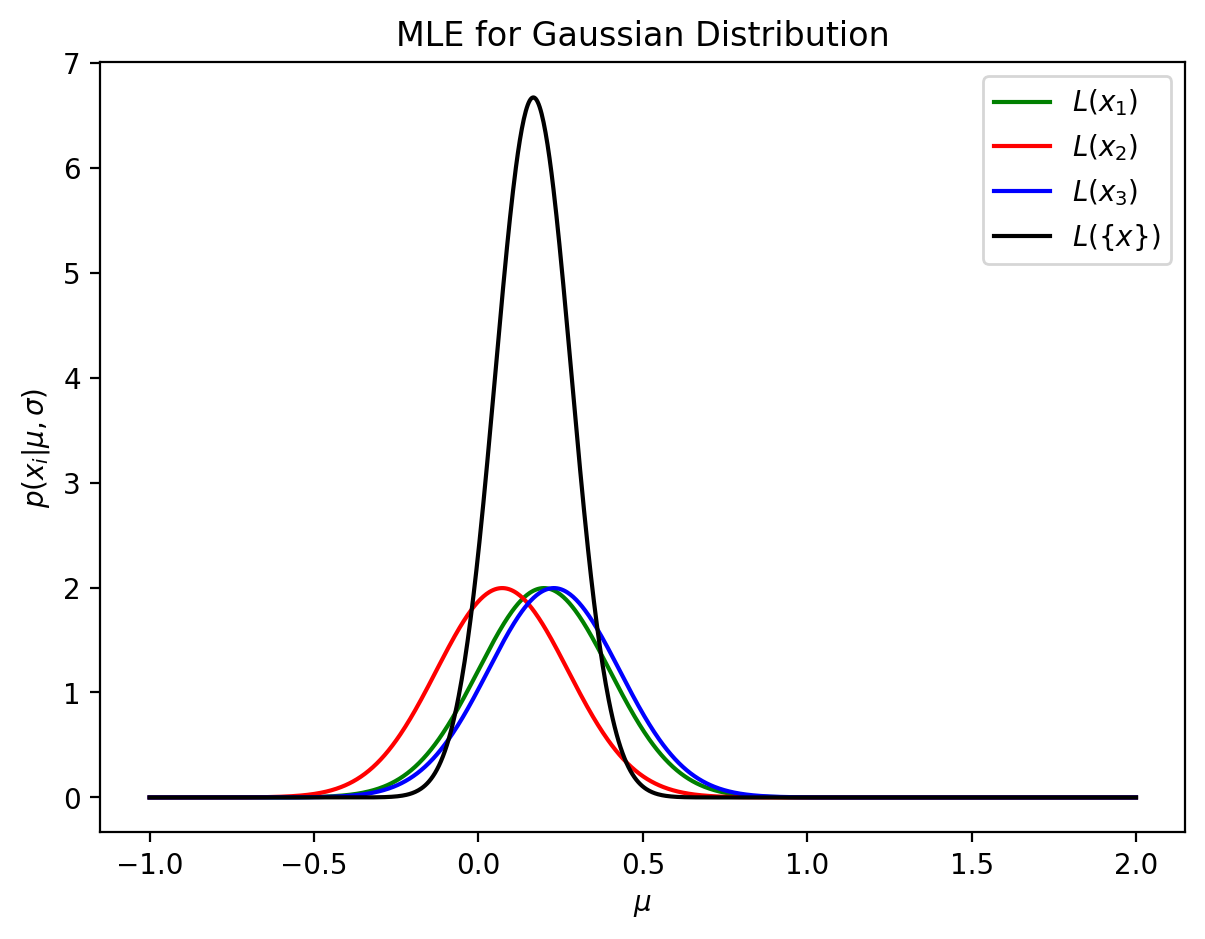

In [3]:
muGrid = np.linspace(-1,2,1000)

L1 = norm(sample[0], sigma).pdf(muGrid) 
L2 = norm(sample[1], sigma).pdf(muGrid) 
L3 = norm(sample[2], sigma).pdf(muGrid) 
L = L1 * L2 * L3

# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', 
         label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', 
         label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', 
         label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', 
         label=r'$L(\{x\})$')

#plt.xlim(0.2, 1.8)
#plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

But what if $\mu$ is the mass of a galaxy. Surely that cannot be negative.  That's prior information!

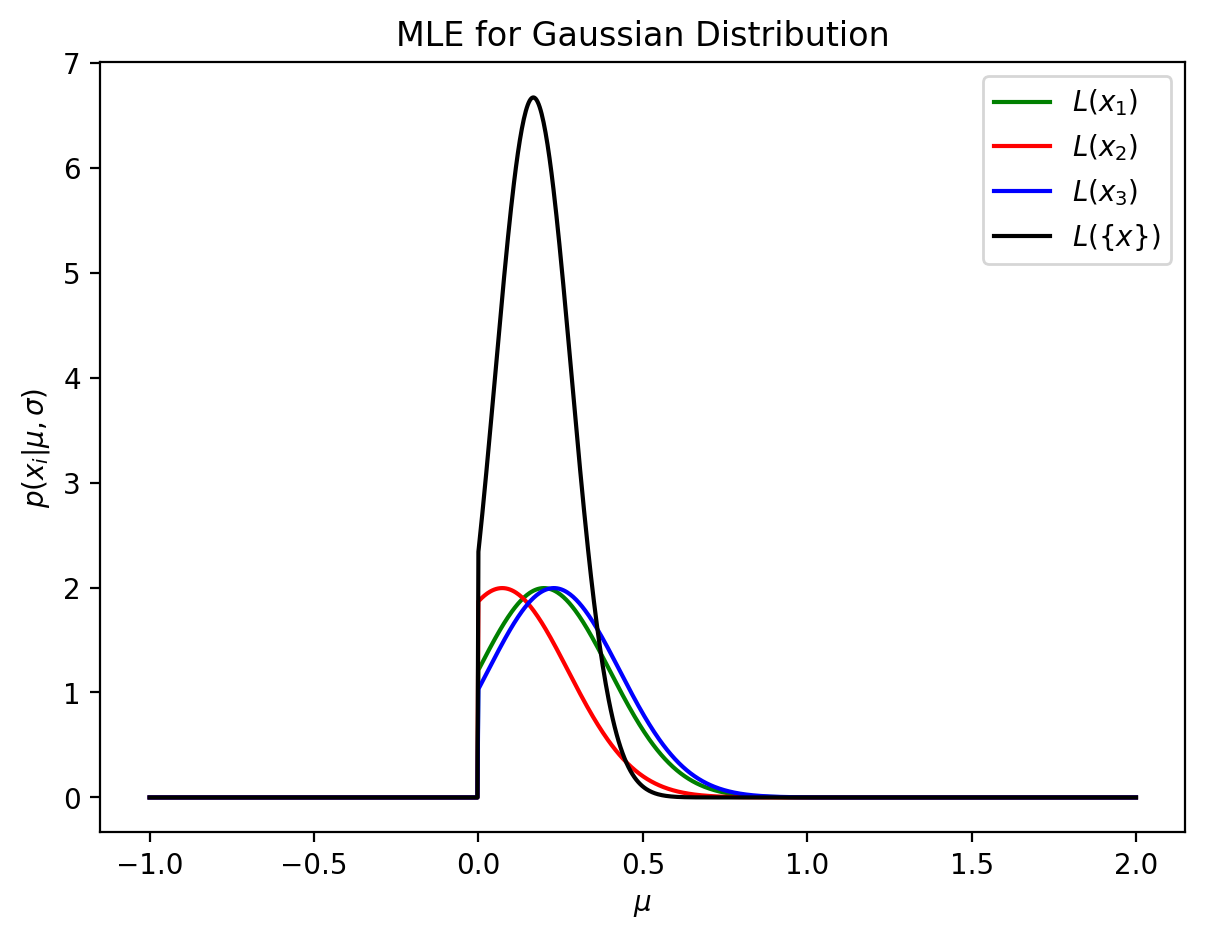

In [4]:
muMin = 0
L1[muGrid < muMin] = 0
L2[muGrid < muMin] = 0
L3[muGrid < muMin] = 0
L = L1 * L2 * L3

# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

#plt.xlim(0.2, 1.8)
#plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

Clearly the *maximum is unchanged in this trivial example*, but the distribution is truncated leading to very different uncertainty estimates than what one would naively get by assuming that all $\mu$ values are equally likely.

### The Essence of the Bayesian Method 

- The basic premise of the Bayesian method is that probability statements are not limited to data,  but can be made for model parameters and models themselves. 
- Inferences are made by producing  probability density functions (pdfs); most notably, **model parameters are treated as random variables**.
- These **pdfs represent our "belief spread" in what the model parameters are**. They have nothing to do with outcomes of repeated experiments (although the shape of resulting distributions can often coincide).


In short:

- In frequentist analysis: **the parameters are fixed** and the data change (at least ideally with putatite repeated measurements). 
- In Bayesian analysis: **the data are fixed** and the parameters change (as random variables). 


### Brief History 

- The **Reverend Thomas Bayes (1702–1761)** was an English amateur mathematician who wrote a manuscript 
on how to combine an initial belief with new data to arrive at an improved belief. 
- The manuscript 
was published posthumously in 1763 and gave rise to the name Bayesian statistics. 
- **Laplace** rediscovered the Bayesian approach a decade after it was originally published, and greatly clarified some principles.  
- Howevever, Bayesian statistics did not find its ways into mainstream science until well into the 20th century, and widespread usage has been hindered until the 1990s with the advent of cheap computing that can map out the Bayesian probability distributions.

![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif?1613667187659)

### Bayesian Statistical Inference

Up to now we have been computing the **likelihood** $p(D\,|\,M)$.  In Bayesian inference, we instead evaluate the **posterior probability** taking into account **prior** information.

Recall that Bayes' Rule is:

$$p(M\,|\,D) = \frac{p(D\,|\,M)\,p(M)}{p(D)},$$

where $D$ is for data and $M$ is for model. Or in words,

$${\rm Posterior \,\, Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

If we explicitly recognize additional assumptions, $I$, and the model parameters, $\theta$, then we can write:

$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

where we will omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate.  However, as the prior can be expanded to 

$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I),$$

it will still appear in the term $p(\theta\,|\,M,I)$.

**NOTE** 

We don't often care about **the evidence $p(D\,|\,I)$** because it does not depend on model parameters. We usually set it to $1$ for parameter estimation. **BUT** it's at the heart of Bayesian model selection (which we'll look at later) since it gives us a way of ranking different model descriptions of the data.  

**The Bayesian Statistical Inference process** is then
1. formulate the likelihood, $p(D\,|\,M,\theta,I)$
2. chose a prior, $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
3. determine the posterior pdf, $p(M,\theta \,|\,D,I)$
4. explore/map the posterior distribution $p(M,\theta \,|\,D,I)$ 
5. extract some summary statistics and quantify the uncertainty of the model parameter estimates
6. perform model selection to find the most apt description of the data

Compare this bullet points with the MLE workflow from a few lectures ago: what's similar? And what's different?

Before applying this expression, we need to discuss how to choose priors.

## Bayesian priors: What Are They & How Do I Choose Them? <a class="anchor" id="two"></a>

Priors can be **informative** or **uninformative**.  As it sounds, informative priors are based on existing information (including previously obtained data, but not the data considered right now) that might be available.  Uniformative priors can be thought of as "default" priors, i.e., what your prior is when you never used
any data, e.g, a "flat" prior like $p(\theta|M,I) \propto {\rm C}$.

In general, we want our inferences to be ***data dominated*** rather than prior dominated, so we try to use ***weakly-informative priors***. There are three
main principles used to choose a prior: 


### (i) The Principle of Indifference

Essentially this means adopting a uniform prior, though you have to be a bit careful.  Saying that an asteroid is equally likely to hit anywhere on the Earth is not the same as saying that all latitudes of impact are equally likely.  

Assuming $1/6$ for a six-side die, or $1/2$ for heads and tails of a fair coin, would be an example of indifference.

### (ii) The Principle of Invariance (or Consistency)

This applies to location and scale invariance.  

**Location invariance** suggests a uniform prior, within the accepted bounds: $p(\theta|I) \propto 1/(\theta_{max}-\theta_{min})$ for $\theta_{min} \le \theta \le \theta_{max}$. 

**Scale invariance** gives us priors that look like $p(\theta|I) \propto 1/\theta$, which implies a uniform
prior for ln($\theta$), i.e. a prior that gives equal weight over many orders of magnitude. 

### (iii) The Principle of Maximum Entropy

We will not discuss it here.
 
It is often true that Bayesian analysis and traditional MLE are essentially equivalent.  
However, in some cases, considering the priors can have significant consequences, as
we will see later. 

We will skip examples of very steep priors and their consequences called in astronomy
literature **Eddington-Malmquist** and **Lutz-Kelker** biases (see Chapter 5 in the textbook
if you are interested as well as [here](https://en.wikipedia.org/wiki/Lutz%E2%80%93Kelker_bias)). 



### Conjugate Priors

In special combinations of priors and likelihood functions, the resulting posterior probability distribution is from the same function family as the prior. These priors are called **conjugate priors** and give a convenient way for generalizing computations. There are exhaustive tables [here](https://www.wikiwand.com/en/Conjugate_prior#/Table_of_conjugate_distributions). 

**EXAMPLE**

If the likelihood is Gaussian and the prior function is Gaussian, then so too is the posterior distribution! So the conjugate prior for a Gaussian likelihood is a Gaussian.

For data drawn from a Gaussian likelihood equal to $\mathcal{N}(\bar{x},s)$ (where $\bar{x}$ is the sample mean and $s$ is the sample standard deviation), with a prior on the underlying parameters $\mathcal{N}(\mu_p,\sigma_p)$, the posterior is $\mathcal{N}(\mu^0,\sigma^0)$, where

$$\mu^0 = \frac{\mu_p/\sigma_p^2 + \bar{x}/s^2}{1/\sigma_p^2 + 1/s^2},\quad \sigma^0 = \left( 1/\sigma_p^2 + 1/s^2 \right)^{-1/2} $$


### Hierarchical Bayes

You may hear of ***hierarchical Bayesian modeling*** a great deal these days. It's become sort of a buzz-term for people wanting to sound fancy, and I am not immune to this! ([Taylor and Gerosa 2018](https://arxiv.org/abs/1806.08365), [Moore and Gerosa 2021](https://arxiv.org/abs/2108.02462)).

But there's nothing terribly fancy about it. Essentially, we will look at employing prior distributions today that have fixed shapes (e.g. Gaussian distributions centered around fixed values with fixed widths). 

But in hierarchical Bayesian modeling, the parameters of the prior distribution (called ***hyperparameters***) become part of the search! The data informs not only properties of individual events but also the shape of the prior. Those prior parameters then get their own priors, called ***hyperpriors***. 

**The whole analysis is then hierarchical, corresponding to multiple layers of inference.** 

For example, we have lots of [exoplanet discoveries](https://exoplanets.nasa.gov/discovery/discoveries-dashboard/). 
- Each of those discoveries started with some lightcurve data, where we fit a likelihood model to that data to deduce parameters of the system. 
- The prior on those parameters was likely weakly informative. 
- ***BUT*** the prior is really describing the underlying distribution of orbital periods, eccentricies, etc. So we can use our data not only to inform the properties of each system, but to map out the demographic distribution of exoplanet periods and more! This paper is really cool: [arxiv:1406.3020](https://arxiv.org/abs/1406.3020).

The same happens in gravitational-wave astronomy (see e.g. [arxiv:2111.03634](https://arxiv.org/abs/2111.03634)). 
- We detect merging black holes and we first use the data to infer the properties of individual objects (these are parameters like the masses of the black holes, their spins, the orbital eccentricity, etc). 
- In order to do this, one needs to set a prior.
- But now that we have detected many black holes, we also want to inform how the entire population of systems looks like. 
- The hyperprior is not uninformative, but depends on our model for stellar evolution (how stars evolved in to black holes, details of the supernova expansion, the galactic host, etc etc). 
- In practice, we introduce some hyperparameters that are then also inferred from the data.

[This is an awesome example](http://varianceexplained.org/r/empirical_bayes_baseball/) using baseball statistics (really fun to read!), explaining a practical approximation to hierarchical Bayesian statistics called "Empirical Bayes"


For more hierarchical Bayesian modeling, we wrote a long review article with a careful derivation of the method and application to gravitational-wave physics (but careful, heavy stats in there!)

*Inferring the properties of a population of compact binaries in presence of selection effects*.
S. Vitale, D. Gerosa, W. Farr, S. Taylor [arxiv:2007.05579](https://arxiv.org/abs/2007.05579)

Anyway, let's move on...

## Bayesian credible regions <a class="anchor" id="three"></a>

In the **frequentist paradigm**, the meaning of the *confidence interval* $\mu_0 \pm \sigma_{\mu}$ is 
the interval that would contain the true $\mu$ (from which the data were drawn) in $68\%$ (or X\%) cases
of a large number of *imaginary repeated experiments* (each with a different N values of $\{x_i\}$). 

However, the meaning of the so-called ***Bayesian credible region*** is *fundamentally different*: it is the interval that contains the true $\mu$ with a probability of $68%\$ (or $X\%$), given the given dataset (our dear one and only dataset - there are no imaginary experiments in Bayesian paradigm). This credible region is the 
relevant quantity in the context of scientific measurements. 

There are several important features of a Bayesian posterior distribution:
- They represent how well we believe a parameter is constrained within a certain range
- We often quote the posterior maximum (**Maximum A Posteriori (MAP)**).
- We also often quote the posterior expectation value (i.e. mean) $\bar{\theta} = \int \theta\, p(\theta|D)d\theta$, or its median.
- ***The credible regions are not unique***. We can compute them in two different ways (visualized below)
    1. We can integrate downwards from the MAP to enclose $X\%$ ("highest probability density interval"), or
    2. We can integrate inwards from each tail by $X/2\%$ ("equal-tailed interval")


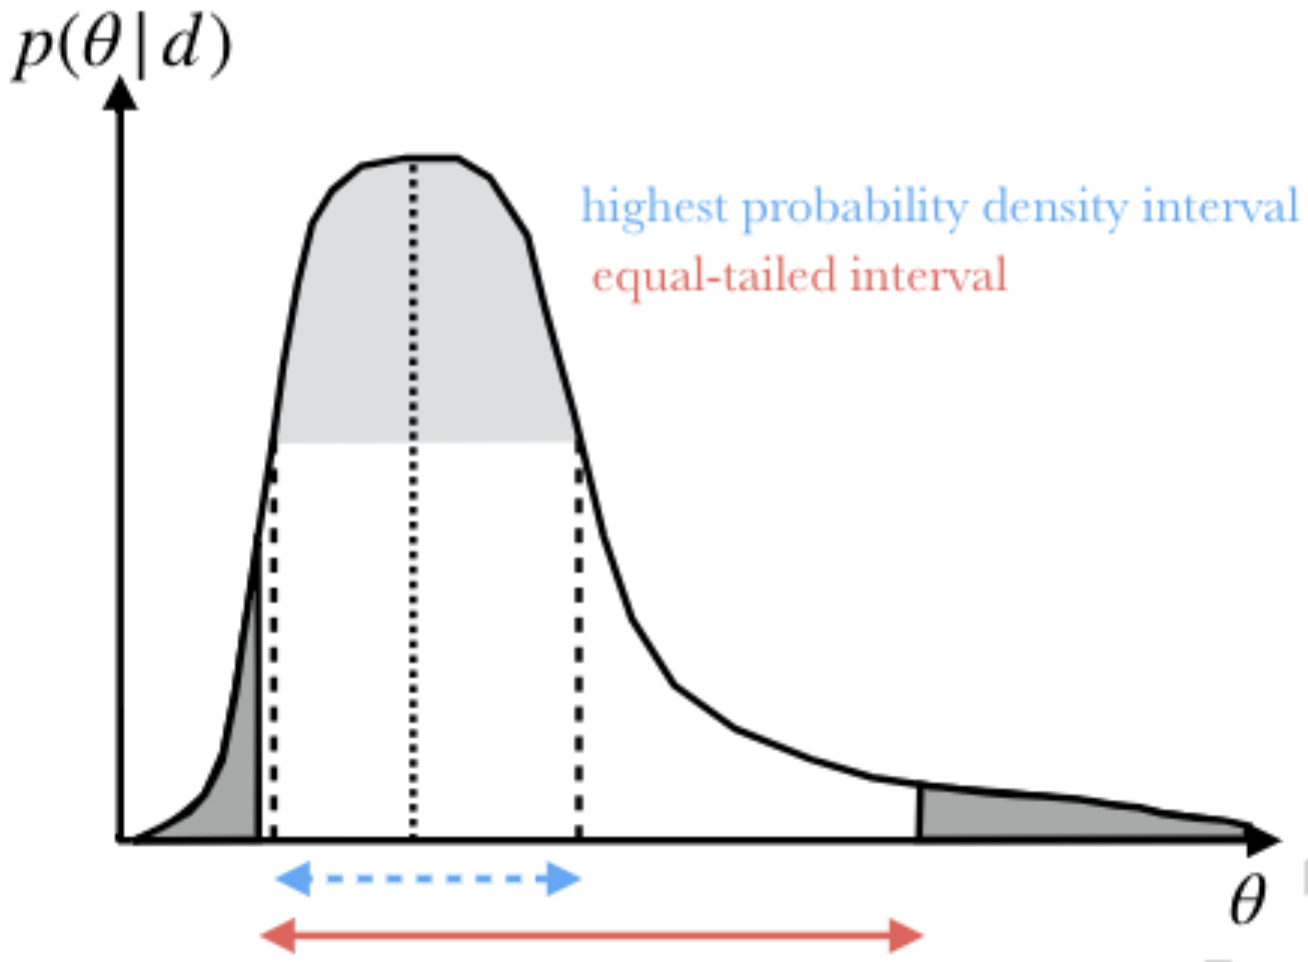

## Simple parameter estimation examples <a class="anchor" id="four"></a>

### A simple coin flip 

Imagine you met a gambler who wanted you to **bet on whether the coin would come up heads or tails**. You watch the gambler work as a number of other people guess (as the coin is flipped). 


Remember the probability of getting $h$ heads in $n$ coin flips is given by the binomial probability distribution
>$P(h|\theta) = \theta^h (1-\theta)^{(n-h)}$

with $\theta$ the probability of a head.

We want to calculate and plot the Bayesian posterior of the probabilty of drawing a head as a function of watching [5, 50, 500] coin flips.

Ok so:

* formulate the likelihood, $p(D\,|\,M,\theta,I)$
* choose a prior
* plot the posterior pdf, $p(M,\theta \,|\,D,I)$

Ideas?




In [3]:
# Here are some data to use
data = np.array([
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [4]:
len(data), np.sum(data==0), np.sum(data==1)

(500, 144, 356)

Is the gambler being honest with us?

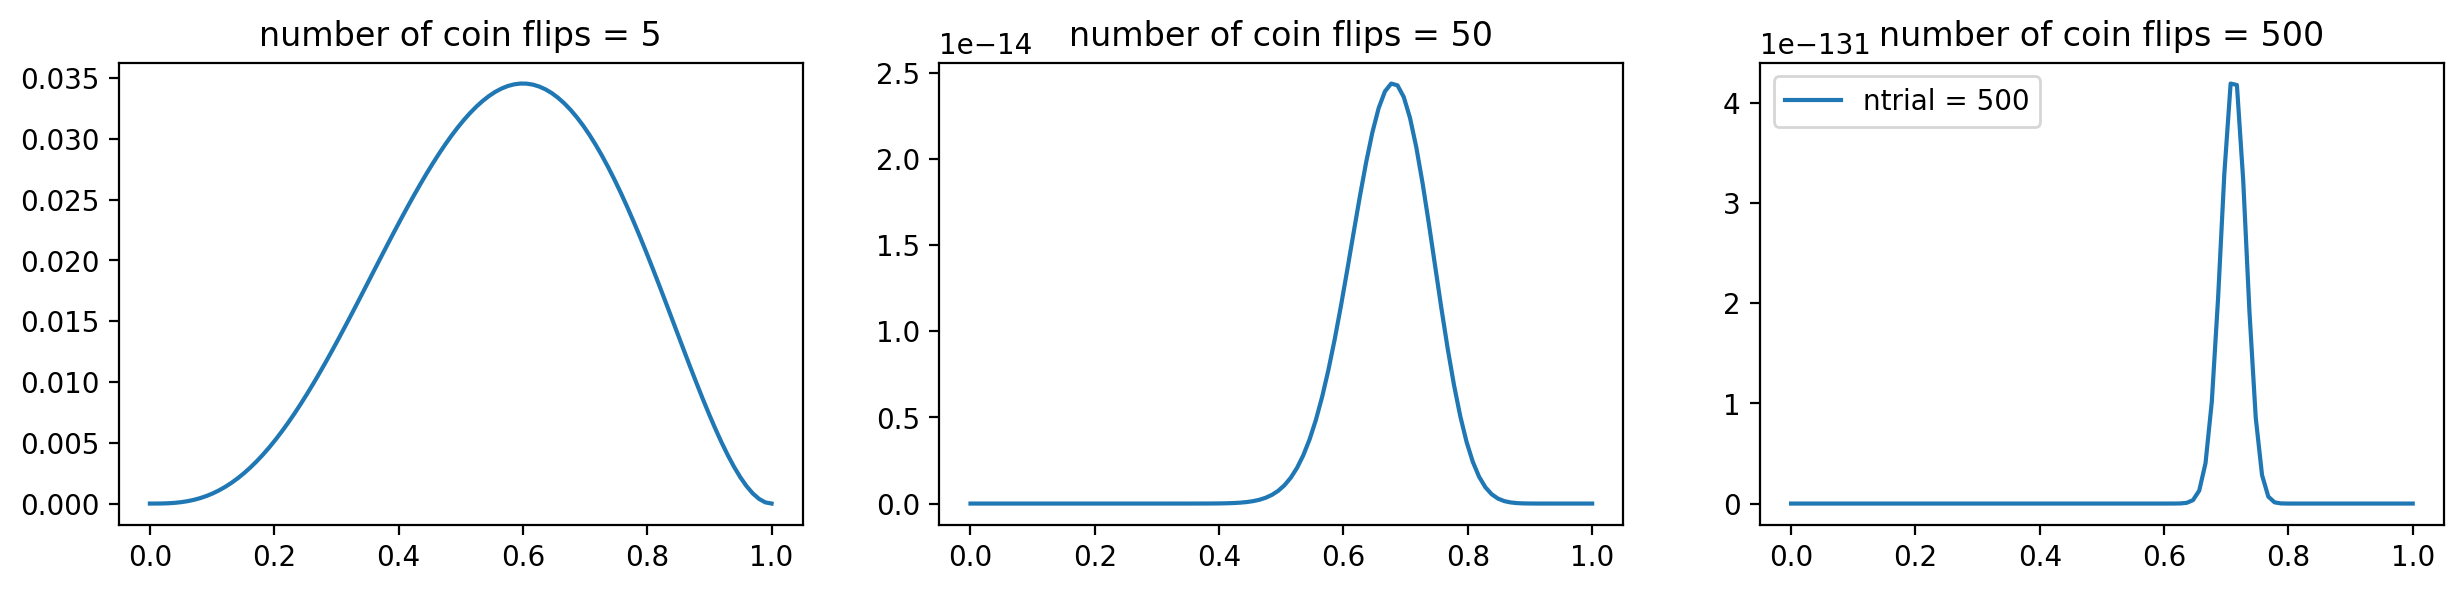

In [8]:
def p_nheads(n, h, theta):
    return (theta**h) * ((1-theta)**(n-h))

# likelihood
def L(data, ntrials, theta):
    nheads = data[:ntrials].sum()
    return p_nheads(ntrials, nheads, theta)

# prior. Just uniform?
def prior(theta):
    return 1

fig, ax = plt.subplots(1,3,figsize=(15,3))

probs = []
# define the number of trials
n_trials = [5, 50, 500]
theta = np.linspace(0, 1, 100)
for i,nt in enumerate(n_trials):
    prob = L(data, nt, theta) * prior(theta)
    # posterior plot
    ax[i].plot(theta, prob, 
            label=r'ntrial = '+str(nt))
    # likelihood plot
    #plt.plot(theta, L(data, nt, theta))
    ax[i].set_title("number of coin flips = "+str(nt))  

plt.show()


Careful that we're not tracking the normalization! But that's ok. We can trivially normalize the curve if we need it (most times we don't...)

Say you know this gambler already. What if I used a $\beta$ function for the prior?

$P(\alpha, \beta, \theta) = \theta^{\alpha-1} (1-\theta)^{(\beta-1)}$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/1200px-Beta_distribution_pdf.svg.png" alt="Beta Distribution" width="400">


Let's use a $\beta$ function prior on $\theta$ with $a=1$ and $b=10$. You can code this directly or grab from `scipy.stats`.

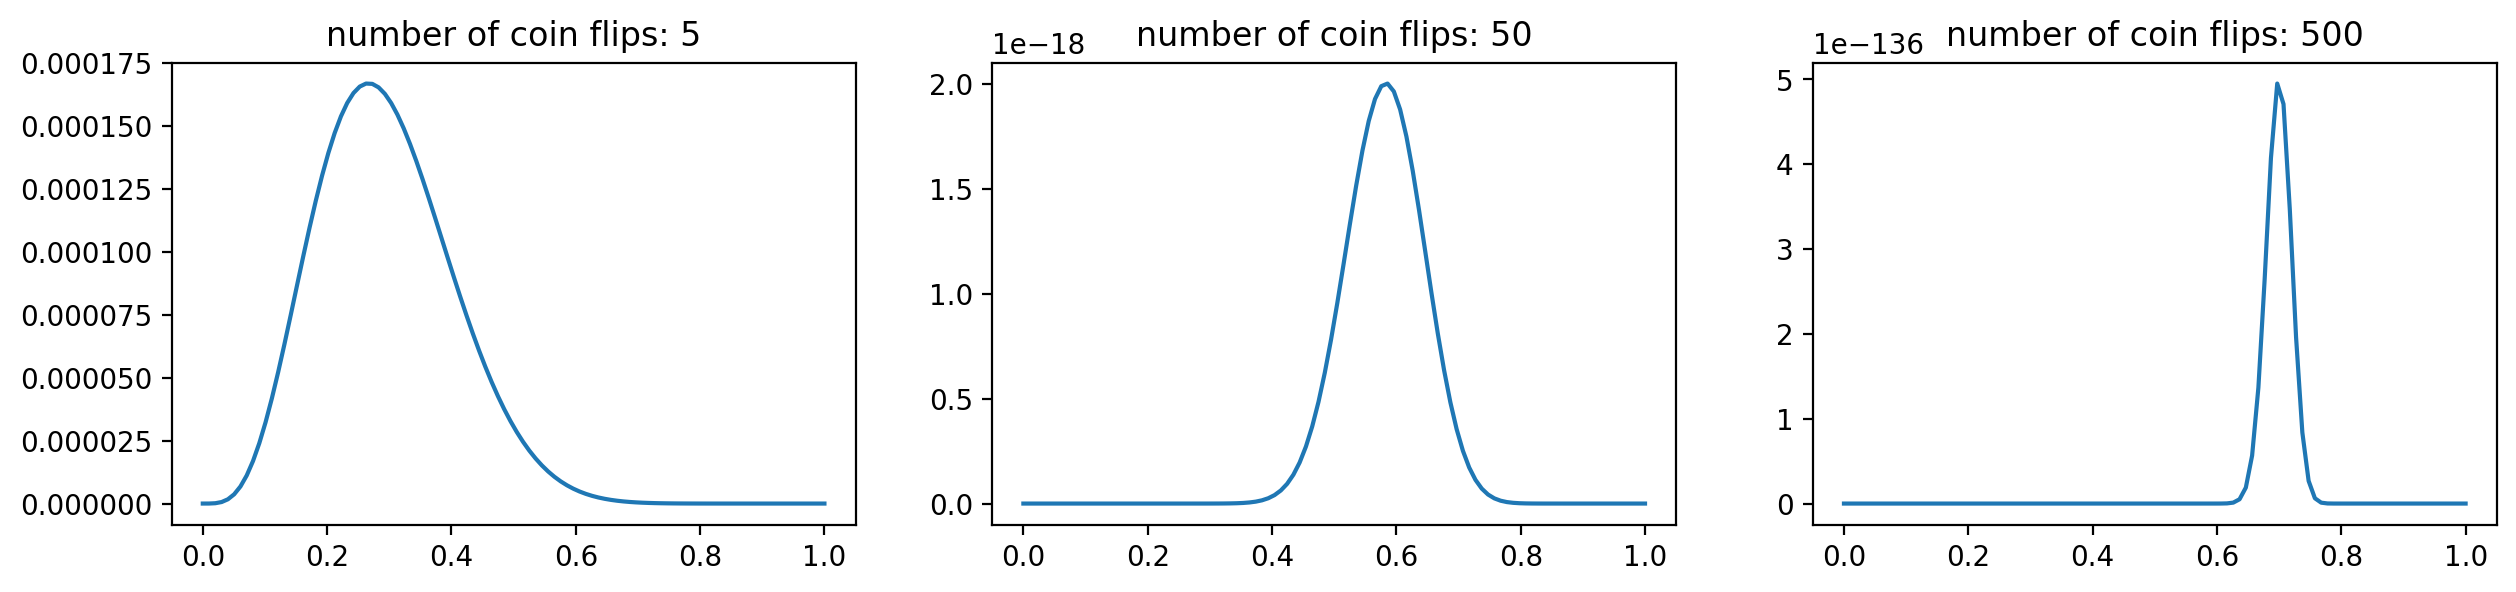

In [10]:
def p_nheads(n, h, theta):
    return (theta**h) * ((1-theta)**(n-h))

# likelihood
def L(data, ntrials, theta):
    nheads = data[:ntrials].sum()
    return p_nheads(ntrials, nheads, theta)

def prior(theta):
    alpha=1
    beta=10
    return  (theta**alpha) * ((1-theta)**(beta-1))

fig, ax = plt.subplots(1,3,figsize=(15,3))

probs = []
# define the number of trials
n_trials = [5, 50, 500]
theta = np.linspace(0, 1, 100)
for i, nt in enumerate(n_trials):
    prob = L(data, nt, theta) * prior(theta)
    # posterior plot
    ax[i].plot(theta, prob, 
            label=r'ntrial = '+str(nt))
    # likelihood plot
    #plt.plot(theta, L(data, nt, theta))
    ax[i].set_title("number of coin flips: "+str(nt))  
    
plt.show()


The first case is different, the last one is not. As the amount of data increases, inference becomes data driven and the chosen prior is less important. Often we don't have this luxury!

### Nuisance parameters and marginalization

#### Heteroscedastic Gaussian as an example


Consider the case of measuring a star when you know your telescope very well.  We want to know the posterior pdf for the brigthness of the star, $p(M,\theta|D,I) \equiv p(\mu|\{x_i\},\{\sigma_i\},I)$ (so I'm not trying to estimate the sigmas from the data, I know them already).

For the likelihood we have (same as before!)

$$L = p(\{x_i\}|\mu,I) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}
{2\sigma_i^2}\right).$$

---

**In the Bayesian case, we also need a prior.**  We'll adopt a *flat uniform distribution* given by

$$p(\mu|I) = C, \; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max},$$

where $C = \frac{1}{\mu_{\rm max} - \mu_{\rm min}}$ between the min and max and is $0$ otherwise.

The log of the posterior pdf is then

$$\ln p = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

This is exactly the same as we saw before, except that the value of the constant is different.  Since the constant doesn't come into play, we get the same result as before. The MAP is:
 
$$\mu^0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty

$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$
 
We get the same result because we used a flat prior. If the case were homoscedastic instead of heteroscedastic, we obviously would get the result from our first example.

---

Now let's consider the case where **$\sigma$ is not known**, but rather it needs to be determined from the data, too. This might be because I cannot trust my assumption on how the sky will behave tonight. 

I want to use the data to measure **both** the star and the properties of the sky. But crucially, I only care about the star.

In this case, the posterior pdf that we seek is not $p(\mu|\{x_i\},\{\sigma_i\},I)$, but rather the joint $2$D pdf $p(\mu,\sigma|\{x_i\},I)$.

As before we have

$$L = p(\{x_i\}|\mu,\sigma,I) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$

except that now $\sigma$ is uknown.

---

Our Bayesian prior is *now 2D instead of 1D* and we'll adopt (invariance, see above)

$$p(\mu,\sigma|I) \propto \frac{1}{\sigma},\; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max} \; {\rm and} \; \sigma_{\rm min} < \sigma < \sigma_{\rm max}.$$

With proper normalization, we have

$$p(\{x_i\}|\mu,\sigma,I)p(\mu,\sigma|I) = C\frac{1}{\sigma^{(N+1)}}\prod_{i=1}^N \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2}  \right),$$

where

$$C = (2\pi)^{-N/2}(\mu_{\rm max}-\mu_{\rm min})^{-1} \left[\ln \left( \frac{\sigma_{\rm max}}{\sigma_{\rm min}}\right) \right]^{-1}.$$

The log of the posterior pdf is

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Since we are assuming a Gaussian distribution, the mean, $\overline{x}$, and the variance, $V (=s^2)$, completely characterize the distribution. So we can write this expression in terms of those variables instead of $x_i$.  Skipping over the math details we find

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$

Note that this expression only contains the 2 parameters that we are trying to determine: $(\mu,\sigma)$ and 3 values that we can determine directly from the data: $(N,\overline{x},V)$. A side note: these three data-based values fully encapsulate our dataset and are called *sufficient statistics*.

This code visualizes the posterior pdf for the case of $(N,\overline{x},V)=(10,1,4)$. Play around with it  changing the values of $(N,\overline{x},V)$.</font> 

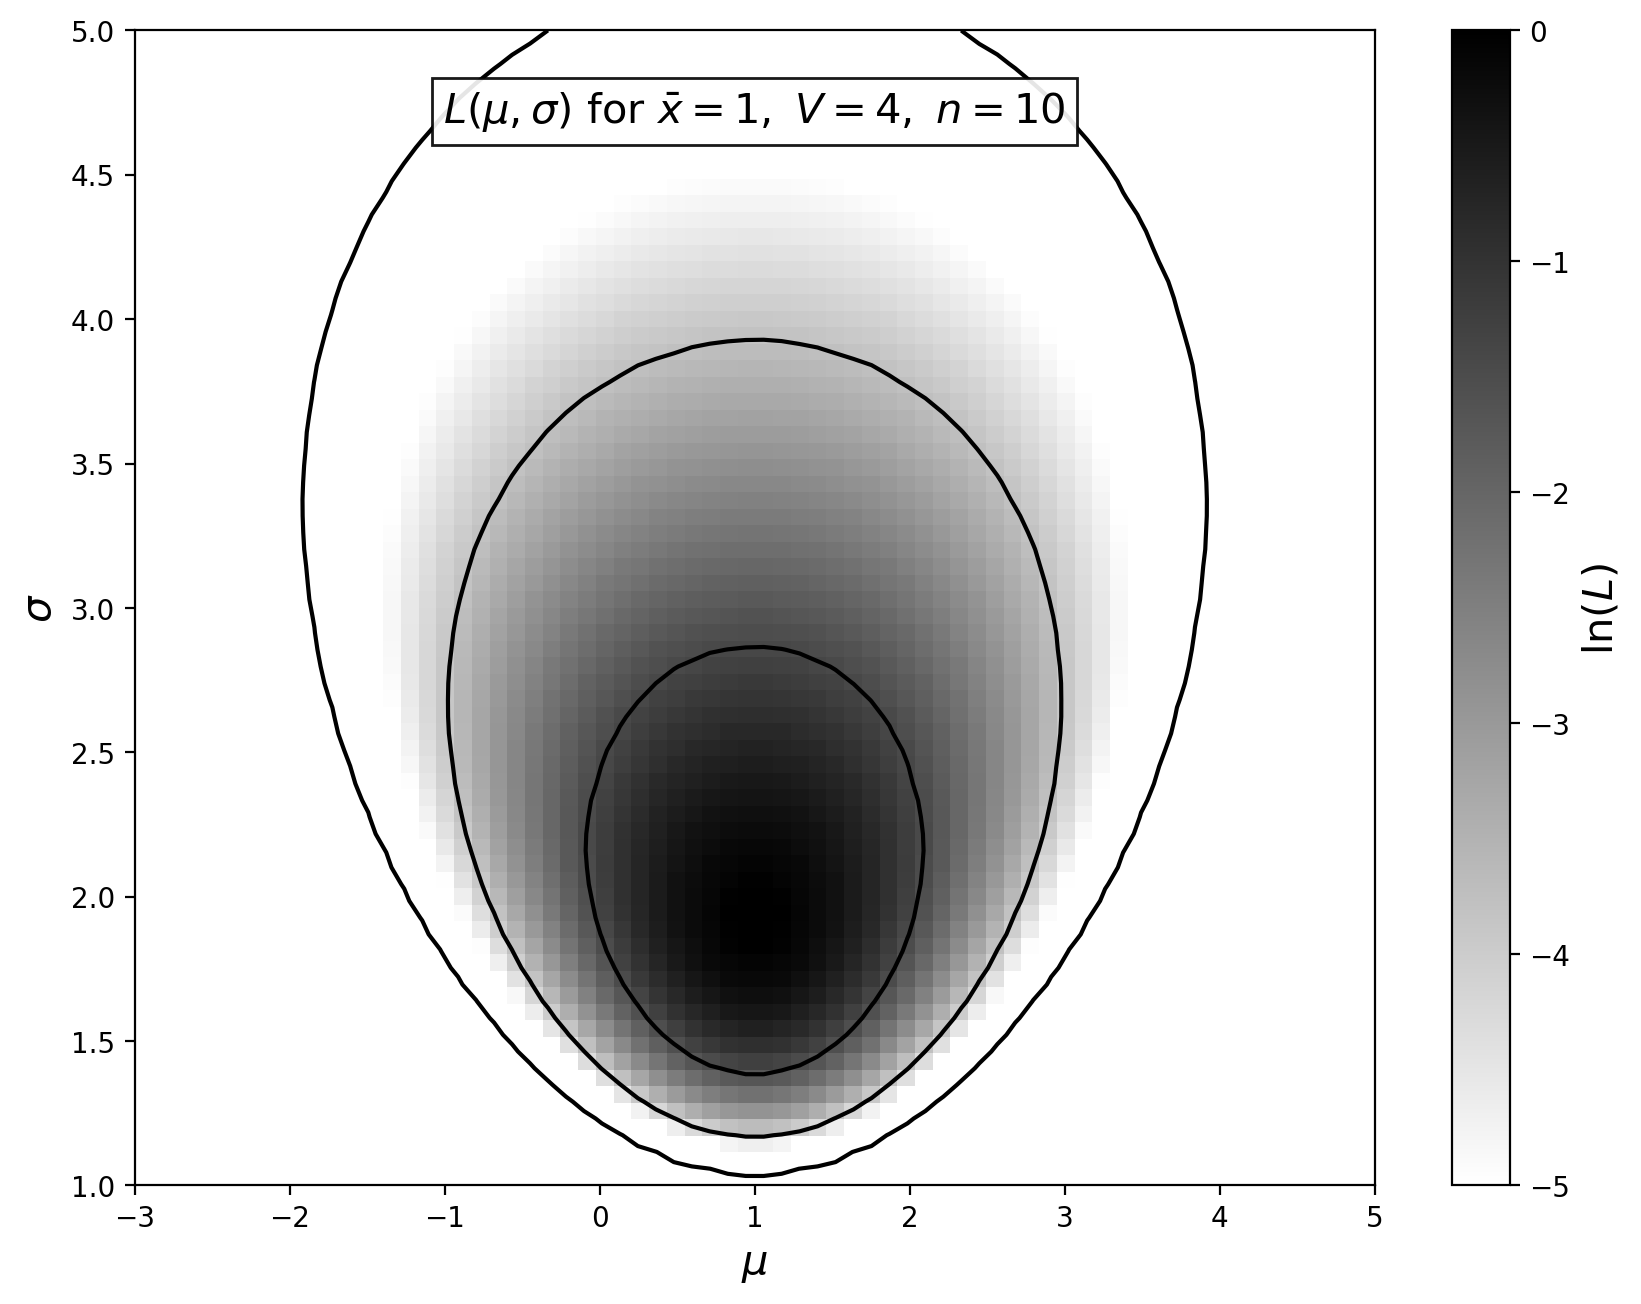

In [18]:
# %load code/fig_likelihood_gaussian.py
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""

from astroML.plotting.mcmc import convert_to_stdev

def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$', fontsize=15)
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', 
         fontsize=15, transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$', fontsize=15)
plt.ylabel(r'$\sigma$', fontsize=15)

plt.show()

The plot from the previous cell is described by 

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$


**What if we don't care that much about $\sigma$?** e.g. it may simply represent how good our measuring apparatus is - what we might get a Nobel prize for is $\mu$ (the brightest star in the Universe!).
- Therefore, what we want is $p(\mu|\{x_i\},I)$, rather than $p(\mu,\sigma|\{x_i\},I)$. 
- We can get the former from the latter by the **marginalization over $\sigma$**, which means integration of $p(\mu,\sigma|\{x_i\},I)$ over $\sigma$: 

$$ p(\mu\,|\,\{x_i\},I) = \int_0^\infty p(\mu,\sigma|\{x_i\},I) d\sigma$$
and thus (using the substitution $t$ = 1/$\sigma$ and integration by parts)

$$ p(\mu\,|\,\{x_i\},I) \propto \left(1 + \frac{(\overline{x}-\mu)^2}{V} \right)^{-N/2}. $$

It is easy to show that this result corresponds to *Student’s $t$ distribution* (this is a nice proof, Google it!) with 
$k = N-1$ degrees of freedom for the variable $t = (x-\mu)/(s/\sqrt{N})$, where $s$ is the sample 
standard deviation. As we've seen the Student’s $t$ distribution is symmetric and bell shaped, but with heavier 
tails than  a Gaussian distribution.  

**Hold on!** This is not a Gaussian distribution promised by the Central Limit Theorem!!! 

That's fine! The CLT promised a Gaussian only for large $N$. Indeed, the above expression
(Student's $t$ distribution) morphs into a Gaussian for large $N$ - let's check!


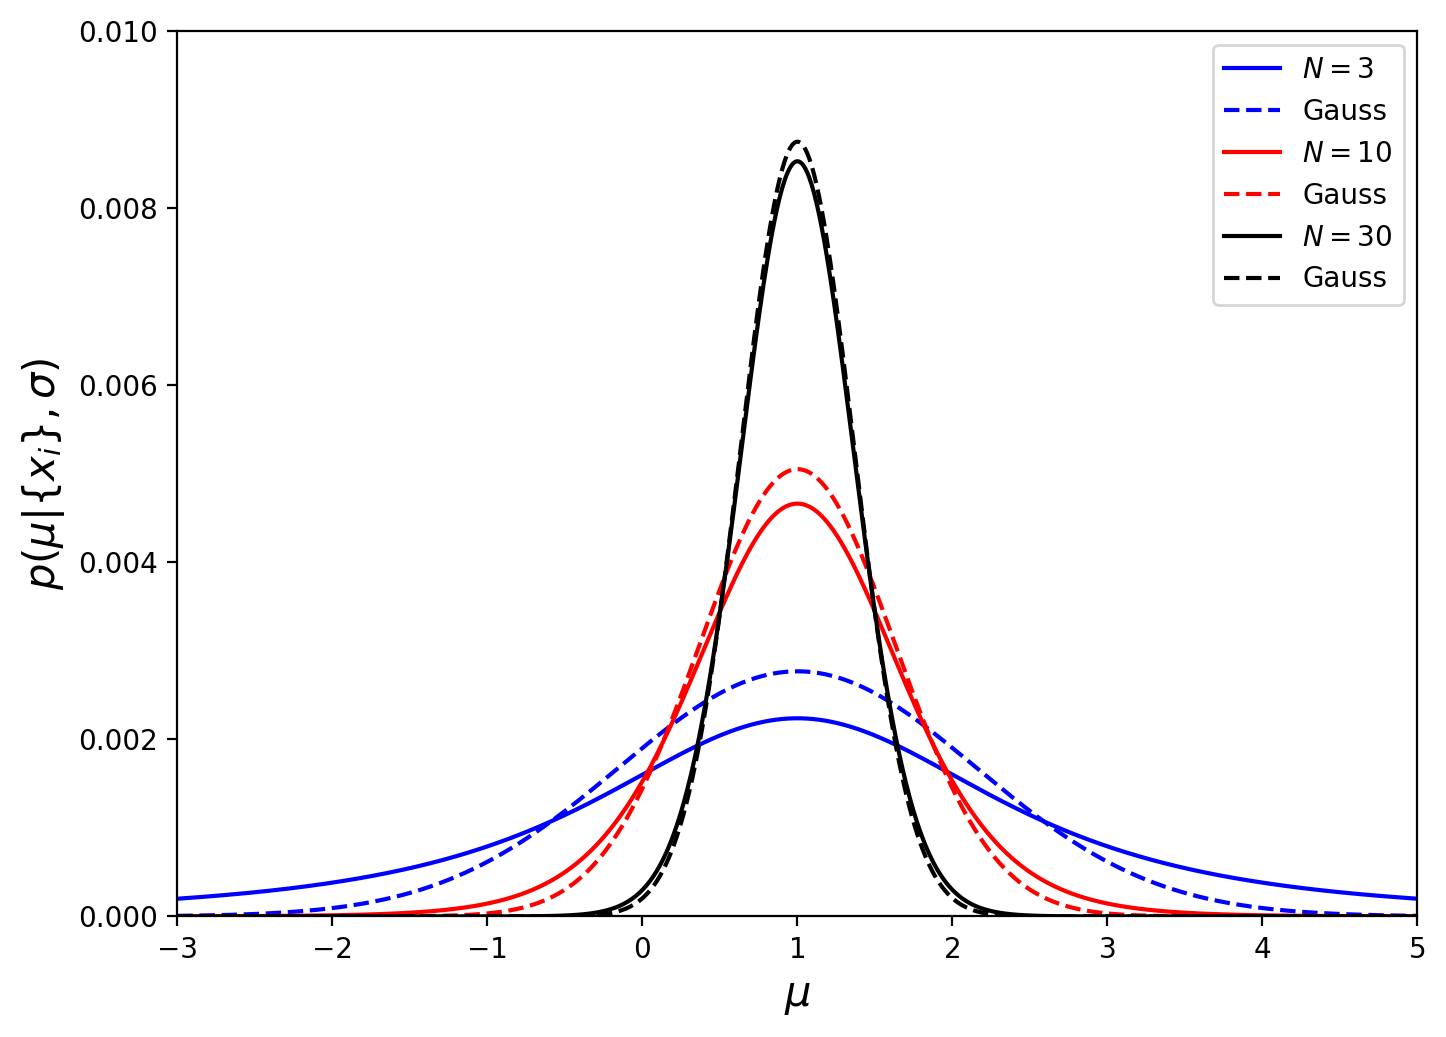

In [11]:
### let's see how Student's t distribution morphs into Gaussian distribution
# let's first choose mean x and variance as in the previous example
mu = np.linspace(-3, 5, 1000)
xbar = 1.0
V = 4.0

# and now let's generate p(mu) for N=3, 10 and 20
def compute_pmu(mu, xbar, V, N):
    p = (1 + (xbar - mu) ** 2 / V) ** (-0.5 * N)
    return p / np.sum(p)
#
N1 = 3
pmu1 = compute_pmu(mu,xbar,V,N1)
G1 = norm(xbar, np.sqrt(V/N1)).pdf(mu) 
G1norm = G1 / np.sum(G1)

N2 = 10
pmu2 = compute_pmu(mu,xbar,V,N2)
G2 = norm(xbar, np.sqrt(V/N2)).pdf(mu) 
G2norm = G2 / np.sum(G2)

N3 = 30
pmu3 = compute_pmu(mu,xbar,V,N3)
G3 = norm(xbar, np.sqrt(V/N3)).pdf(mu) 
G3norm = G3 / np.sum(G3)
 
## plot
fig, ax = plt.subplots(figsize=(8, 5.75))
plt.plot(mu, pmu1, ls='-', c='blue', label=r'$N=3$')
plt.plot(mu, G1norm, ls='--', c='blue', label=r'Gauss')
plt.plot(mu, pmu2, ls='-', c='red', label=r'$N=10$')
plt.plot(mu, G2norm, ls='--', c='red', label=r'Gauss')
plt.plot(mu, pmu3, ls='-', c='black', label=r'$N=30$')
plt.plot(mu, G3norm, ls='--', c='black', label=r'Gauss')

plt.xlim(-3, 5)
plt.ylim(0, 0.01)
plt.xlabel('$\mu$', fontsize=15)
plt.ylabel(r'$p(\mu | \{x_i\},\sigma)$', fontsize=15)
plt.legend()
plt.show() 

- The main result here is that **for smallish N ($<$10 or so), $p(\mu)$ is not Gaussian!**. (So using Gaussians all the time is not fine! Even for a simple case like this! Remember you can consistently do least squares fits only for Gaussian data? Welcome to the real world) 
- The code above can be used to compute $p(\mu)$ for arbitrary values of N, $\overline{x}$ and V.
- For large N, Gaussian is a good approximation of $p(\mu)$. 

The top panels of the figure below (textbook figure 5.5, for the code see the 
[astroML website](http://www.astroml.org/book_figures/chapter5/fig_posterior_gaussian.html)) show marginal distributions $p(\mu)$ and $p(\sigma)$ for $(N,\overline{x},V)=(10,1,4)$.

- Blue solid line is the analytic Bayesian result with uninformative prior, i.e. $p(\sigma)\propto 1/\sigma$
- Red dotted line is the result for a uniform prior (note that there is not that much difference).
- Red dashed line is the analytic MLE result, which is quite different!
- Circles indicate the distributions of bootstrap estimates.

The bottom panels show the cumulative distributions.

![Ivezic, Figure 5.5](http://www.astroml.org/_images/fig_posterior_gaussian_1.png)
 

## Simple parameter estimation examples <a class="anchor" id="one"></a>

### Underlying Gaussian distribution with heteroscedastic Gaussian uncertainties <a class="anchor" id="onea"></a>

The final example we saw in the previous lecture dealt with Bayesian parameter estimation of a Gaussian distribution, for $\mu$ and $\sigma$. **But what if the values we measure $\{x_i\}$ also have a measurement uncertainty?** Crucially, we're dealing with two levels of spread then:

- the underlying distribution spread, $\sigma$, and 
- the measurement uncertainties of the data, $\{e_i\}$

The measurement uncertainties further blur the underlying distribution. In fact, if the uncertainties are homoscedastic, the distribution of $\{x_i\}$ will be Gaussian, ***BUT*** **if the uncertainties are heteroscedastic the distribution of $\{x_i\}$ will be non-Gaussian!**

- The figure below shows a distribution of $10^6$ points drawn from $\mathcal{N}(0,1)$ and sampled with heteroscedastic Gaussian errors with widths, $e_i$, uniformly distributed between $0$ and $3$. 
- A linear superposition of these Gaussian distributions with widths equal to $\sqrt{1 + e_i^2}$ results in a non-Gaussian distribution. 
- The best-fit Gaussians centered on the sample median with widths equal to sample standard deviation and quartile-based $\sigma_G$ are shown for comparison.

![](https://www.astroml.org/_images/fig_distribution_gaussgauss_1.png)

We're trying to find the $\mu$ and $\sigma$ parameters of the underlying distribution. With uniform priors on each, the log-posterior pdf can be written as

$$ \ln p = \mathrm{constant} - \frac{1}{2}\sum_{i=1}^N \left( \ln(\sigma^2+e_i^2) + \frac{(x_i-\mu)^2}{(\sigma^2+e_i^2)} \right), $$

which looks identical to the log-likelihood $\ln L$ up to a constant due to the uniform priors. We can actually analytically maximize this to find the MAP (maximum a posteriori) value of $\mu_0$,

$$ \mu_0 = \frac{\sum_{i=1}^N x_i / (\sigma_0^2 + e_i^2)}{\sum_{i=1}^N 1 / (\sigma_0^2 + e_i^2)} $$

but a closed-form analytic solution for $\sigma_0$ does not exist. 

So we resort to numerical methods and just plot $\ln p$ on a grid. (Pause here for a sec and think about this: we *numerically* explore a *grid* of values)

The following to produces the log-posterior pdf of parameters $\mu$ and $\sigma$ of an underlying Gaussian distribution. The dataset has $N=10$ values, drawn from $\mu=1$, $\sigma=1$, each measured with an uncertainty drawn from a uniform distribution $0<e_i<3$.

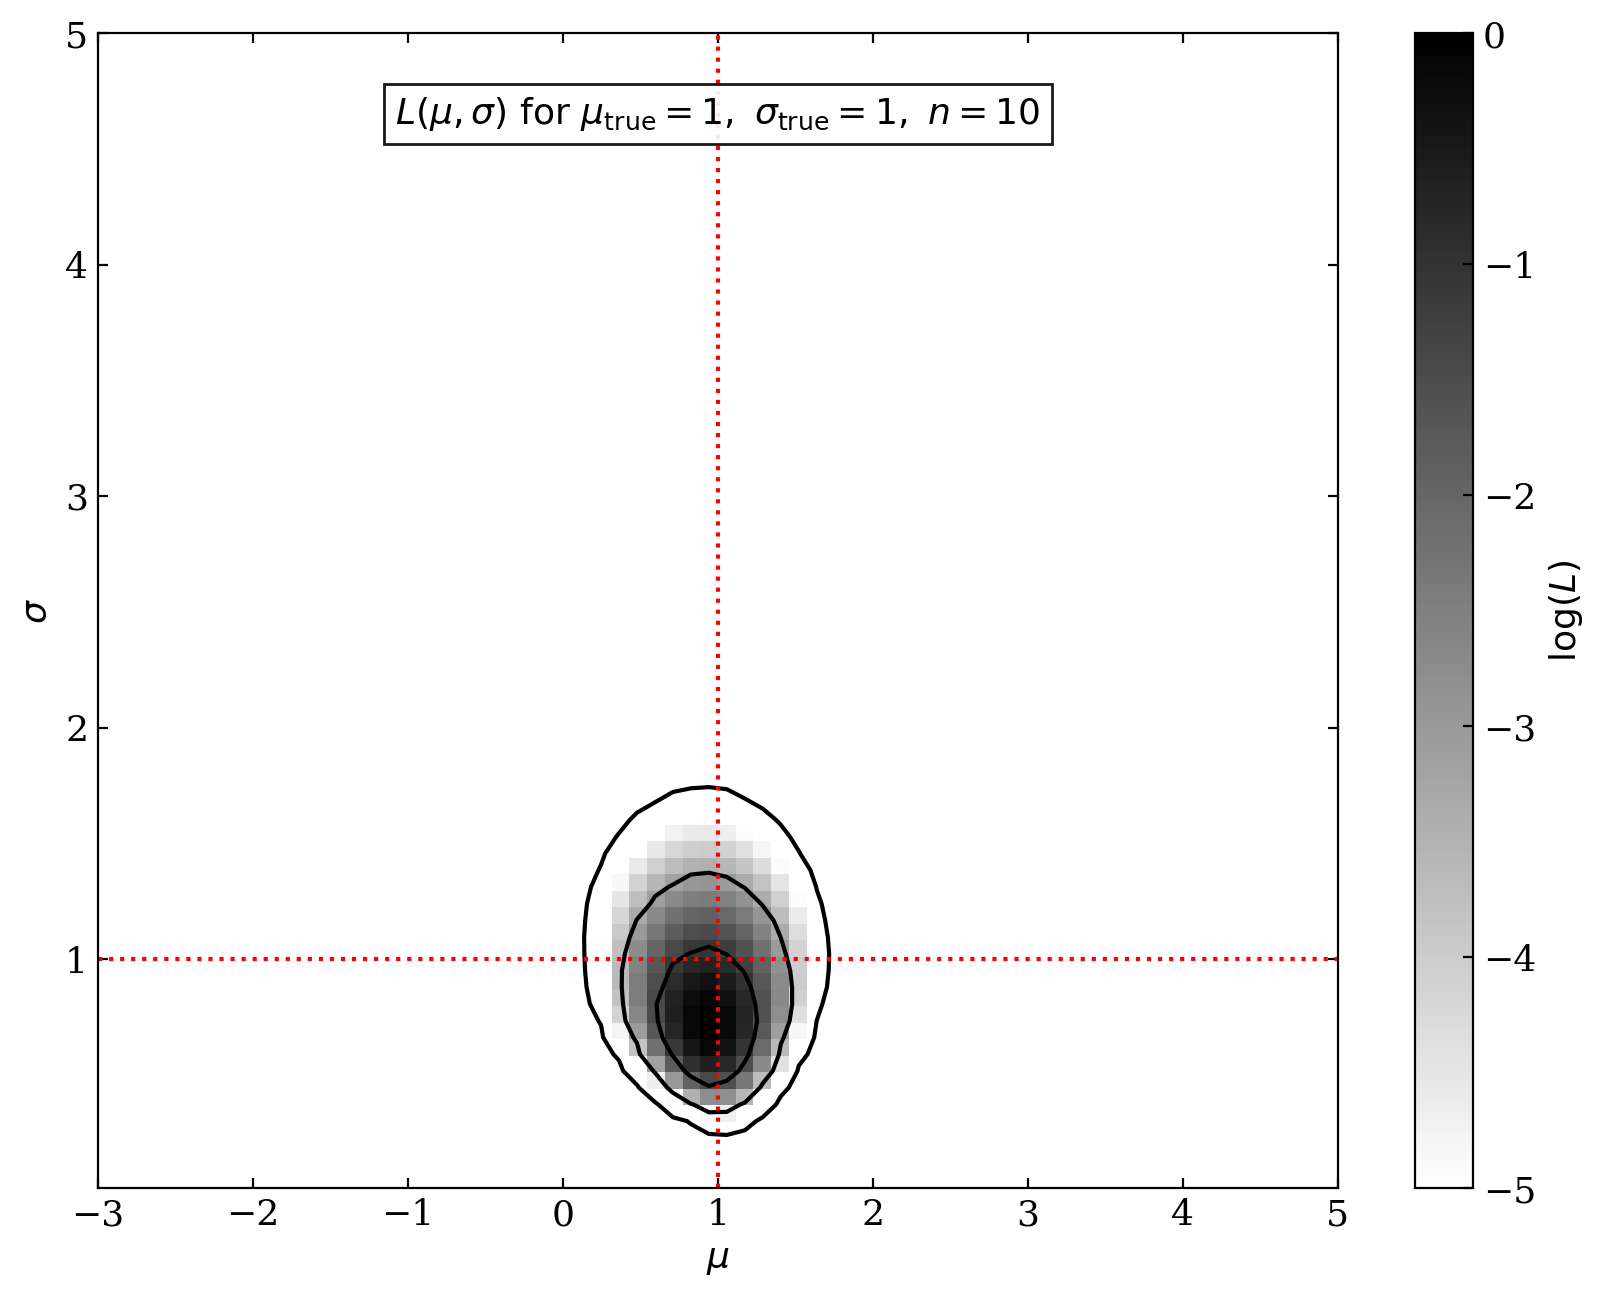

In [27]:
"""
Gaussian Distribution with Gaussian Errors
------------------------------------------
Figure 5.7

The logarithm of the posterior probability density function for :math:`\mu`
and :math:`\sigma`, :math:`L_p(\mu,\sigma)`, for a Gaussian distribution with
heteroscedastic Gaussian measurement errors (sampled uniformly from the 0-3
interval), given by eq. 5.64. The input values are :math:`\mu = 1` and
:math:`\sigma = 1`, and a randomly generated sample has 10 points. Note that
the posterior pdf is not symmetric with respect to the :math:`\mu = 1` line,
and that the outermost contour, which encloses the region that contains 0.997
of the cumulative (integrated) posterior probability, allows solutions with
:math:`\sigma = 0`.
"""

from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=13, usetex=False)

np.random.seed(48)
#np.random.seed(4211)

def gaussgauss_logL(xi, ei, mu, sigma):
    """Equation 5.63: gaussian likelihood with gaussian errors"""
    ndim = len(np.broadcast(sigma, mu).shape)

    xi = xi.reshape(xi.shape + tuple(ndim * [1]))
    ei = ei.reshape(ei.shape + tuple(ndim * [1]))

    s2_e2 = sigma ** 2 + ei ** 2
    return -0.5 * np.sum(np.log(s2_e2) + (xi - mu) ** 2 / s2_e2, 0)

#------------------------------------------------------------
# Define the grid and compute logL
#np.random.seed(5)
mu_true = 1.
sigma_true = 1.
N = 100
ei = 10 * np.random.random(N)
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))

sigma = np.linspace(0.01, 5, 70)
mu = np.linspace(-3, 5, 70)

logL = gaussgauss_logL(xi, ei, mu, sigma[:, np.newaxis])
logL -= logL.max()

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.text(0.5, 0.93,
         (r'$L(\mu,\sigma)\ \mathrm{for}\ \mu_{\rm true}=1,\ '
          r'\sigma_{\rm true}=1,\ n=10$'),
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.axhline(mu_true,c='red',ls='dotted')
plt.axvline(sigma_true,c='red',ls='dotted')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()


**Key takeaways**
- By eye,  $\mu=1$, $\sigma=1$ are not too far from the MAP parameter values. This is ok, but...
- The posterior pdf is not symmetric around $\mu=1$.
- In fact it is consistent within the $99.7\%$ credible region of having $\sigma=0$!. 
- The marginal distributions of each parameter would not look Gaussian either.


Now try changing the random seed, explain what's going one... Also try changing the number of datapoints as well as the maximum value of $e_i$.

---

### Gaussian distribution embedded in a uniform background distribution <a class="anchor" id="oneb"></a>

What if we wanted to **model the mixture of a Gauassian distribution with a uniform distribution**. Goign outside of astronomy for a second, this is the typical scenario for particle physicists looking for new particles. The following is from the [Atlas bulletin](https://atlas.cern/updates/feature/higgs-boson) of July 4th, 2018, showing the Higgs boson peak embdded in background noise and other particles.

![Atlas Higgs Boson Example](https://cds.cern.ch/record/2627611/files/Higgsto4l.png?subformat=icon-640)

Obviously this isn't *exactly* a Gaussian and a uniform distribution, but a line feature superimposed upon a background is the sort of thing that a physicist or astronomer might see and is pretty close to this case for a local region around the feature of interest. 

Q: Any more examples of similar problems in your research areas?

Let's assume that 
- the location parameter, $\mu$, is known (say from theory) and
- the uncertainties in $x_i$ are negligible compared to $\sigma$.

The likelihood of obtaining a single measurement, $x_i$, can be written as a probabilistic mixture of *either* the Gaussian *or* the uniform distribution. Hence, we use the **OR Rule** of probability:

$$p(x_i|A,\mu,\sigma,I) = \frac{A}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right) + \frac{1-A}{W}.$$

- Here the background probability is taken to be $0 < x < W$ and 0 otherwise.  
- The feature of interest lies between $0$ and $W$.  
- $A$ and $1-A$ are the relative strengths of the two components, which are obviously anti-correlated.  
- Note that there will be covariance between $A$ and $\sigma$. 

If we adopt a uniform prior in both $A$ and $\sigma$:

$$p(A,\sigma|I) = C, \; {\rm for} \; 0\le A<A_{\rm max} \; {\rm and} \; 0 \le \sigma \le \sigma_{\rm max},$$

then the posterior pdf is given by

$$\ln [p(A,\sigma|\{x_i\},\mu,W)] \propto \sum_{i=1}^N \ln \left[\frac{A}{\sigma \sqrt{2\pi}} \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2} \right)  + \frac{1-A}{W} \right].$$

The example below is for $200$ data points with $A=0.5, \sigma=1, \mu=5, W=10$. Specifically, the bottom panel is a result drawn from this distribution and the top panel is the likelihood distribution derived from the data in the bottom panel.

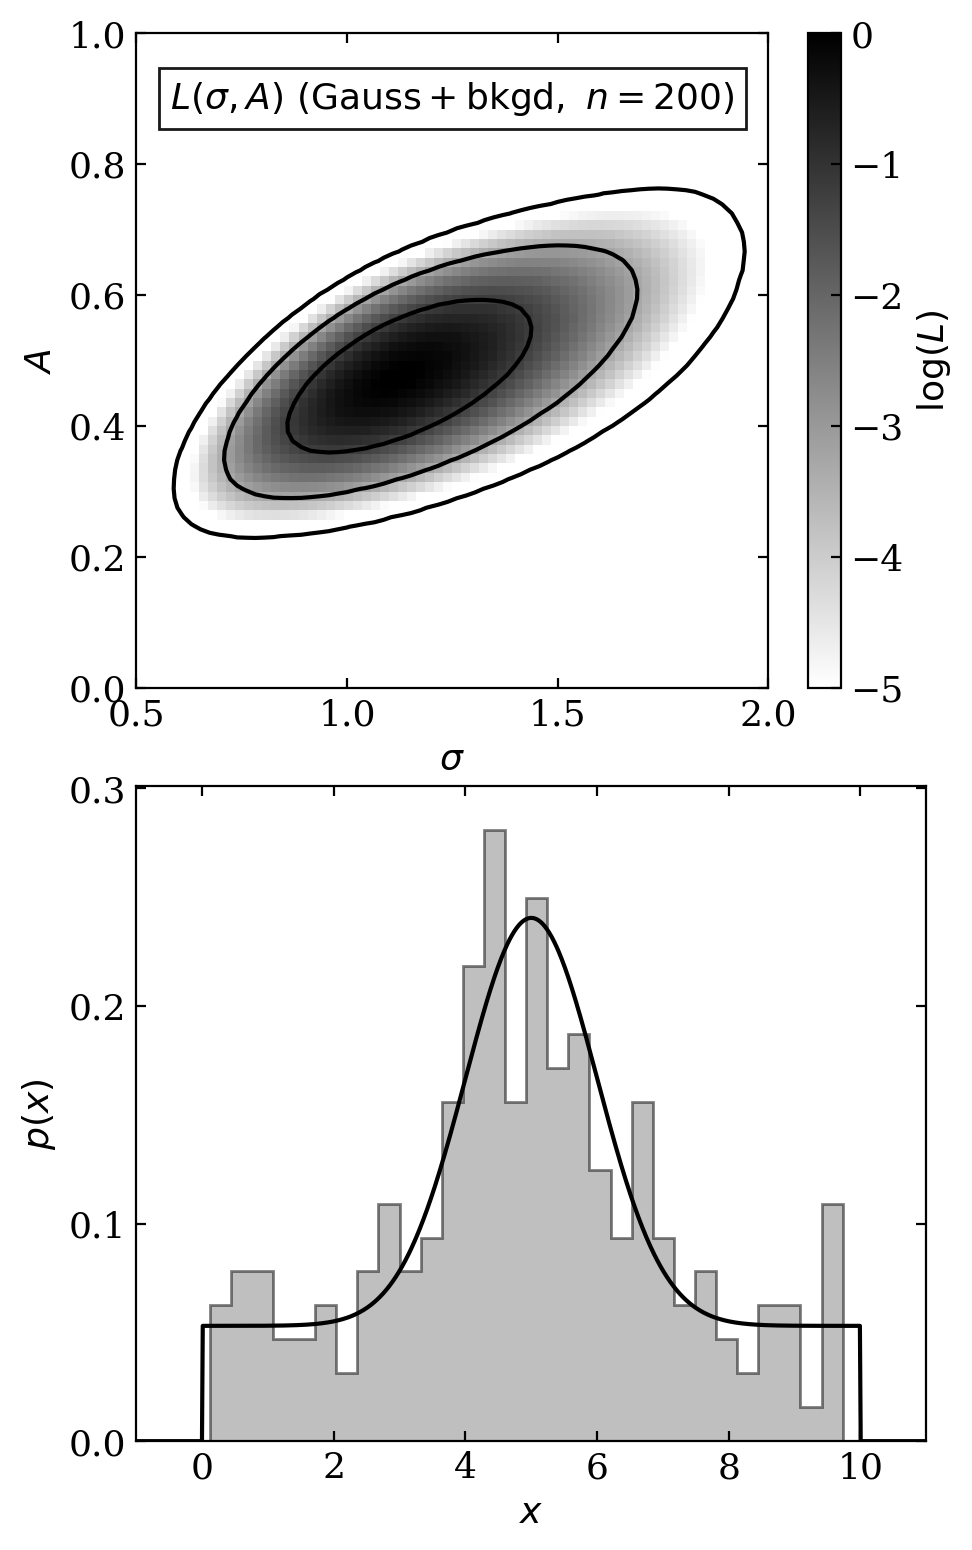

In [28]:
from scipy.stats import truncnorm, uniform
from astroML.plotting.mcmc import convert_to_stdev

def gausslin_logL(xi, A=0.5, sigma=1.0, mu=5.0, L=10.0):
    """Equation 5.80: gaussian likelihood with uniform background"""
    xi = np.asarray(xi)

    shape = np.broadcast(sigma, A, mu, L).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return np.sum(np.log(A * np.exp(-0.5 * ((xi - mu) / sigma) ** 2)
                         / (sigma * np.sqrt(2 * np.pi))
                         + (1. - A) / L), 0)

#------------------------------------------------------------
# Define the distribution
np.random.seed(0)
mu = 5.0
sigma = 1.0
L = 10.0
A = 0.5
N = 200

xi = np.random.random(N)
NA = np.sum(xi < A)

dist1 = truncnorm((0 - mu) / sigma, (L - mu) / sigma, mu, sigma)
dist2 = uniform(0, 10)

xi[:NA] = dist1.rvs(NA)
xi[NA:] = dist2.rvs(N - NA)

x = np.linspace(-1, 11, 1000)
fracA = NA * 1. / N

#------------------------------------------------------------
# define the (sigma, A) grid and compute logL
sigma = np.linspace(0.5, 2, 70)
A = np.linspace(0, 1, 70)

logL = gausslin_logL(xi, A[:, np.newaxis], sigma)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 8))
fig.subplots_adjust(bottom=0.07, left=0.11, hspace=0.15, top=0.95)

ax = fig.add_subplot(211)
plt.imshow(logL, origin='lower', aspect='auto',
           extent=(sigma[0], sigma[-1], A[0], A[-1]),
           cmap=plt.cm.binary)
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$A$')

ax.text(0.5, 0.9, r'$L(\sigma,A)\ (\mathrm{Gauss + bkgd},\ n=200)$',
        bbox=dict(ec='k', fc='w', alpha=0.9),
        ha='center', va='center', transform=plt.gca().transAxes)

ax.contour(sigma, A, convert_to_stdev(logL),
           levels=(0.683, 0.955, 0.997),
           colors='k')

ax2 = plt.subplot(212)
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax2.plot(x, fracA * dist1.pdf(x) + (1. - fracA) * dist2.pdf(x), '-k')
ax2.hist(xi, 30, density=True, histtype='stepfilled', fc='gray', alpha=0.5)

ax2.set_ylim(0, 0.301)
ax2.set_xlim(-1, 11)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$p(x)$')
plt.show()

A more realistic example might be one where all three parameters are unknown: the location, the width, and the background level. *But that will have to wait until we learn about MCMC numerical techniques.*

---

## Bayesian Model Comparison <a class="anchor" id="two"></a>

Model comparison and hypothesis testing in Bayesian inference are enormously different from classical/frequentist statistics. We don't have p-values here. ***In Bayesian inference, we probabilistically rank models based on how well they explain the data under our prior knowledge.*** Let's look back at how we assessed goodness-of-fit and model choice in frequentist statistics. 

Let's use the example from http://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/
to illustrate some ideas about model selection.

In [4]:
#Execute this cell to load all of the modules we'll need and define the data array.
from scipy import stats
from scipy import optimize

# generate (x,y, sigma_y) "data" 
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.25,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])

x,y, sigma_y = data

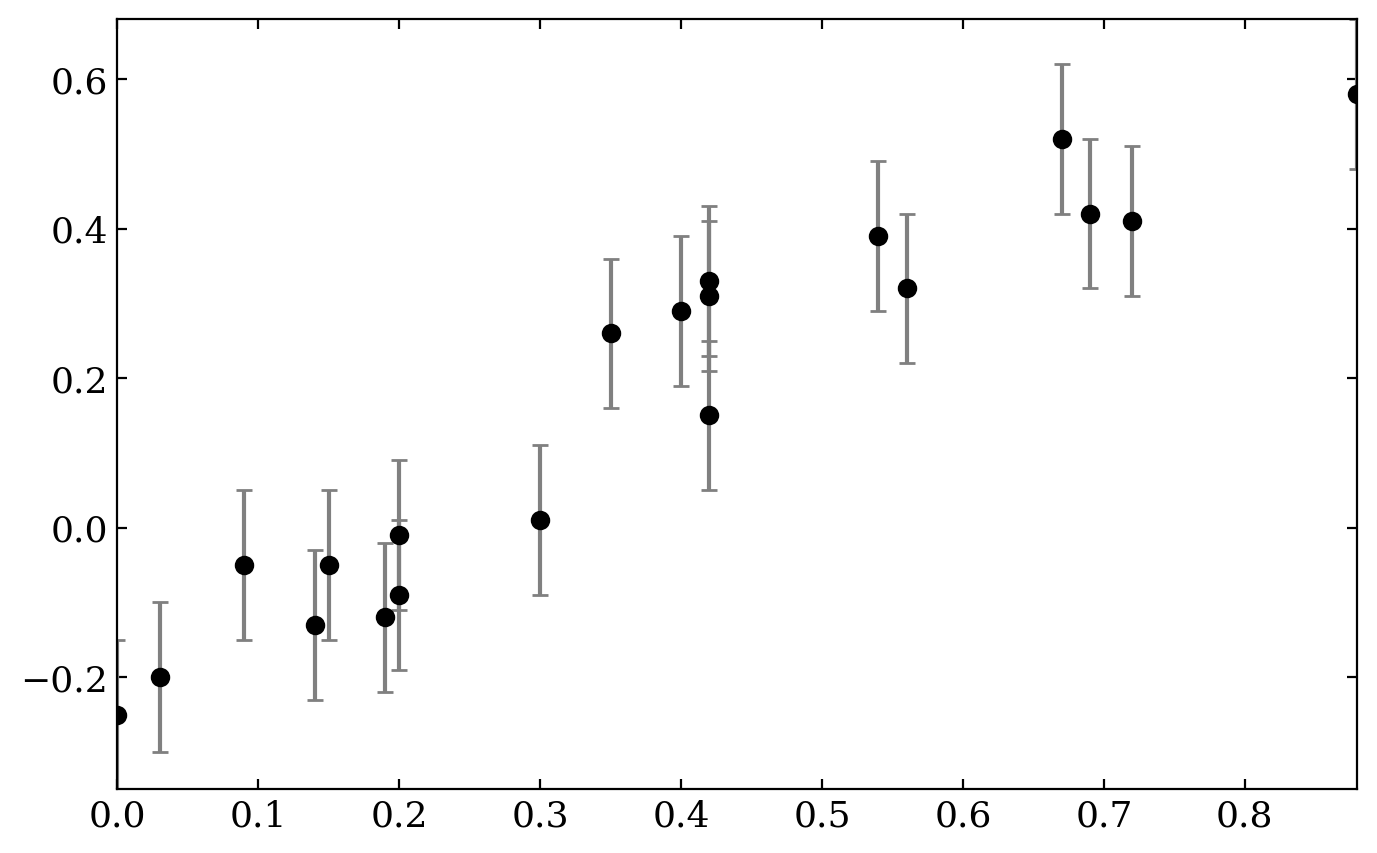

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray');

Is this data linear or quadratic?

In [6]:
#Functions to do a polynomial fit, compute the likelihood, and determine the best-fit parameters.

def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args) for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, model=polynomial_fit, data=data):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, data, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

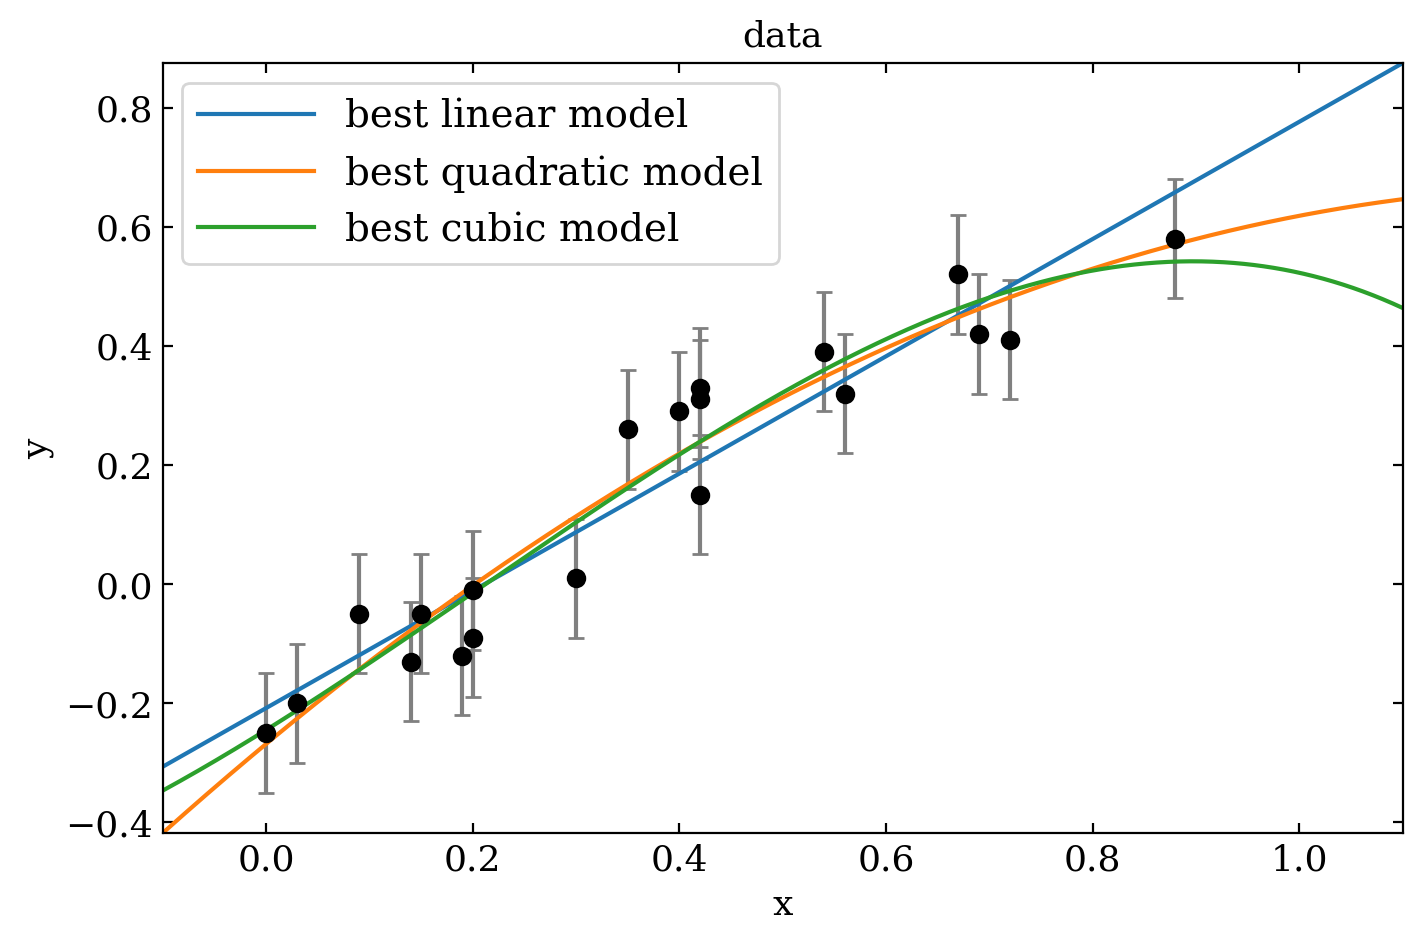

In [7]:

x, y, sigma_y = data
Ndata = x.size

# get best-fit parameters for linear, quadratic and cubic models
theta1 = best_theta(1, data=data)
theta2 = best_theta(2, data=data)
theta3 = best_theta(3, data=data)
# generate best fit lines on a fine grid 
xgrid = np.linspace(-0.1, 1.1, 1000)
yfit1 = polynomial_fit(theta1, xgrid)
yfit2 = polynomial_fit(theta2, xgrid)
yfit3 = polynomial_fit(theta3, xgrid)

# plot 
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xgrid, yfit1, label='best linear model')
ax.plot(xgrid, yfit2, label='best quadratic model')
ax.plot(xgrid, yfit3, label='best cubic model')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');

We can use $\chi^2$ per degree of freedom to determine which fit is "best".  It is computed as 

$$ \chi^2_\mathrm{dof}  = \frac{1}{N-k} \sum_i^N \left( \frac{y - y_\mathrm{fit}}{\sigma_y} \right)^2, $$

where $N$ is the number of data points and $k$ is the number of free model parameters (here 2, 3, and 4).

For large values of $(N-k)$ (larger than about 10), the distribution of 
$\chi^2$ per degre of freedom is approximately Gaussian with a width of
$\sigma=\sqrt{2/(N-k)}$. 

In [8]:
#Compute chi2: sum{[(y-yfit)/sigma_y]^2} 
chi21 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2) 
chi22 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2) 
chi23 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
# normalize by the number of degrees of freedom
# the number of fitted parameters is 2, 3, 4
chi2dof1 = chi21/(Ndata - 2)
chi2dof2 = chi22/(Ndata - 3)
chi2dof3 = chi23/(Ndata - 4)

print("CHI2:")
print('   best linear model:', chi21)
print('   best quadratic model:', chi22)
print('   best cubic model:', chi23)
print("CHI2 per degree of freedom:")
print('   best linear model:', chi2dof1)
print('   best quadratic model:', chi2dof2)
print('   best cubic model:', chi2dof3)

CHI2:
   best linear model: 11.499462014956965
   best quadratic model: 9.291258246116401
   best cubic model: 8.979208294682907
CHI2 per degree of freedom:
   best linear model: 0.6388590008309425
   best quadratic model: 0.5465446027127294
   best cubic model: 0.5612005184176817


**Which model should we adopt?**

Obviously, the cubic model has the lowest $\chi2$ ("fits the best"), but 
it has 4 free parameters while the linear model has only 2 free parameters.

**How do we trade improvement in $\chi^2$ with increasing model complexity?**

**Occam’s razor:**
> *All else being equal (i.e., each model fits the data equally well), the less complex model is favored.*

This principle was already known to [Ptolemy](https://www.wikiwand.com/en/Ptolemy) (circa 100-170 AD) who said: *“We consider it a good principle to explain the phenomena by the simplest hypothesis possible.”*

## Bayesian Model Comparison

We start with Bayes' Theorem,

$$ \mathrm{Posterior} = \frac{\mathrm{Likelihood}\times\mathrm{Prior}}{\mathrm{Evidence}} $$

$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,\times p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

and marginalize over model parameter space $\theta$
to obtain **the probability of model $M$** given the data $D$ and prior information $I$:

$$p(M\,|\,D,I) \equiv \int p(M,\theta \,|\,D,I) \, d\theta = 
      \int \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)} \, d\theta =
      \frac{p(M\,|\,I)}{p(D\,|\,I)} \int p(D\,|\,M,\theta,I)\,p(\theta\,|\,M,I) \, d\theta  $$
 
 
#### Odds Ratios \& Bayes Factors

To determine which model is better we compute the ratio of the posterior probabilities or the **odds ratio** for two models as

$$O_{21} \equiv \frac{p(M_2|D,I)}{p(M_1|D,I)}.$$

The meaning of this number is like *"If $O_{21}=10$ and I bet 10 Euros against 1 Euro in favour of model 2 against model 1, then the bet is fair"* (of course considering the info $I$ at my disposal).


The posterior probability that the model $M$ is correct given data $D$ (a number between 0 and 1) is

$$p(M|D,I) = \frac{p(D|M,I)p(M|I)}{p(D|I)},$$

the odds ratio can ignore $p(D|I)$ since it  will be the same for both models.  

We get 

$$O_{21} = \frac{p(D\,|\,M_2,I)\,p(M_2\,|\,I)}{p(D\,|\,M_1,I)\,p(M_1\,|\,I)} \equiv B_{21} \, \frac{p(M_2\,|\,I)}{p(M_1\,|\,I)},$$

where $B_{21}$ is called the **Bayes factor**. 

- The Bayes factor compares how well the models fit the data. 
- It is a ratio of data likelihoods averaged over all allowed values of the model parameters. 
- If two models fit the data equally well, the "winner" is decided based on priors. 

And this makes perfect sense! Consider a noisy image of a source which is equally likely to be a star or a galaxy. 
The posterior probability that the source is a star will greatly depend on whether we are looking 
at the Galactic plane or not. 


#### Bayesian Evidence 

We can compute 

$$ E(M) \equiv p(D\,|\,M, I) = \int p(D\,|\,M, \theta, I) \, p(\theta\,|\,M, I) \, d\theta, $$

where $E(M)$ is called **the marginal likelihood for model $M$ (or "evidence" or "fully marginalized likelihood")** and it quantifies the probability that the  data $D$ would be observed if the model $M$ were the correct model. *Note: the symbol for Bayesian evidence is sometimes $\mathcal{Z}$; check for context!*

The evidence is a weighted average of the likelihood function with the prior for model parameters acting as the weighting function. 

In standard parameter estimation, that's the thing at the denominator in Bayes' theorem. Say you want to measure a parameter $\theta$ from a model $M$ (like we did with the fit above) one can write

$$p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D|M)}$$

so that's precisely the term that we ignored so far.


#### How do we interpret the values of the odds ratio in practice?

**Jeffreys** proposed a scale for interpreting the odds ratio, where $O_{21} > 10$ represents *“strong”* evidence in favor of $M_2$ ($M_2$  is ten times more probable than $M_1$), and $O_{21} > 100$ is *“decisive”* evidence ($M_2$ is one hundred  times more probable than $M_1$). When $O_{21} < 3$, the evidence is *“not worth more than a bare mention.”*

The table below uses Bayes factors, which are numerically equivalent to odds ratios whenever we ascribe equal priors odds to our models.

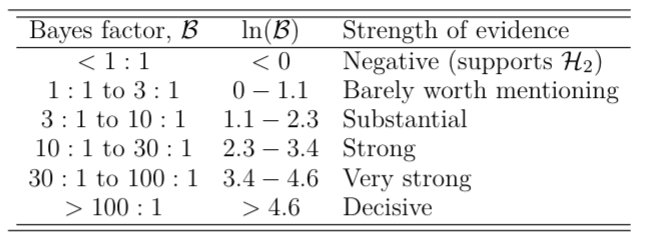

But note:
  * These are just **definitions of conventions**, i.e., a way to give a quantitative meaning to qualitative phrases.
  * The odds ratio **compares** the models, it doesn't tell us about the *absolute* goodness of fit: model A can be 100x better than model B, but still be pretty lousy.
  * Remember: "***GIGO***" ***= Garbage In, Garbage Out***. If we use our powerful statistics to rank a bunch of lousy models, that's our fault.

### Hypothesis Testing

In *hypothesis testing* we are essentially comparing a model, $M_1$, to its complement.  That is $p(M_1) + p(M_2) = 1$.  If we take $M_1$ to be the "null" (default) hypothesis (which is generally that, for example, a correlation does *not* exist), then we are asking whether or not the data reject the null hypothesis.

- In **classical hypothesis testing** we can ask whether or not a single model provides a good description of the data.  
- In **Bayesian hypothesis testing**, we need to have an alternative model to compare to.


Here is another example of a recent paper from my research field: *Who Ordered That? Unequal-mass Binary Black Hole Mergers Have Larger Effective Spins* by Callister et al [arxiv:2106.00521](https://arxiv.org/abs/2106.00521). Using an exquisitely Bayesian approach, they look for correlations between the masses and the spins of the binary black holes detected by LIGO. Good stats in there!



---

### Example of Cauchy Versus Gaussian Model Comparison <a class="anchor" id="twoa"></a>

We now draw a sample from a Cauchy distribution (remember, it has heavy tails!) and perform Bayesian Model Comparison for Cauchy and Gaussian models. The Bayesian evidence is computed as a direct brute-force numerical integral over parameter space-- no stochasting sampling methods are used here.

Results for first 10 points:
  L(M = Cauchy) = 1.18e-12 +/- 5.39e-16
  L(M = Gauss)  = 8.09e-13 +/- 7.45e-16
Bayesian odds ratio of Cauchy-versus-Gaussian Models = 1.45 +/- 0.00134


/Users/dgerosa/box/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/dgerosa/box/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/dgerosa/box/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be

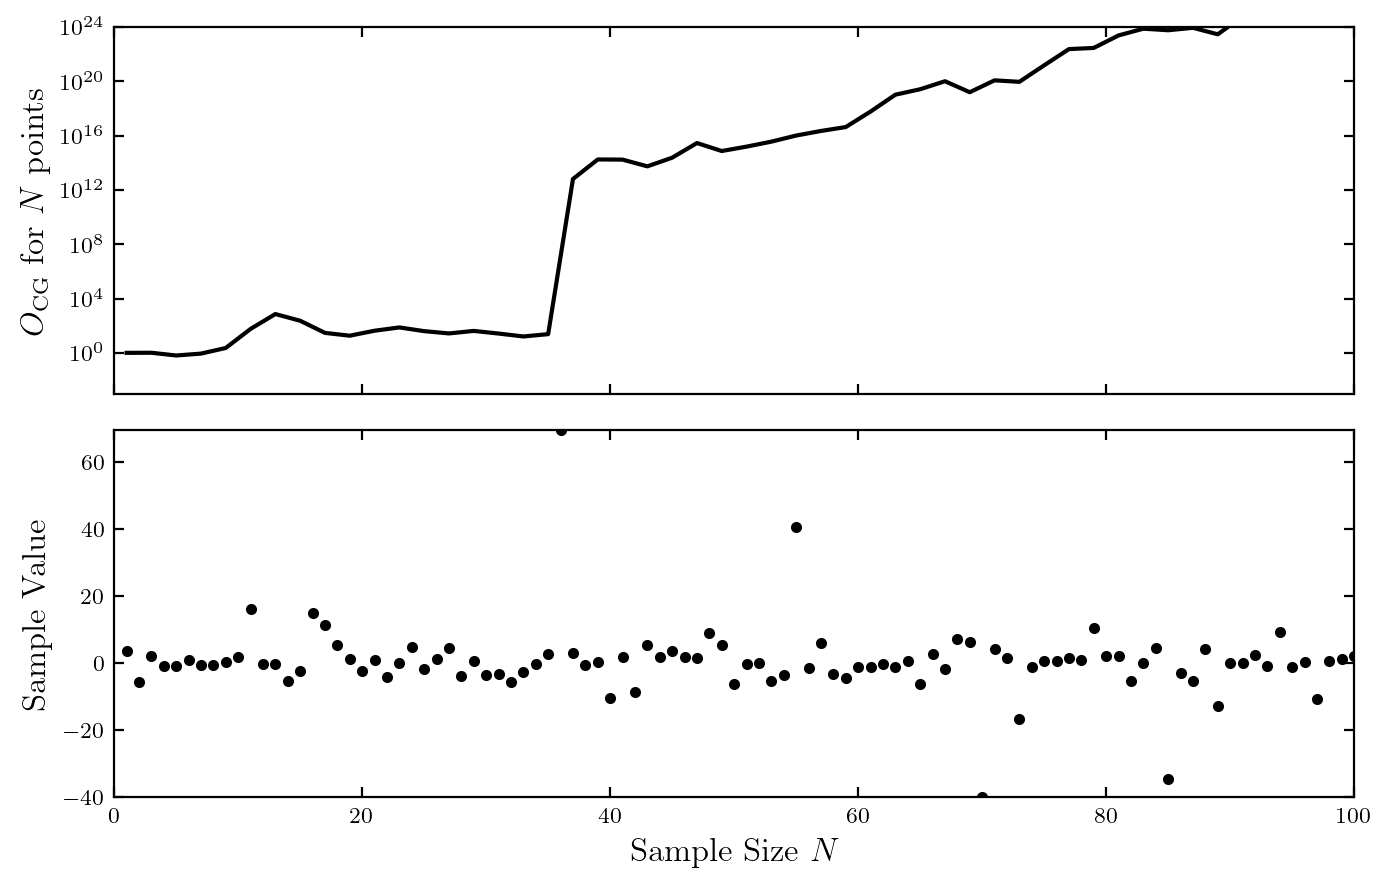

In [10]:

from scipy.stats import cauchy, norm
from scipy import integrate


def logL_cauchy(xi, gamma, mu,
                mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - n * np.log(np.pi)
            + (n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))


def logL_gaussian(xi, sigma, mu,
                  mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.57: gaussian likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - 0.5 * n * np.log(2 * np.pi)
            - (n + 1) * np.log(sigma)
            - np.sum(0.5 * ((xi - mu) / sigma) ** 2, 0))


def calculate_odds_ratio(xi, epsrel=1E-8, epsabs=1E-15):
    """
    Compute the odds ratio by perfoming a double integral
    over the likelihood space.
    """
    gauss_Ifunc = lambda mu, sigma: np.exp(logL_gaussian(xi, mu, sigma))
    cauchy_Ifunc = lambda mu, gamma: np.exp(logL_cauchy(xi, mu, gamma))

    I_gauss, err_gauss = integrate.dblquad(gauss_Ifunc, -np.inf, np.inf,
                                           lambda x: 0, lambda x: np.inf,
                                           epsabs=epsabs, epsrel=epsrel)
    I_cauchy, err_cauchy = integrate.dblquad(cauchy_Ifunc, -np.inf, np.inf,
                                             lambda x: 0, lambda x: np.inf,
                                             epsabs=epsabs, epsrel=epsrel)

    if I_gauss == 0:
        O_CG = np.inf
        err_O_CG = np.inf
    else:
        O_CG = I_cauchy / I_gauss
        err_O_CG = O_CG * np.sqrt((err_gauss / I_gauss) ** 2)

    return (I_gauss, err_gauss), (I_cauchy, err_cauchy), (O_CG, err_O_CG)


#------------------------------------------------------------
# Draw points from a Cauchy distribution
np.random.seed(44)
mu = 0
gamma = 2
xi = cauchy(mu, gamma).rvs(100)

#------------------------------------------------------------
# compute the odds ratio for the first 10 points
((I_gauss, err_gauss),
 (I_cauchy, err_cauchy),
 (O_CG, err_O_CG)) = calculate_odds_ratio(xi[:10])

print("Results for first 10 points:")
print("  L(M = Cauchy) = %.2e +/- %.2e" % (I_cauchy, err_cauchy))
print("  L(M = Gauss)  = %.2e +/- %.2e" % (I_gauss, err_gauss))
print("Bayesian odds ratio of Cauchy-versus-Gaussian Models = %.3g +/- %.3g" % (O_CG, err_O_CG))

#------------------------------------------------------------
# calculate the results as a function of number of points
Nrange = np.arange(1, 101, 2)
Odds = np.zeros(Nrange.shape)
for i, N in enumerate(Nrange):
    res = calculate_odds_ratio(xi[:N])
    Odds[i] = res[2][0]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=0.1)

ax1 = fig.add_subplot(211, yscale='log')
ax1.plot(Nrange, Odds, '-k')
ax1.set_ylabel(r'$O_\mathrm{CG}$ for $N$ points', fontsize=12)
ax1.set_xlim(0, 100)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_locator(plt.LogLocator(base=10000.0))
ax1.set_ylim(1e-3, 1e24)

ax2 = fig.add_subplot(212)
ax2.scatter(np.arange(1, len(xi) + 1), xi, lw=0, s=16, c='k')
ax2.set_xlim(0, 100)
ax2.set_xlabel('Sample Size $N$', fontsize=12)
ax2.set_ylabel('Sample Value', fontsize=12)

plt.show() 

The odds ratio for the first 10 points is very close to unity ($O_{CG} = 1.45$) and is therefore inconclusive.
 
***Why do we get an inconclusive odds ratio?*** 
- With only 10 points, the probability of drawing at least one point far away from the mean, which would strongly argue against the Gaussian model, is fairly small. 
- As the number of data values is increased, the ability to discriminate between the models increases, too. 
- As the above figure shows, when we increase the size of the observed sample, the odds ratio quickly favors the  Cauchy over the Gaussian model.
- But things are not always that nice in realistic scenario. Careful that if you don't not know your models well enough things can go terribly wrong as you increase the number of datapoints (for examples in my field of ressearch see [Zimmerman et al 2019](https://arxiv.org/abs/1903.11008) and [Moore et al 2021](https://arxiv.org/abs/2103.16486)).

If you look at the code above... it's kind of nasty: there are numerical integrals etc. Unfortuntately this is generic: computing Bayesian evidences is a pain in the neck. Not even MCMCs are enough! 



### Example of Coin Flip Bayesian Model Comparison <a class="anchor" id="twob"></a>

Let's look at an example using coin flips. Let's assume we have $N$ draws and $k$ are "success" (say, heads). 

We will compare two hypotheses:

- **M1**: We know the guy. The coin has a known heads probability $b_\ast$ (say, a fair coin with $b_\ast=0.5$), with a prior given by a delta function, $\delta(b-b_\ast)$,
- **M2**: They are cheating. The heads probability $b$ is unknown, with a uniform prior in the range 0–1.

Basically in **M1** we know about the fairness of the coin. In **M2** we don't know anything about the fairness of the coin.

The model that we need (parametrized by the probability of success $b$, with $k$ successes) is the *binomial distribution*:

  $$    p(k\,|\,b, N) = \frac{N!}{k! \, (N-k)!} \, b^k \, (1-b)^{N-k} $$

For model **M2** the prior for $b$ is flat in the range 0-1 and the product of the data likelihood and prior is same as above. However, for model **M1** the prior is a  delta function $\delta(b-b_\ast)$ and we get for the product of the data likelihood and prior (which picks out $b=b_\ast$) 

$$    p(k\,|\,b_\ast, N, M1)\,p(b|M1, I) = \frac{N!}{k! \, (N-k)!} \, b_\ast^k \, (1-b_\ast)^{N-k}. $$

Consequently, the **odds ratio** is given by 

$$ O_{21} = \int_0^1 \left(\frac{b}{b_\ast}\right)^k \left(\frac{1-b}{1-b_\ast}\right)^{N-k} db, $$

as illustrated in the following figure. 


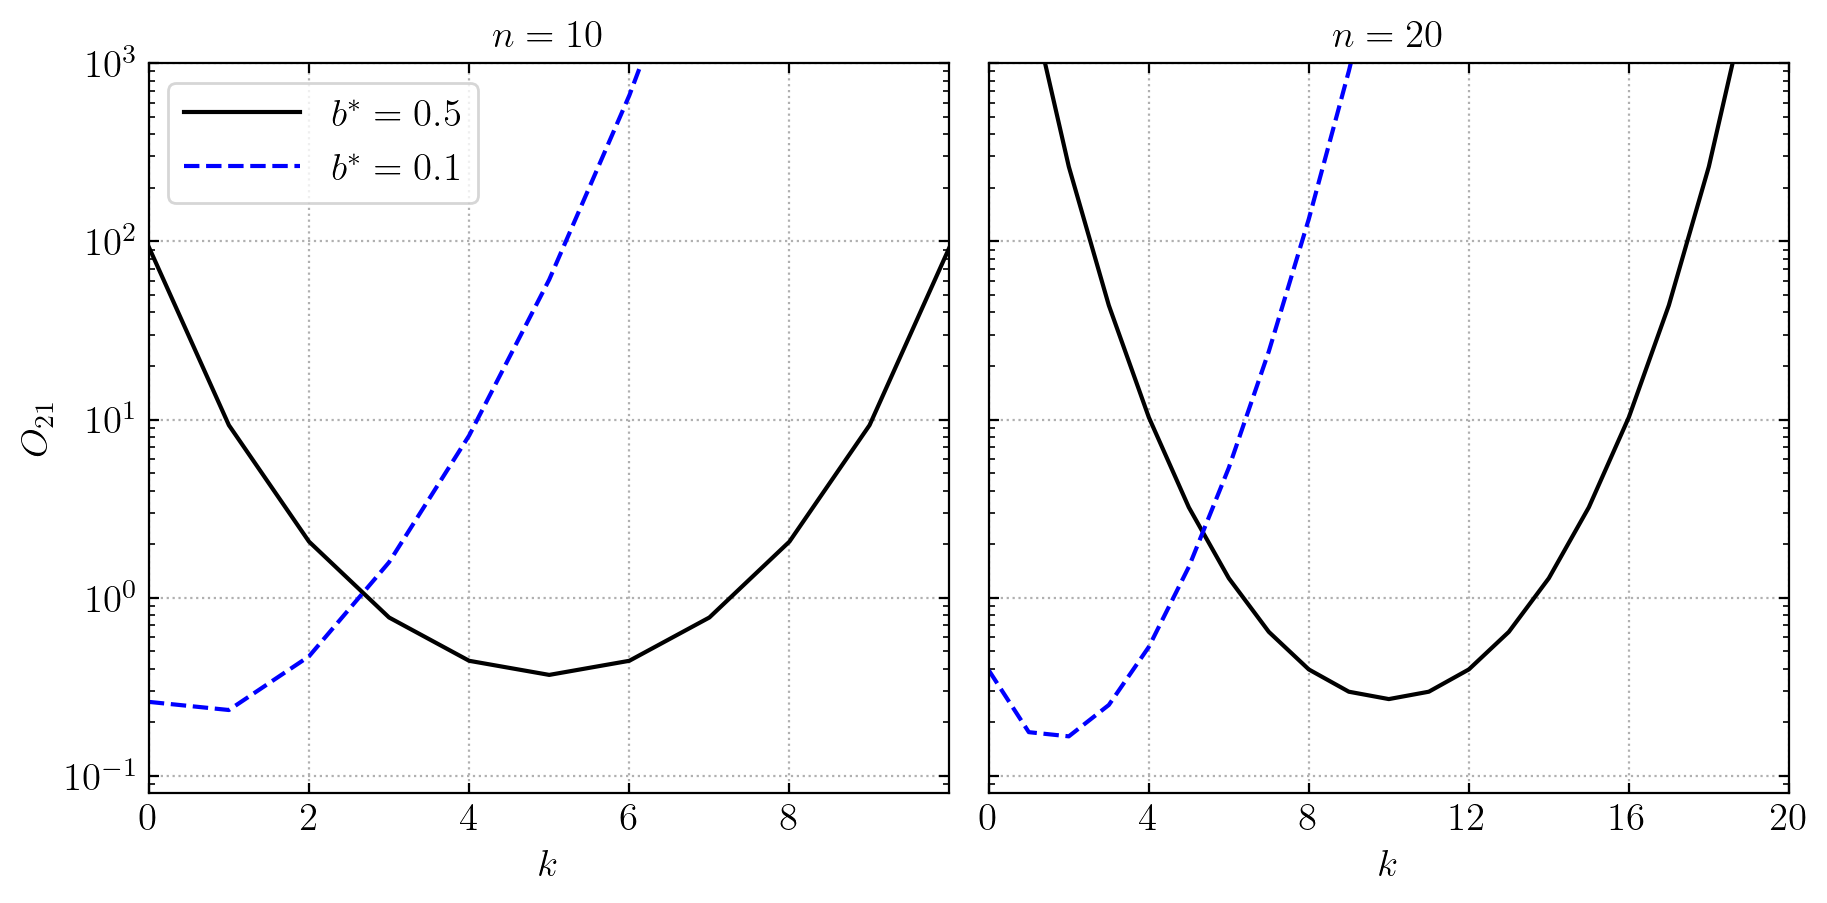

In [11]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

@np.vectorize
def odds_ratio(n, k, bstar):
    """Odds ratio between M_2, where the heads probability is unknown,
    and M_1, where the heads probability is known to be `bstar`, evaluated
    in the case of `k` heads observed in `n` tosses.

    Eqn. 5.25 in the text
    """
    factor = 1. / (bstar ** k * (1 - bstar) ** (n - k))
    f = lambda b: b ** k * (1 - b) ** (n - k)

    return factor * integrate.quad(f, 0, 1)[0]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.13, right=0.95, wspace=0.05, bottom=0.15)

subplots = [121, 122]
n_array = [10, 20]

linestyles = ['-k', '--b']
bstar_array = [0.5, 0.1]

for subplot, n in zip(subplots, n_array):
    ax = fig.add_subplot(subplot, yscale='log')
    k = np.arange(n + 1)

    # plot curves for two values of bstar
    for ls, bstar in zip(linestyles, bstar_array):
        ax.plot(k, odds_ratio(n, k, bstar), ls,
                label=r'$b^* = %.1f$' % bstar)

    if subplot == 121:
        ax.set_xlim(0, n - 0.01)
        ax.set_ylabel(r'$O_{21}$')
        ax.legend(loc=2)
    else:
        ax.set_xlim(0, n)
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlabel('$k$')
    ax.set_title('$n = %i$' % n)
    ax.set_ylim(8E-2, 1E3)
    ax.xaxis.set_major_locator(plt.MultipleLocator(n / 5))
    ax.grid()


plt.show()

And note the nice numpy trick `@np.vectorize`, which allows you to magically make a scalar function array-compatible. If you've never seen it, the `@` is a [python decorator](https://realpython.com/primer-on-python-decorators/), which an extremely powerful structure.

This figure illustrates the behavior of $O_{21}$ as a function of $k$ for two different values of $N$ and for two different values of $b_\ast$: $b_\ast = 0.5$  (**M1**: the coin is fair) and $b_\ast = 0.1$ (**M1**: the coin is biased to tails). 

*The ability to distinguish  the two hypothesis **improves** with the sample size.*

For example:
- when $b_\ast = 0.5$ and $k/N = 0.1$ ($k=1$ on the left and $k=2$ on the right), the odds ratio in favor of **M2** increases from $\sim 9$ for $N=10$ to $\sim 263$ for $N=20$. 
- when k = $b_\ast N$, the odds ratio is $0.37$ for $N=10$ and 0.27 for $N=20$. 
- **the simpler model is favored by the data**, and the support strengthens with the sample size. 

**NOTE** 
- *$O_{21}= \sqrt{\pi/(2N)}$ when k = $b_\ast N$ and $b_\ast = 0.5$.* 
- To build strong evidence that a coin is fair, $O_{21} < 0.1$, it takes as many as $N > 157$ tosses. 
- With N = 10,000, the heads probability of a fair coin is measured with a precision of 1% and the corresponding odds ratio is $O_{21} \approx 1/80$.

***Frequentist Versus Bayesian***

In the **frequentist approach**, we ask whether we can reject the "null hypothesis" that our coin is fair. Specifically, we ask whether a given $k$ is a very unusual outcome (at some significance level $\alpha$, say $\alpha=0.05$) for a fair coin with $b_\ast = 0.5$ and with a given N. 

In the **Bayesian approach**, we offer an alternative hypothesis that the coin has an unknown heads probability. While this probability can be estimated from provided data ($b_0$), **we consider all the possible values** of $b_0$ when comparing the two proposed hypotheses. 

## Approximate Bayesian Model Comparison <a class="anchor" id="three"></a>

While the full *Odds Ratio* is the ultimate goal, it can be costly to compute. So we have some *approximate methods* that balance between ***goodness of fit*** and ***model complexity***. 

### Akaike information criterion (AIC) 

We've seen this before! 

$${\rm AIC} \equiv -2 \ln [L_0(M)] + 2k + \frac{2k(k+1)}{N-k-1}.$$

### Bayesian information criterion (BIC)

- The BIC is new to us. 
- It can be derived from the Bayesian odds ratio by assuming that the likelihood is Gaussian (see $\S$5.4.2 in textbook for details). 
- It's easier to compute than the odds ratio because it is based on the maximum value of the likelihood, $L_0(M)$, rather than on the integration of the likelihood over the full parameter space (i.e. evidence $E(M)$). 

For $N$ data points and a model with $k$ parameters,

$${\rm BIC} \equiv -2 \ln [L_0(M)] + k \ln N.$$ 

where 
- the 1st term is equal to the model's $\chi^2$ (under the assumption of normality; note that this is not $\chi^2$ per degree of freedom!) and 
- the 2nd term on the RHS penalizes complex models relative to simple ones.

When two models are compared, **the model with the smaller BIC/AIC value wins**. If the models are equally successful in describing the data (i.e., they have the same value of $L_0(M)$), then the model with fewer free parameters wins. 

Let's use BIC to choose the best polynomial from the earlier line fitting example. 
Starting with

$${\rm BIC} = \chi^2 + k \ln N,$$ 

with $N=20$ we have:

<pre>
     model     chi2    k   k*ln(N)   BIC   
     ------------------------------------
    linear    11.32    2    5.99    17.31   
  quadratic    9.46    3    8.99    18.45   
     cubic     8.99    4   11.98    20.97  
</pre>

Therefore, **the improvement in $\chi^2$ for the quadratic model**, relative to the linear model, **is not large enough to justify another free model parameter.**

**BUT NOTE!** 
- The BIC and AIC are approximations and might not be valid if the underlying assumptions are not met.
- Furthermore, unlike the odds ratio, both of them penalize unconstrained parameters. The odds ratio does not care about unconstrained parameters. (Think about this for a second: it's crucial!)
- In general, it is better to compute the odds ratio when computationally feasible. 

# Monte Carlo Methods & Markov Chains <a class="anchor" id="one"></a>

### Motivation

Consider the problem of estimating location and scale parameters for homoscedastic data drawn from a Gaussian. We had a two-dimensional posterior pdf for $\mu$ and $\sigma$:

![Ivezic, Figure 5.5](http://www.astroml.org/_images/fig_likelihood_gaussian_1.png)

It was easy to *numerically* integrate the posterior pdf to find the marginal distributions, and find its maximum, using a brute-force grid search because it was only a $2$D problem. With $100$ grid points per coordinate it was only $10^4$ values. 

However, **what about high parameter dimensions?**
- Even in a case of rather simple $5$D problem (as we'll discuss next time), we'd have $10^{10}$ values! And often we work with models of much higer dimensionality (it can be thousands!). **Brute-force grid methods are not feasible beyond a few dimensions**, and even then can be waste of time. 
- You could **simply randomly sample the grid at every point**, and try to find the maximum based on that. But that can also be quite time consuming, and you will spend a lot of time in regions of parameter space that yields small likelihood.

A better way is to adopt a ***Markov-Chain Monte Carlo (MCMC)***. MCMC gives us a way to make this problem computationally tractable by sampling the full multi-dimensional parameter space, in a way that builds up the most sample density in regions that are closest to the maximum probability. Then, you can post-process the “chain” of points to infer the posterior distribution and uncertainty regions.

Ivezic, Figure 5.22 shows a problem similar to the one above, done with a Markov Chain Monte Carlo algorithm.  The dashed lines are the known (analytic) solution.  The solid lines are from the MCMC estimate with 10,000 sample points.

![Ivezic, Figure 5.10](http://www.astroml.org/_images/fig_cauchy_mcmc_1.png)

## MCMC: Broad strategy

- I need to find a pdf, but getting the pdf is hard. 
- Instead, getting samples is much easier. 
- So I don't even try to calculate the posterior, I just sample it. 
- The *density* of samples is going to be important.  

### What does Monte Carlo mean?

We've seen Monte Carlo integrations already. The name derives from the name of an administrative area of the Principality of Monaco ([Monte Carlo](https://www.wikiwand.com/en/Monte_Carlo)) known for high-stakes casinos and gambling. Gambling and random sampling go hand in hand together.


**Example you've probably seen already: compute $\pi$** 
- You have forgotten the value of $\pi$, but you know the formula for the area of a square and how to draw a circle. 
- We can use the information that we *do* know to numerically compute $\pi$.

1. We start by drawing a square and circumscribing a circle in it (actually it suffices to just do a quarter of a circle and scale accordingly).
2. We put down random points within the square and note which ones land in the circle.
3. The ratio of random points in the circle to the number of random points drawn is related to the area of our circle, allowing us to calculate $\pi$.
4. Using more random points yields more precise estimates of the area.

Try it below. How many draws does it take to get the error down to 1 part in a thousand?

We'll consider one quadrant of a square of sides [-1,1] in which we inscribe a circle (actually just one quarter of a circle).

In [1]:
# Execute this cell
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Estimate of pi is 3.132 for 1000 draws with fractional error 0.0030534364723675406.


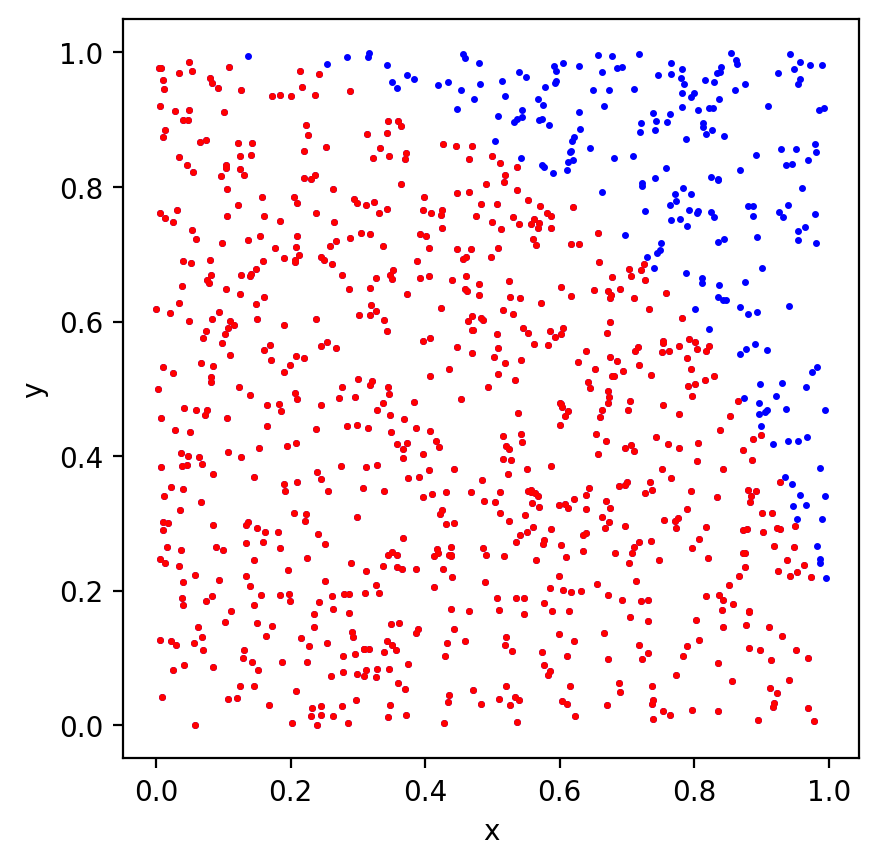

In [2]:
# Lay down M random points.  Tally how many are within a unit circle.
M = 1000
x = stats.uniform(0,1).rvs(M) # M random draws between 0 and 1
y = stats.uniform(0,1).rvs(M) # M random draws between 0 and 1

r2 = x**2+y**2 # equation for radius of cirle in x,y

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))

# Plot points in square
plt.plot(x, y, '.', 
         markersize=3, c='blue') 

# Plot points also in circle
plt.plot(x[r2 < 1], y[r2 < 1], '.', 
         markersize=3, c='red') 

#ax.axis([0, 1, 0, 1], aspect='equal');
plt.xlabel('x')
plt.ylabel('y')
    
# A_square = d^2, Acircle = pi*d^2
piEst = 4 * np.sum(r2 < 1) / M # pi = 4A/d^2, where A is d^2 times the ratio of points "in" to total points

print("Estimate of pi is {0} for {1} draws with fractional error {2}.".format(piEst, M, 
                                                                              np.abs((np.pi-piEst)/np.pi)))

See also [this Khan Academy simulation](https://www.khanacademy.org/computer-programming/monte-carlo-finding-the-value-of-pi/6530004791197696/embedded?embed=yes&article=yes&editor=no&buttons=no&author=no&autoStart=yes&width=610&height=420).

#### Try at home: 
Generalize the code above to compute the volume of an N-dimensional sphere as a function of the number of dimension $N$. Warning: the $N\to\infty$ limit is very surprising. Here is a blog post I wrote about this funny math problem: https://davidegerosa.com/nsphere/


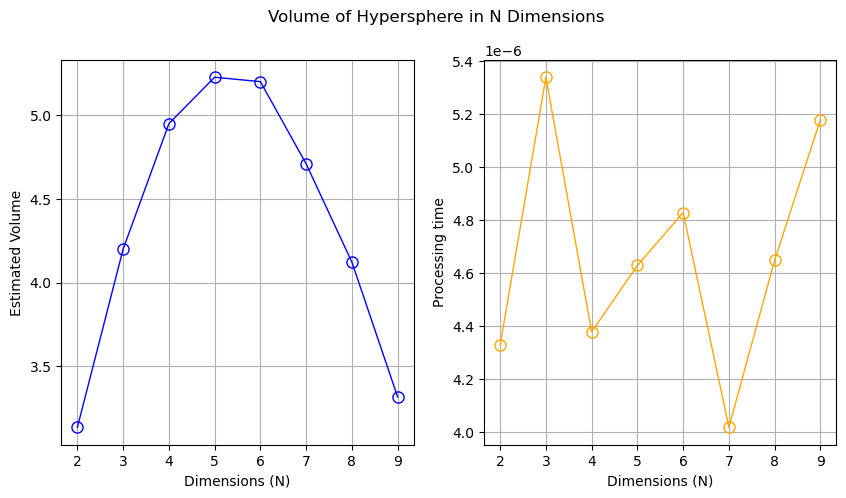

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import random
import time


def volume_hypersphere(N,M): 
    """
    estimates the volume of a unit hypersphere (a sphere of radius 1) in N-dimensional 
    space using Monte Carlo simulation. It generates M random points uniformly within the 
    N-dimensional unit hypercube. For each point, it calculates the Euclidean distance 
    from the origin. If this distance is less than 1, the point lies within the hypersphere.
    """
    # M random numbers for each of N dimensions
    x = []
    for i in range(N): x.append(stats.uniform(0,1).rvs(M))
    x = np.array(x)
    
    sum = 0
    for i in range(N): 
        sum += x[i,:]**2
    r = np.sqrt(sum)

    return 2**N*np.sum(r < 1)/M



M = 100000 # number of random points
N=np.arange(2,10,1)
V=[]
elapsed_time=[]

for n in N:
    V.append(volume_hypersphere(n,M))
    t_start = time.process_time() 
    t_stop = time.process_time()
    elapsed_time.append(t_stop-t_start)

###

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Volume of Hypersphere in N Dimensions")

ax1.plot(N, V, marker='o', markerfacecolor='none', markeredgecolor='blue', markersize=8, linestyle='-', color='blue', linewidth=1)

ax1.set_xlabel("Dimensions (N)")
ax1.set_ylabel("Estimated Volume")
ax1.grid(True)

ax2.plot(N, elapsed_time, marker='o', markerfacecolor='none', markeredgecolor='orange', markersize=8, linestyle='-', color='orange', linewidth=1)

ax2.set_xlabel("Dimensions (N)")
ax2.set_ylabel("Processing time")
#ax1.title("Volume of Hypersphere in N Dimensions")
ax2.grid(True)

plt.show()

### Back to buisiness...


- In general, ***Monte Carlo methods*** use random sampling to obtain a numerical result (e.g., the value of an integral), where there is no analytic result or it is difficult to obtain.
- In the case of the circle above, we have computed the intergral: $\int\int_{x^2+y^2\le 1} dx dy.$

Recall ***Monte Carlo integration***. 
- Our goal was to integrate $\int g(x)f(x)dx$. 
- We could do this on a grid of $x$, such that $\int g(x)f(x)dx \approx \sum_{i=1}^N g(x_i)f(x_i)\Delta x$, where we use the probability distribution at each grid point $f(x_i)$ as weights for the sum over $g(x_i)$.
- But we might waste terms in the sum over low probability areas. If we have random draws from $f(x)$ then the *density* of those points in $x$ directly represent the weighting we desire. We will get most weight in regions of high probability. 
- We can think of our random samples as $f(x)$ being a sum of $\delta$ functions at the sampled points, all overlapping to give high density at the high probability regions. The integral is then 

$$ \int g(x)f(x)dx \approx \frac{1}{N}\int g(x)\sum_i^N\delta(x_i)dx = \frac{1}{N}\sum_i^N \int g(x)\delta(x_i)dx = \frac{1}{N}\sum_i^N g(x_i).$$

## What is a Markov Chain?

A Markov Chain is defined as 

> a sequence of random variables where a parameter depends *only* on the preceding value. Such processes are "memoryless".  
 
Mathematically, we have

$$p(\theta_{i+1}|\theta_i, \theta_{i-1}, \theta_{i-2}, \cdots) = p(\theta_{i+1}|\theta_i).$$

For  equilibrium, or a stationary distribution of positions, it is necessary that the transition probability is symmetric:

$$    p(\theta_{i+1}|\,\theta_i) \cdot \pi (\theta_{i})= p(\theta_i |\, \theta_{i+1}) \cdot \pi (\theta_{i+1}). $$

where $\pi(\theta)$ is the equilibrium distribution. This is called the ***principle of detailed balance*** or reversibility condition (i.e. the probability of a jump between two points does not depend on the direction of the jump).


For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would a a Marov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)


## Markov Chain Monte Carlo (MCMC) Techniques <a class="anchor" id="two"></a>

> The use of **Markov chains** to perform **Monte Carlo integration** is called ***Markov Chain Monte Carlo (MCMC)***.

Given such a Markov chain of length $N$ that corresponds to draws of $p(\theta)$, integrals can be estimated as

$$ \int g(\theta) \, p(\theta) \, d\theta \approx {1 \over N} \sum_{i=1}^Ng(\theta_i).$$

- To estimate the expectation value for $\theta_1$ (i.e., $g(\theta)=\theta_1$), we simply take the mean value of all $\theta_1$ in the chain.
- To visualize the posterior pdf for parameter $\theta_1$, marginalized over all other parameters, $\theta_2, \ldots, \theta_k$, we can construct a histogram of all $\theta_1$ values in the chain, and normalize its integral
to 1. 
- To get a MAP (*maximum a posterori*) estimate for $\theta_1$, we find the maximum of this marginalized pdf.

In order for a Markov chain to reach a **stationary distribution** proportional to $p(\theta)$, the probability of arriving at a point $\theta_{i+1}$ must be proportional to $p(\theta_{i+1})$,

$$ p(\theta_{i+1}) = \int  T(\theta_{i+1}|\theta_i)  \,   p(\theta_i) \,    d \theta_i, $$

where the transition probability $T(\theta_{i+1}|\theta_i)$ is called the **proposal distribution** (and it is assumed that we know how to compute $p(\theta_i)$). The proposal distribution is exactly what it sounds like-- it proposes new positions to jump to in parameter space.

This requirement will be satisfied when the transition probability satisfies **the principle of detailed balance**

$$ T(\theta_{i+1}|\theta_i)  \,  p(\theta_i) = T(\theta_i|\theta_{i+1})  \,  p(\theta_{i+1}). $$

Most of the difficulty in MCMC comes deciding how to step from one position to another.  In our $\pi$ circle example above, we drew points in a completely random manner. However, that's sub-optimal. ***We want random sampling that preferentially steps into regions of high probability density.***  

The most commonly used algorithm for stepping from one position to another is the [Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm.  

## The Metropolis-Hastings Algorithm <a class="anchor" id="three"></a>

**The Metropolis-Hastings algorithm** adopts the following acceptance probability for newly proposed points to step to:

$$ p_{\rm acc}(\theta_i,\theta_{i+1}) = { p(\theta_{i+1}) \over p(\theta_i) }, $$

where the proposed point $\theta_{i+1}$ is drawn from an *arbitrary* symmetric density distribution $T(\theta_{i+1}\,|\,\theta_i)$. Since it is symmetric, the **ratio of transition probabilities cancels out and detailed balance is ensured**. A Gaussian distribution centered on the current point $\theta_i$ is often used for $T(\theta_{i+1}|\theta_i)$.

This algorithm guarantees that the chain will reach an equilibrium, or stationary, distribution, and it will approximate a sample drawn from $p(\theta)$! 

**In summary, the Metropolis-Hastings algorithm consists of these steps:**

1. Given $\theta_i$ and $T(\theta_{i+1}|\theta_i)$, draw a proposed value for $\theta_{i+1}.$ 
2. Compute acceptance probability $p_{\rm acc}(\theta_i,\theta_{i+1})$.
3. Draw a random number between 0 and 1 from a uniform distribution; if it is smaller than $p_{\rm acc}(\theta_i,\theta_{i+1})$, then accept $\theta_{i+1}$. 
4. ***If $\theta_{i+1}$ is accepted added it to the chain. If not, add $\theta_{i}$ to the chain.***
5. Use the chain (of $\theta$ values) for inference; e.g. a histogram of $\theta$ is an estimator of the posterior pdf for $\theta$, $p(\theta)$, and the expectation value for $\theta$ can be computed from 

  $$ I = \int g(\theta) \, p(\theta) \, d\theta = \frac{1}{N} \sum_{i=1}^N g(\theta_i).$$

where N is the number of elements in the chain (e.g. the expectation value for $\theta$ is simply the mean value of chain elements). 

***Step 4*** is very important. If we only accepted points of higher probability then we would only move up the posterior density to find its maximum. But we want to map out the full posterior density, so sometimes we must settle for less!

### Corner Plots

If you are using MCMC, then you probably have multiple parameters (otherwise, you'd be doing something easier).  So, it helps to display the parameters two at a time, marginalizing over the other parameters.  An example is given in Ivezic, Figure 5.24, which compares the model results for a single Gaussian fit to a double Gaussian fit. These are called `corner` or `triangle` plots, which we've discussed before.

The most popular packages to make these are [corner](https://corner.readthedocs.io/en/latest/) and [chainconsumer](https://samreay.github.io/ChainConsumer/) (I used [scotchcorner](https://github.com/mattpitkin/scotchcorner) which was great, but it looks like it's not maintained anymore).

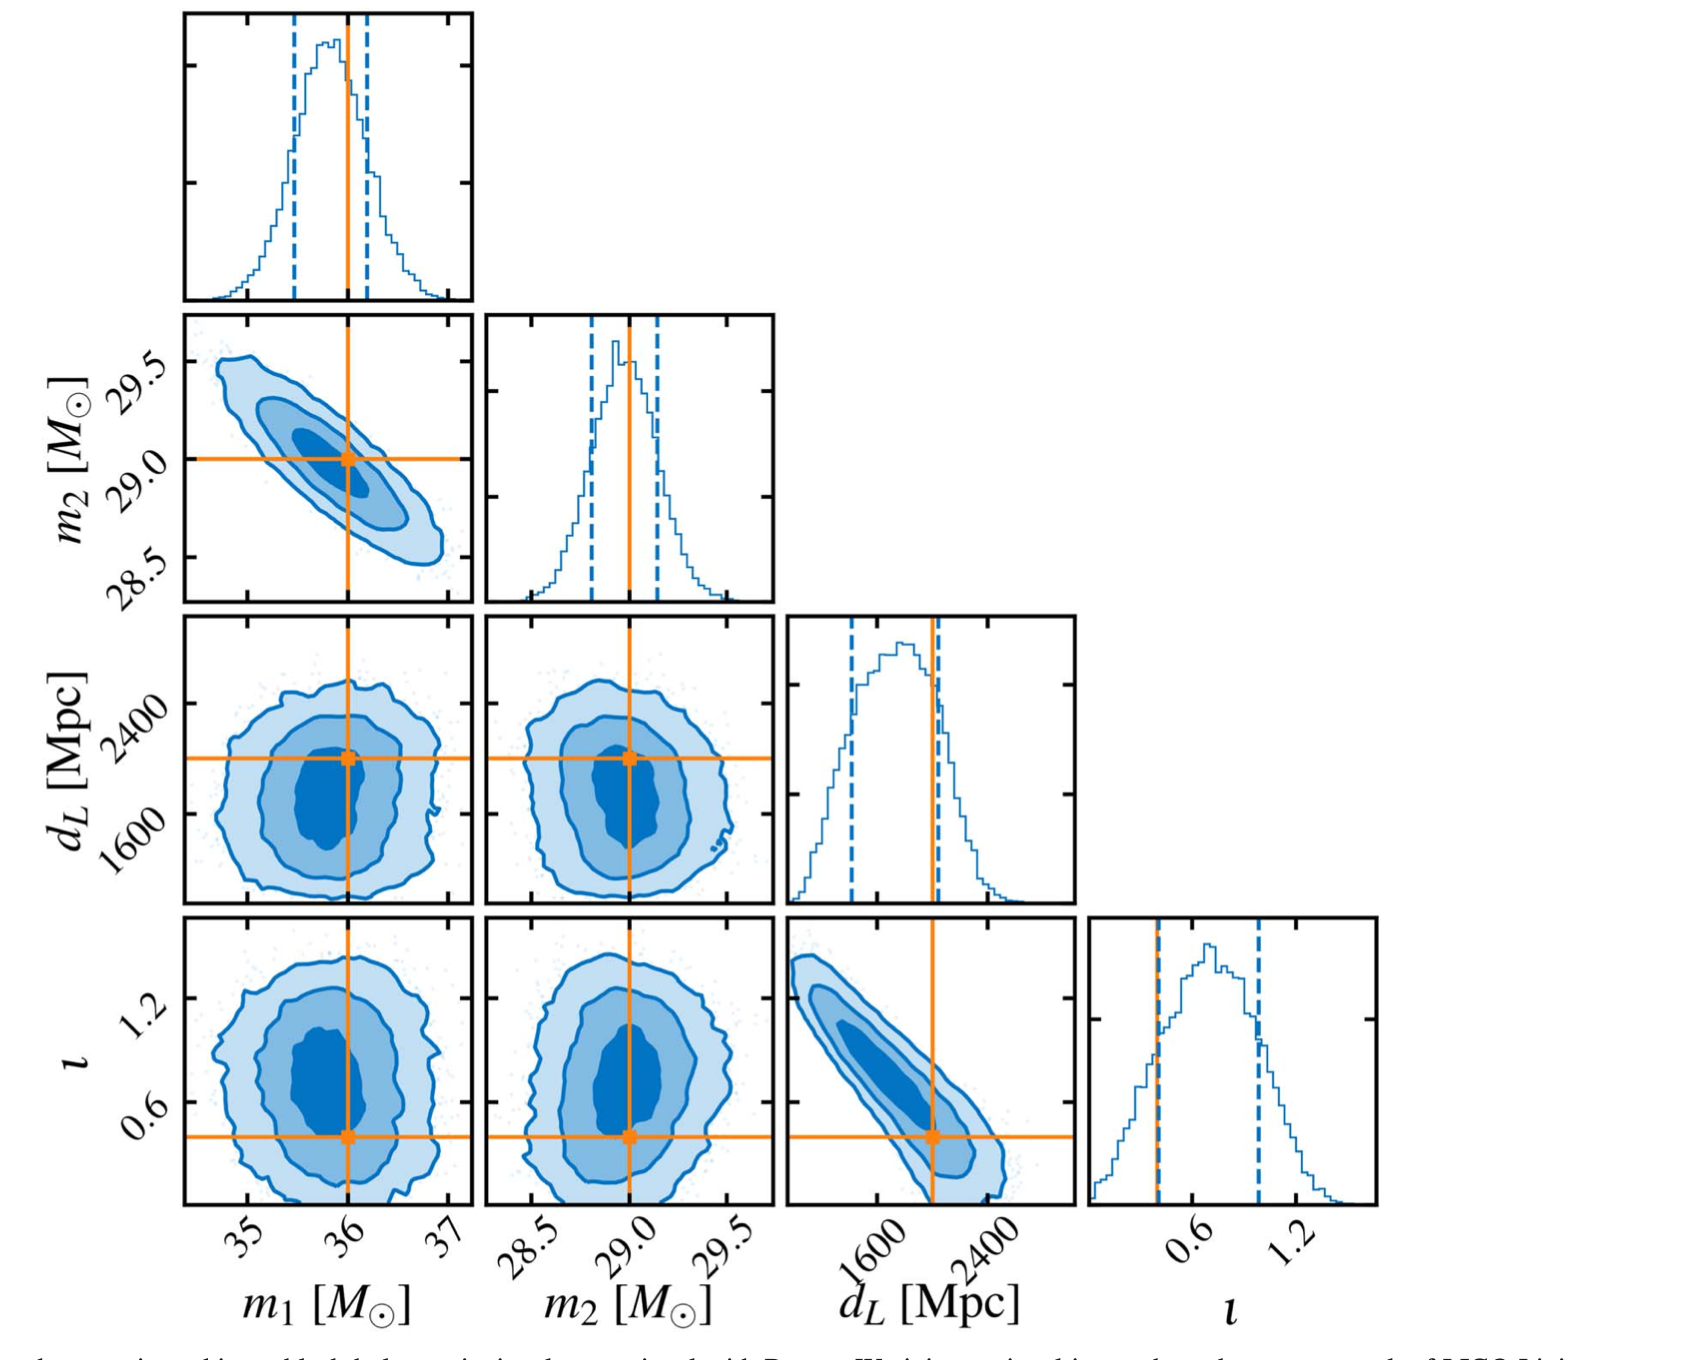

[(Ashton et al 2018)](https://arxiv.org/abs/1811.02042)

## Worked Example <a class="anchor" id="four"></a>

Let's now go through the worked example from
[http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/).

Let's generate some data points and plot them.  We'll try a normal distribution, centered at 0 with 100 data points, using [numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). Our goal is to estimate $\mu$.

Text(0, 0.5, 'data density')

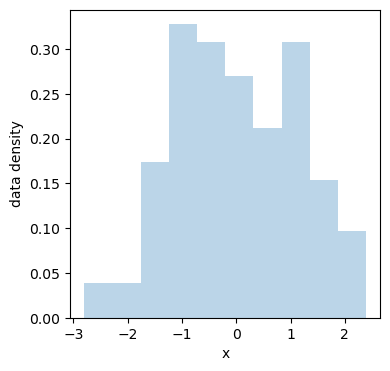

In [4]:
import scipy as sp
import pandas as pd
from scipy.stats import norm

np.random.seed(123)

data = np.random.randn(100)
plt.figure(figsize=(4,4))
plt.hist(data, bins=10, density=True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('data density')

Now we have to pick a model.

- We'll assume a Gaussian likelihood distribution: $\mathscr{N}(\mu,\sigma=1)$ (i.e., with $\sigma=1$).  
- We'll also assume a Gaussian distribution for the prior on $\mu$: $\mathscr{N}(0,1)$.

We can use that to write an analytic function for our posterior distribution as follows (*recalling that the product of two Gaussians is also a Gaussian*): 

$$\mathscr{N}(x \mid \mu_1, \sigma_1) \cdot \mathcal{N}(x \mid \mu_2, \sigma_2) = \frac{1}{\sqrt{2 \pi \sigma_1^2}} \exp \left( -\frac{(x - \mu_1)^2}{2 \sigma_1^2} \right) \cdot \frac{1}{\sqrt{2 \pi \sigma_2^2}} \exp \left( -\frac{(x - \mu_2)^2}{2 \sigma_2^2} \right)$$

$$\exp \left( -\frac{(x - \mu_1)^2}{2 \sigma_1^2} - \frac{(x - \mu_2)^2}{2 \sigma_2^2} \right)$$

$$\mu_{\text{post}} = \frac{\frac{\mu_1}{\sigma_1^2} + \frac{\mu_2}{\sigma_2^2}}{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}$$

$$\sigma_{\text{post}}^2 = \left( \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2} \right)^{-1}$$



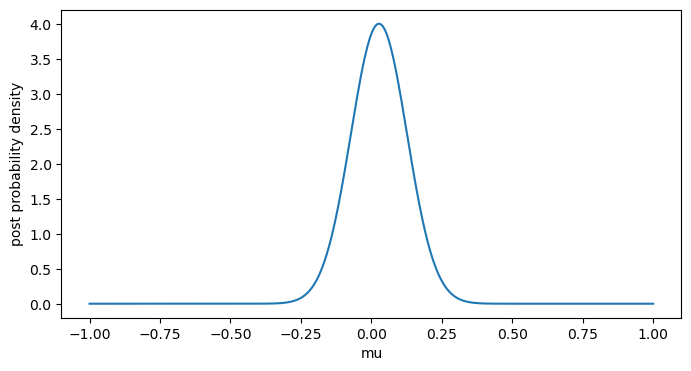

In [5]:
# Execute this cell
def calc_posterior_analytical(data, xgrid, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    
    # Error-weighted sum of prior and average of data
    # Recall the product of 2 Gaussians
    
    # This is the Gaussian for the prior: mu_0 / sigma_0**2
    # This is the Gaussian for the likelihood: data.sum() / sigma**2
    # We are deriving the mean from the sum of the data values
    
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    var_post = (1. / sigma_0**2 + n / sigma**2)**-1
    
    return norm.pdf(xgrid, mu_post, np.sqrt(var_post))

plt.figure(figsize=(8,4))
xgrid = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, xgrid, 0., 1.)
plt.plot(xgrid, posterior_analytical)
plt.xlabel('mu')
plt.ylabel('post probability density')
plt.show()

Let's try this instead with MCMC. 

- We'll start with a trial $\mu_0 = -1$ and evaluate.
- Then we'll jump to a new position using the Metropolis-Hastings algorithm mentioned above.  
- Next we evaluate whether that jump was "good" or not -- by seeing if the value of the likelihood $\times$ prior increases.  

*We always work with the un-normalized posterior (i.e. likelihood $\times$ prior) in these MCMC algorithms (or equivalently the un-normalized log-posterior which equals log-likelihood + log-prior).*

**Note I do not capture the evidence! This won't be good for model selection but it's enough for parameter estimation**

The first function below is an implementation of the Metropolis-Hastings algorithm

In [6]:
## Execute this cell
## See https://github.com/twiecki/WhileMyMCMCGentlySamples/blob/master/content/downloads/notebooks/MCMC-sampling-for-dummies.ipynb
def sampler(data, samples=4, mu_init=.5, proposal_width=0.5, 
            plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        # changing the width of this distribution changes how big the jump is between trials.
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        # Accept if p_accept > 1 (since random limited to [0,1]) and if p_accept > rand as well
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, 
                          mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

## Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, 
                  mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    xgrid = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm.pdf(xgrid,mu_prior_mu, mu_prior_sd)
    ax1.plot(xgrid, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', 
            title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, 
                                                                                       prior_current, 
                                                                                       mu_proposal, 
                                                                                       prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm.pdf(xgrid,loc=mu_proposal, scale=1)
    
    ax2.hist(data,alpha=0.5,density='True')
    ax2.plot(xgrid, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 
                                                                              1e14*likelihood_current, 
                                                                              mu_proposal, 
                                                                              1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, xgrid, 
                                                     mu_prior_mu, 
                                                     mu_prior_sd)
    ax3.plot(xgrid, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, 
                                                  mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, 
                                                   mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, 
                                                                            posterior_current, 
                                                                            mu_proposal, 
                                                                            posterior_proposal)) 
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()

Each row is a single iteration through our Metropolis-Hastings sampler.

- **1st column = prior distribution**. The distribution is static and we are only plugging in our $\mu$ proposals. The vertical lines represent the current $\mu$ in blue and the proposed $\mu$ in either red or green (rejected or accepted, respectively).


- **2nd column = likelihood**.  The likelihood function changes in response to the proposed $\mu$. The blue histogram is the data. The solid line in green or red is the likelihood with the currently proposed mu. The more overlap there is between likelihood and data, the better the model explains the data and the higher the resulting probability will be. The dashed line of the same color is the proposed mu and the dashed blue line is the current mu.


- **3rd column = (normalized) posterior distribution**.


- **4th column = trace** (i.e. the posterior samples of $\mu$ we are generating) where we store each sample irrespective of whether it was accepted or rejected (in which case the line just stays constant).

Note that we always move to relatively more likely $\mu$ values (in terms of their posterior density), but only sometimes to relatively less likely $\mu$ values

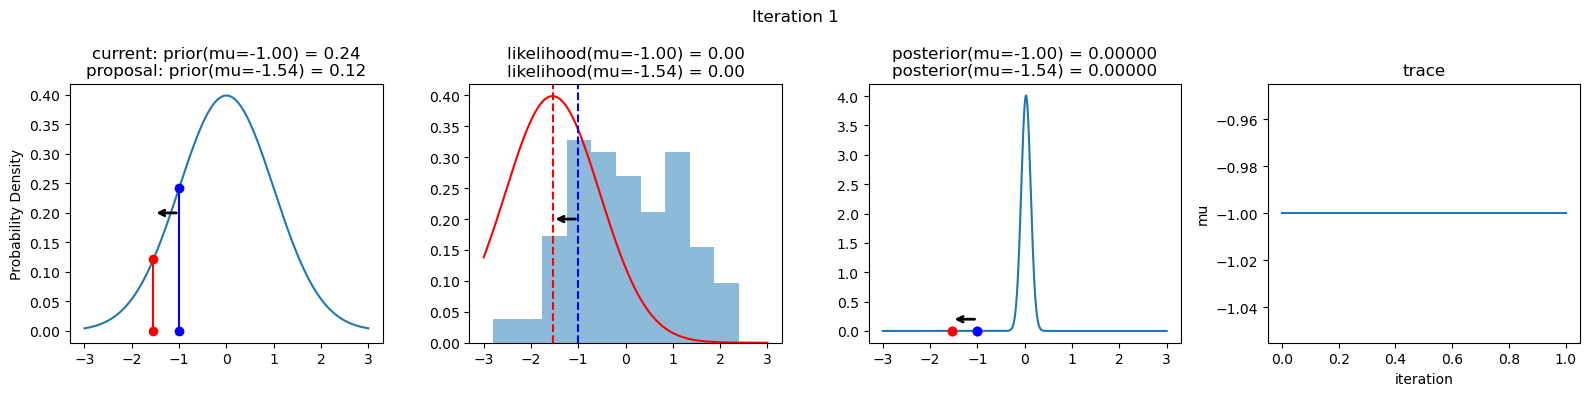

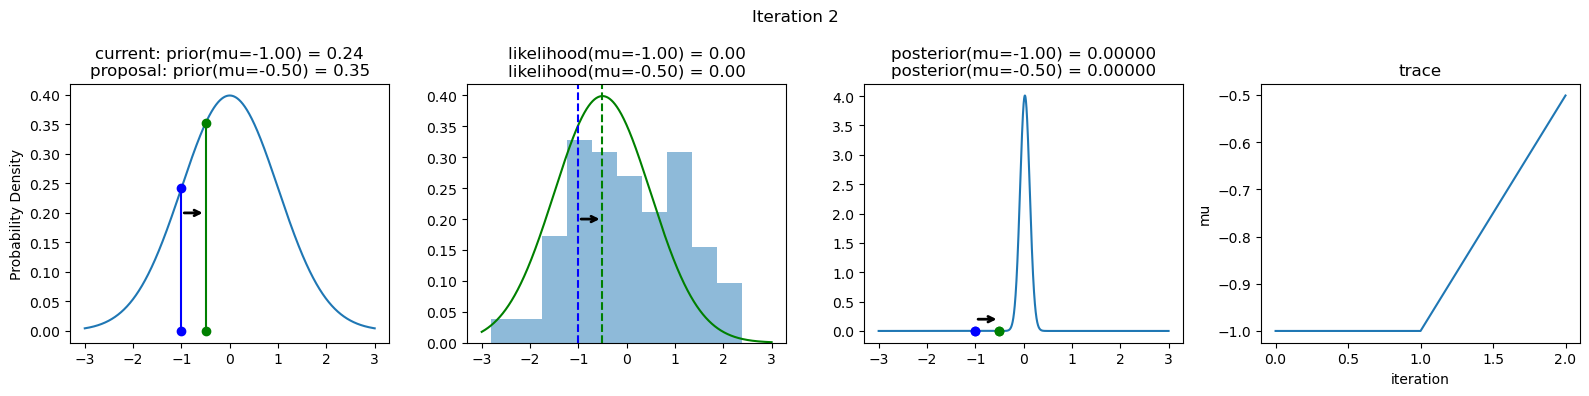

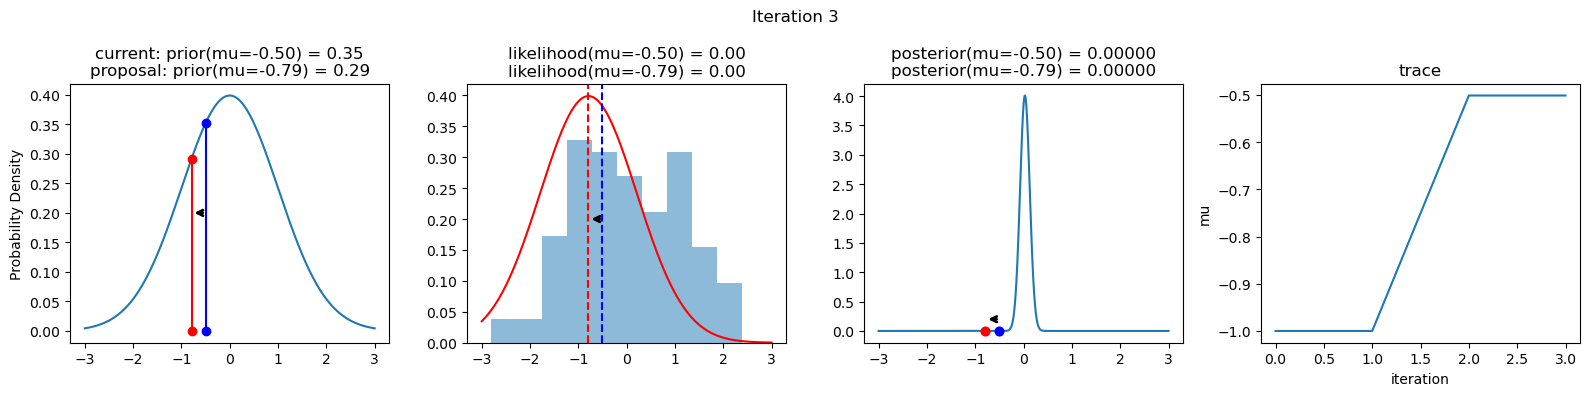

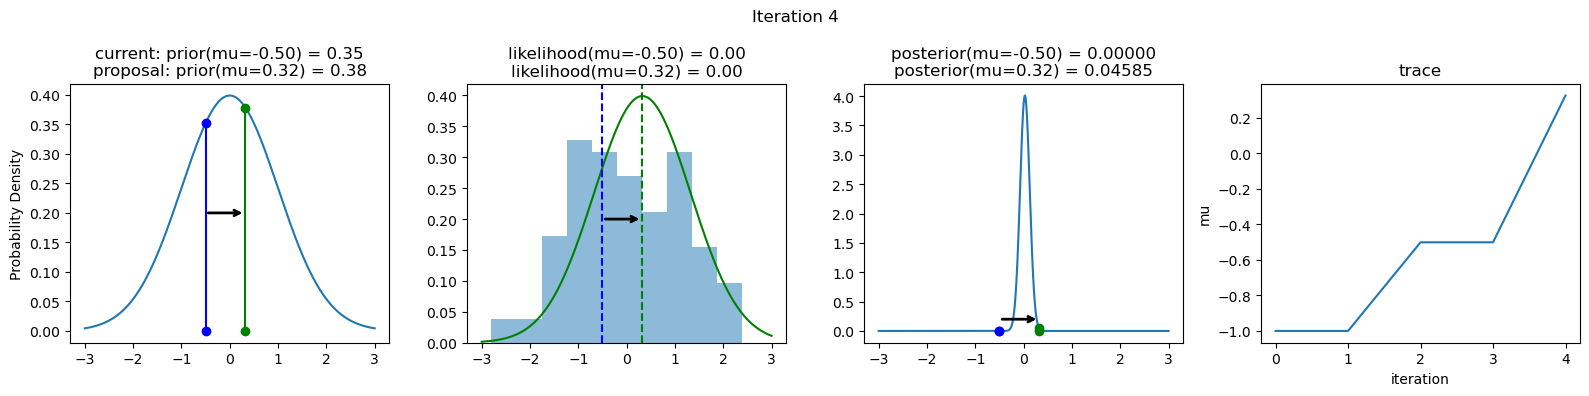

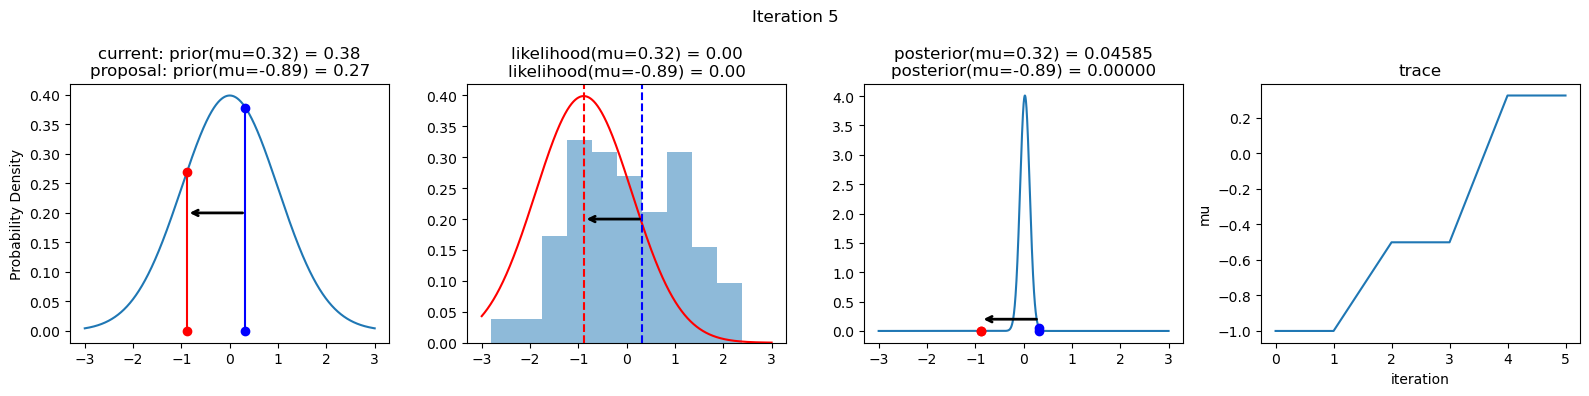

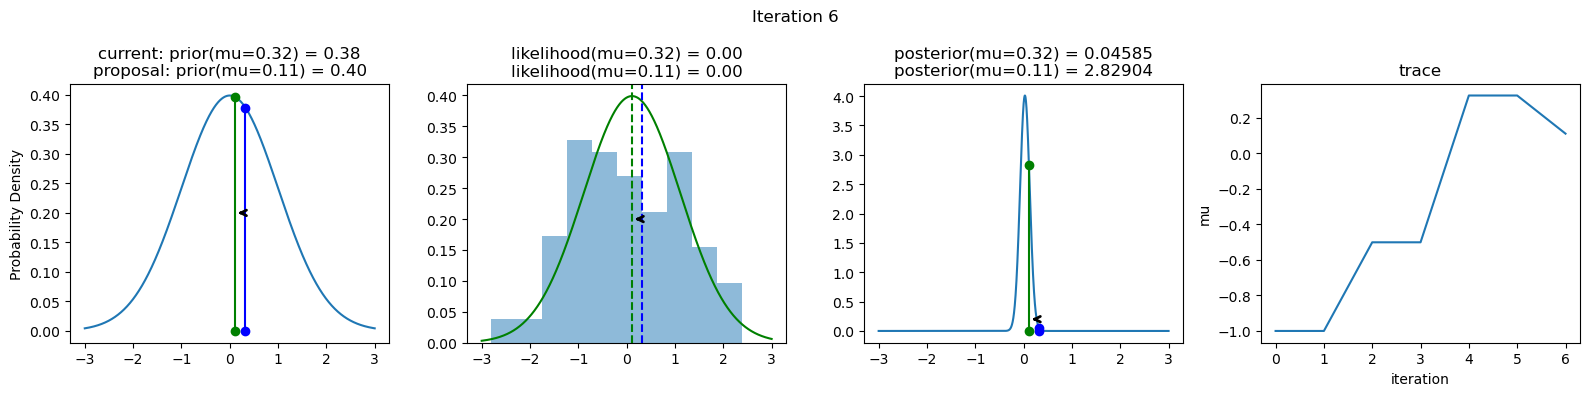

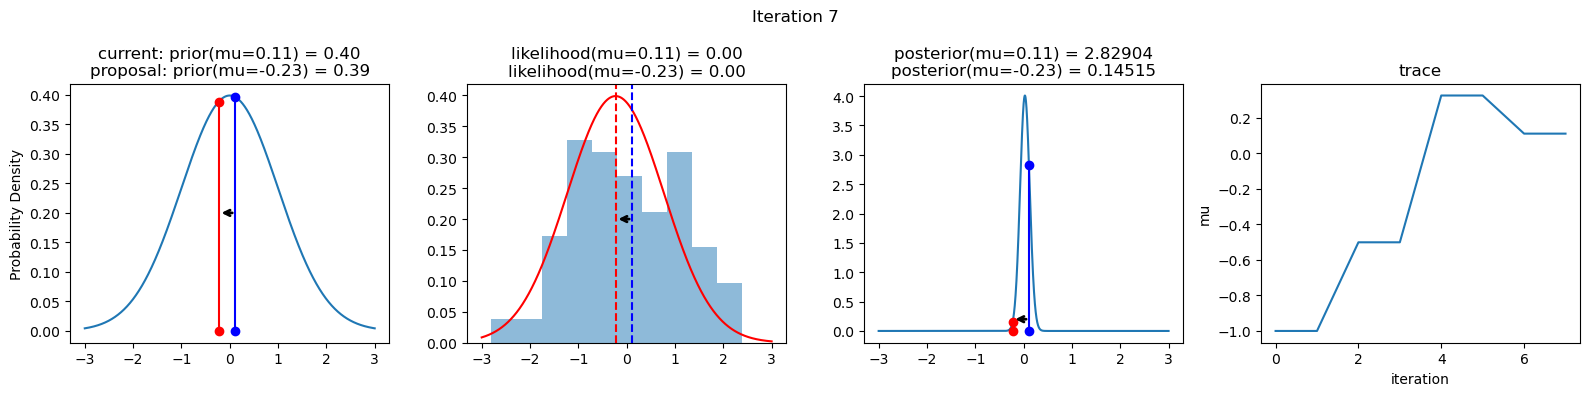

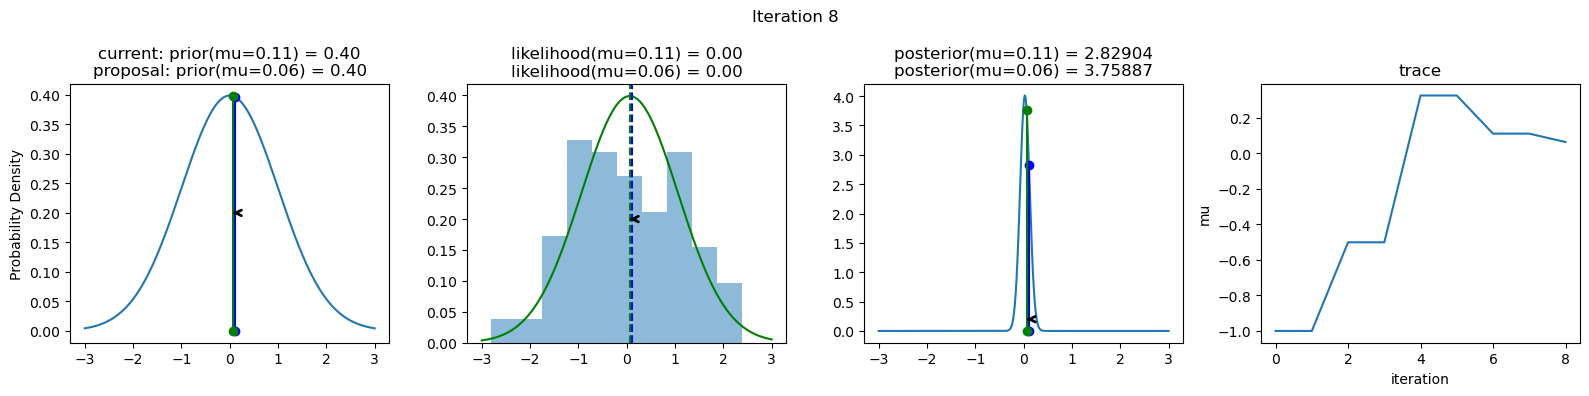

In [7]:
np.random.seed(123)
samples = sampler(data, samples=8, mu_init=-1., plot=True);

What happens when we do this lots of times? You might need to wait for a minute. Consider this a lesson in that running MCMCs can sometimes feel like watching paint dry.

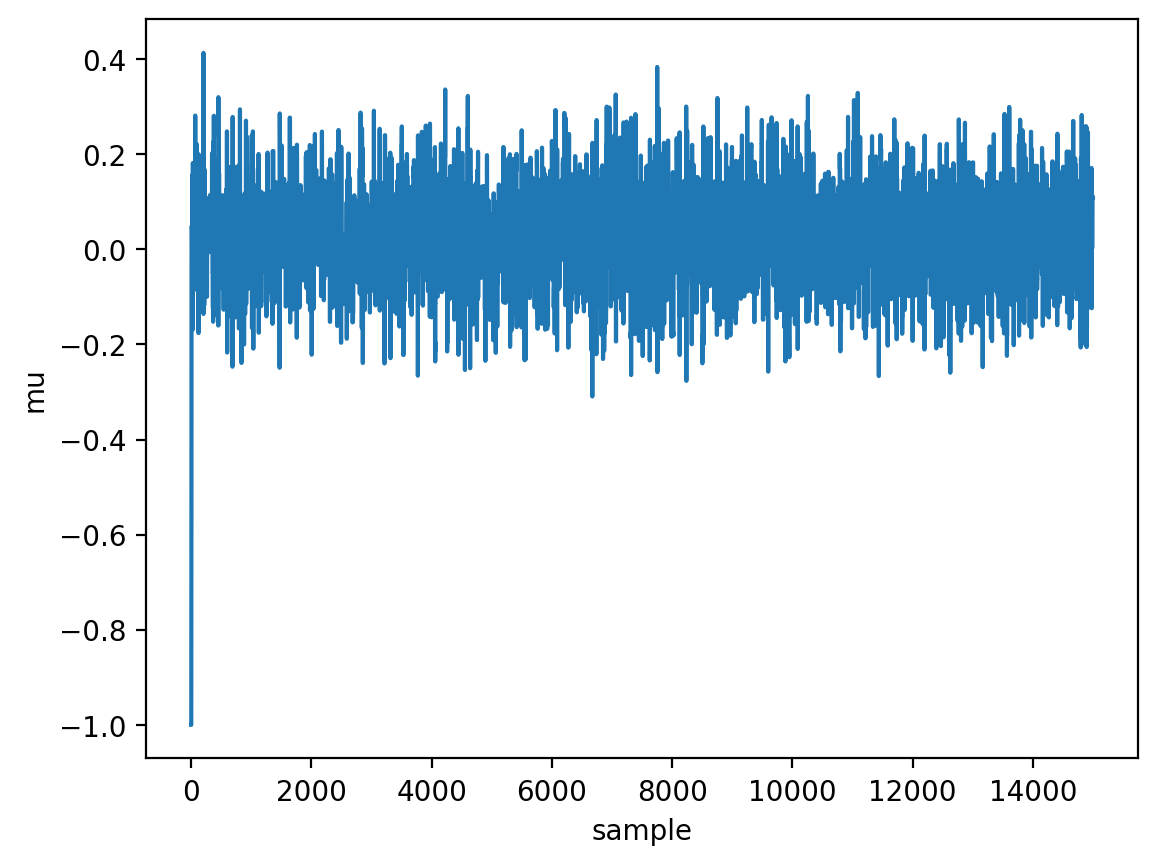

In [9]:
posterior = sampler(data, samples=15000, mu_init=-1.)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

What's happening at the beginning? That depends on our initial proposal, which is bad. One always needs to remove some samples at the beginning. This is called **"burn in"**.

Making a histogram of these results is our estimated posterior probability distribution. Let's remove the first $500$ points as burn-in.

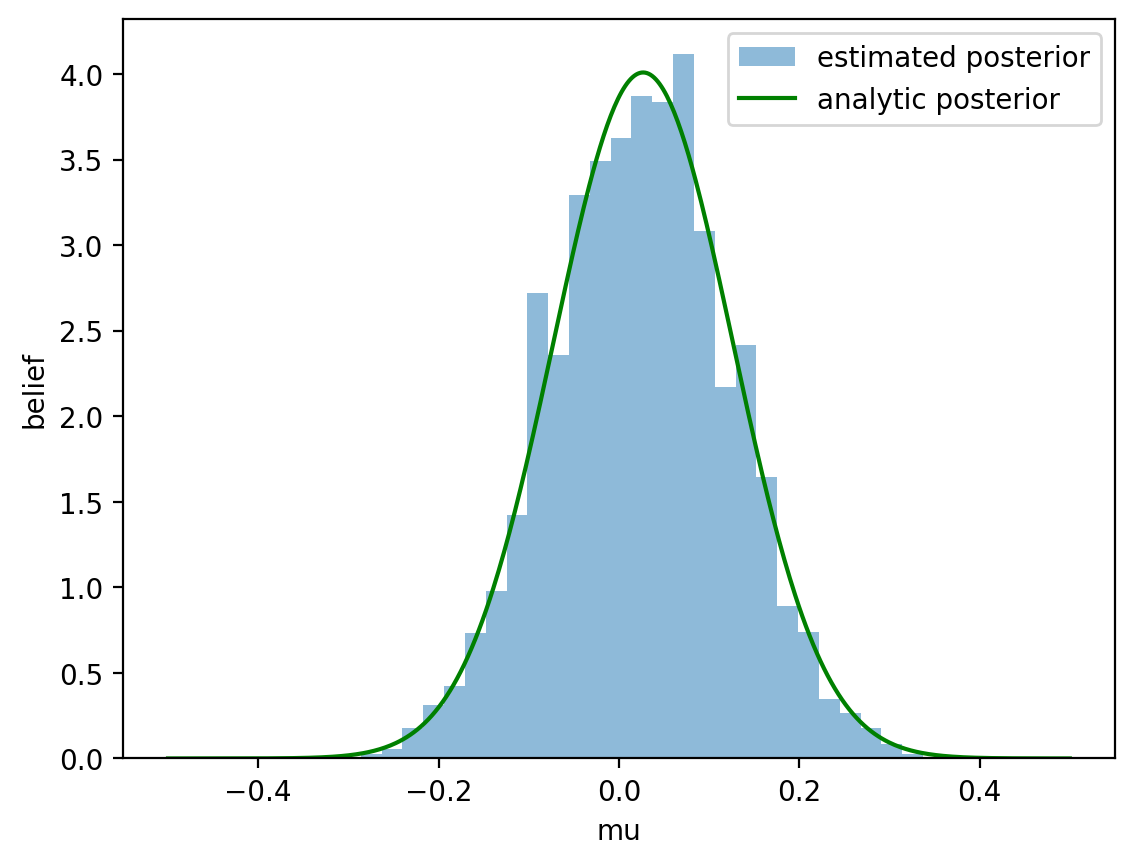

In [10]:
ax = plt.subplot()

burn = 500
ax.hist(posterior[burn:], bins=30, alpha=0.5, 
        density='True', label='estimated posterior')

xplot = np.linspace(-.5, .5, 500)
post = calc_posterior_analytical(data, xplot, 0, 1)
ax.plot(xplot, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');

ax.legend(fontsize=10);

We can compute the expected value of $\mu$, credible regions, and the MAP value.

In [11]:
# expected value
ex_mu = np.mean(posterior[burn:])

# 68% equal-tailed credible region
lower, upper = np.percentile(posterior[burn:],q=16), np.percentile(posterior[burn:],q=84)   

# MAP value
# many samplers output the likelihood x prior, 
# so it's usually than this
hist, bins = np.histogram(posterior[burn:], bins=30)
bin_mid = 0.5 * (bins[1:] + bins[:-1])
idx = np.argsort(hist)[-1]
map_theta = bin_mid[idx]

print('Expected value of mu = ' + str(ex_mu))
print('68% credible region = ' + str(lower) + ' to ' + str(upper))
print('MAP value = ' + str(map_theta))

Expected value of mu = 0.02477082712321101
68% credible region = -0.07723184140078332 to 0.12602577562033476
MAP value = 0.07165543225556759


Our algorithm for deciding where to move next used a normal distribution where the mean was the current value and we assumed a width of 0.5. Let's make this much smaller and much larger and see what it does to the sampling efficiency through the behavior of the traceplot.

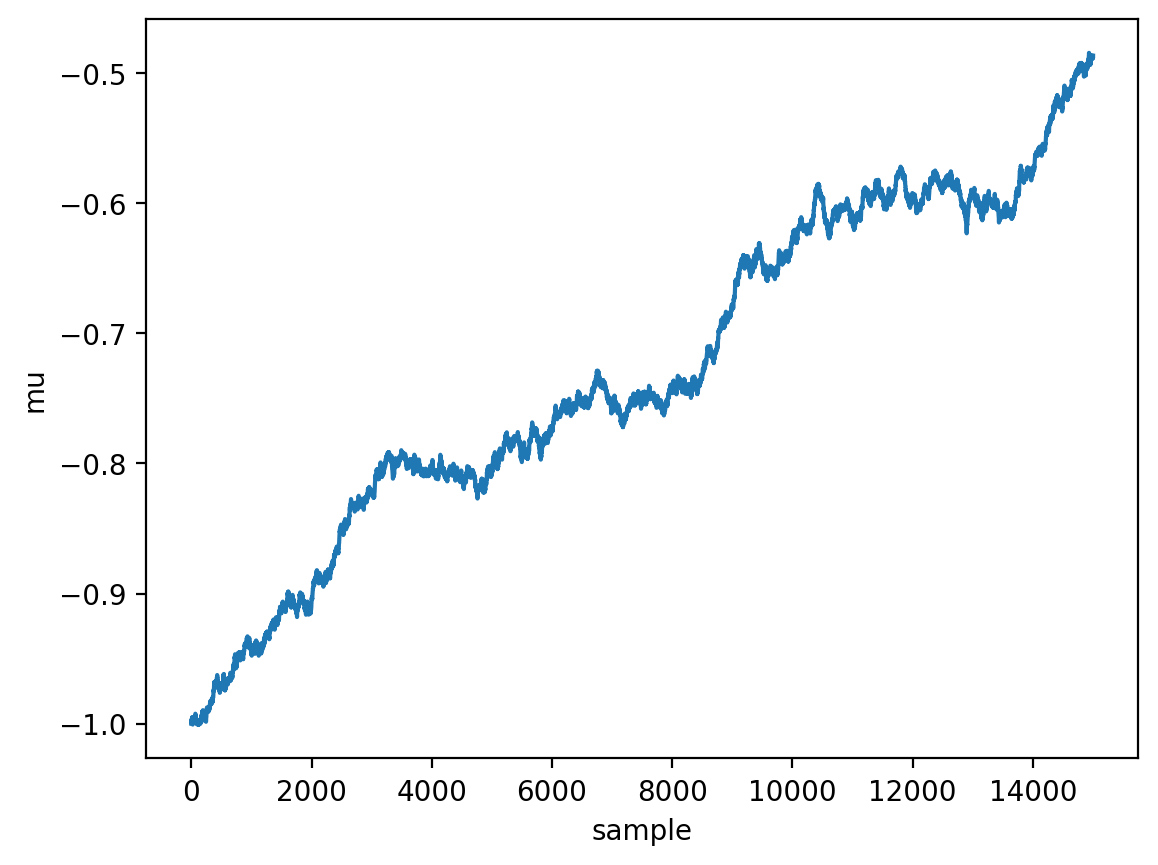

In [12]:
posterior = sampler(data, samples=15000, mu_init=-1., proposal_width=0.001)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

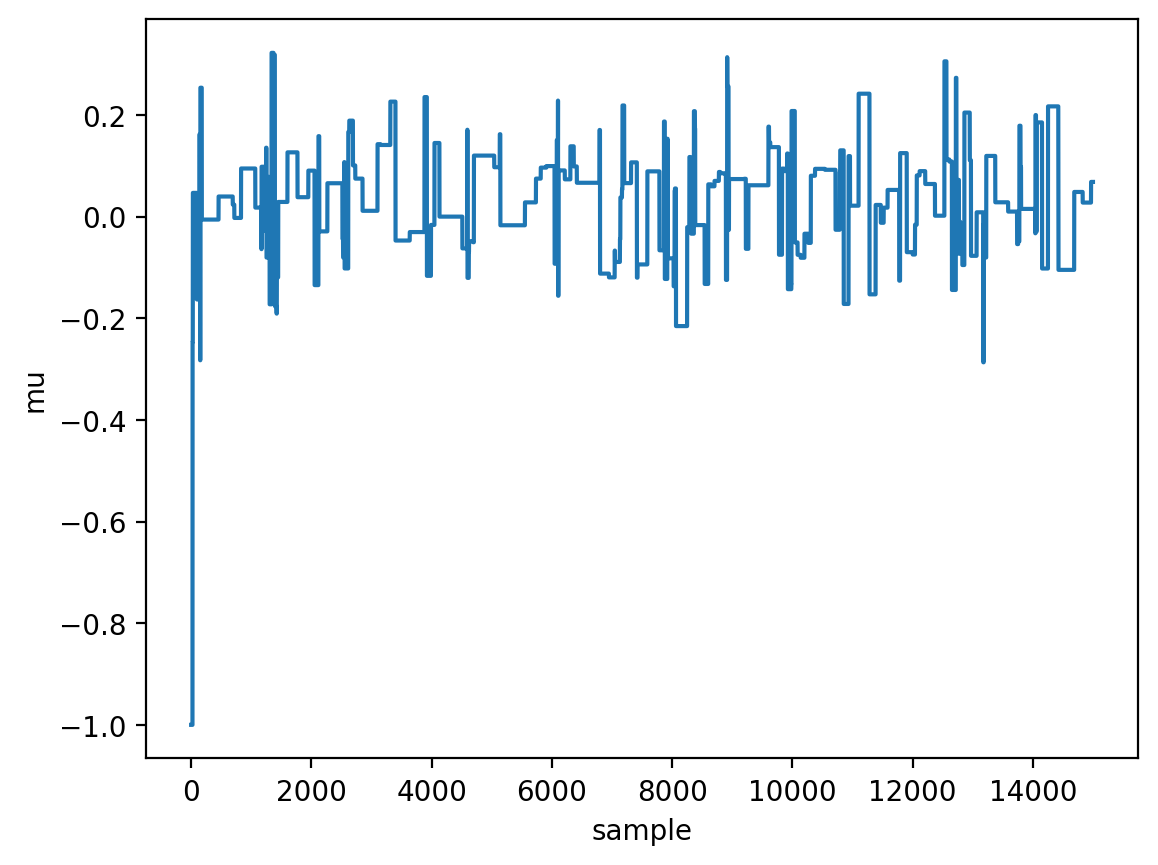

In [13]:
posterior = sampler(data, samples=15000, mu_init=-1., proposal_width=10)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

Ideally, our traceplot in each parameter would be **mixing well** (moving across parameter space without getting stuck), and carving out the same patch of parameter space on average. **The acceptance rate of new samples should be somewhere between $\sim20-50\%$ depending on the type of problem you're trying to solve**.

Take a look at these plots below for an arbitrary problem. The 1st column is the trace, the 2nd is the histogram of the chain, and the 3rd column is the acceptance rate of newly proposed samples. 

- **In the top row, the proposal width was too small**. The chain hardly moves, giving it a high acceptance rate but poor global exploration of the posterior surface.
- **In the middle row, the proposal width was too big**. The chain proposes new points that are far away from regions of high probability density, meaning that they're hardly ever accepted. The chain gets stuck.
- **Only the bottom row shows reasonable sampling. This is the Goldilocks scenario.**

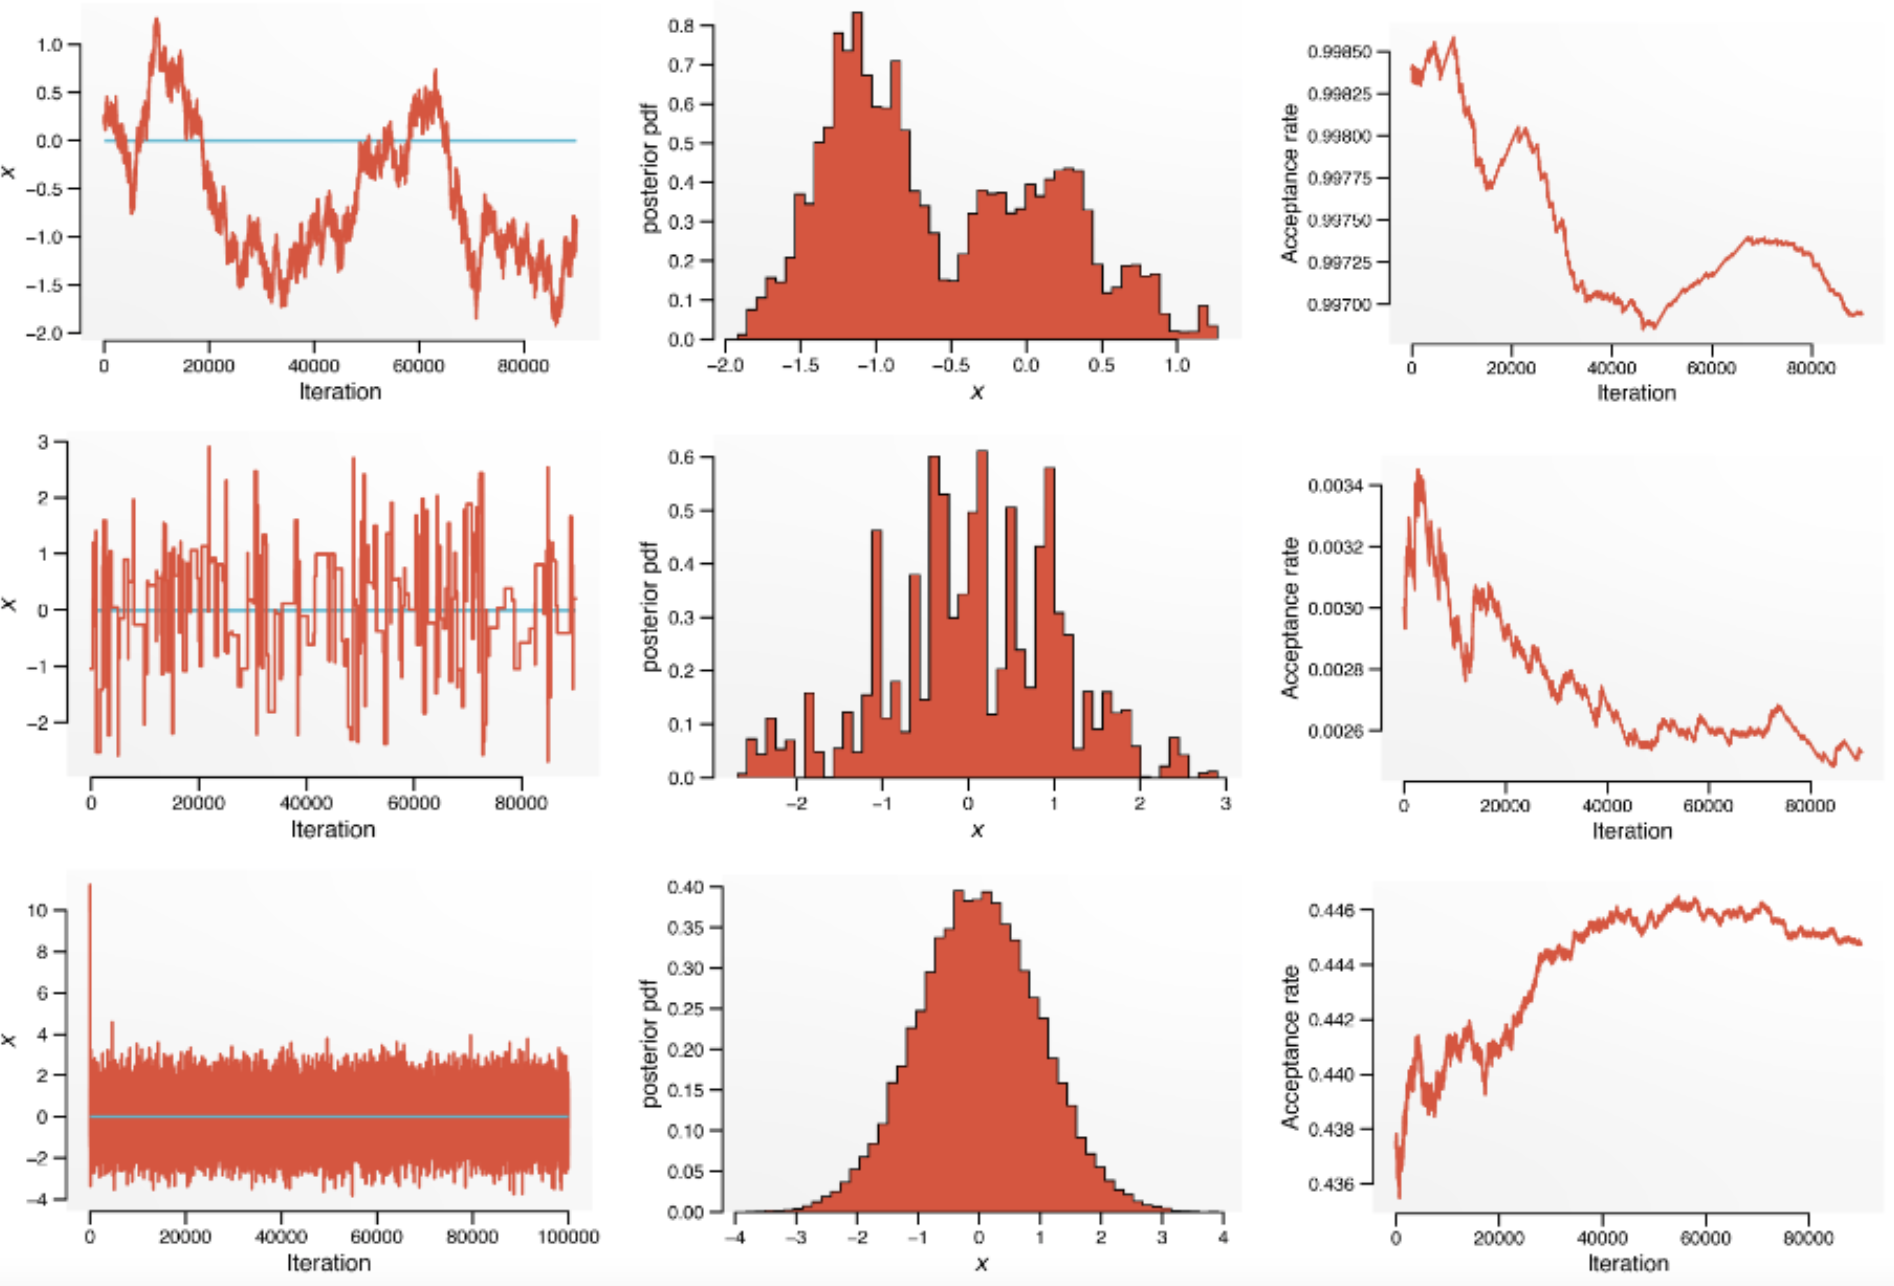

---

## Very important

Note that MCMC does not give you the value of the pdf on a grid: **all you have are the samples!**

Crucially, the **density** of samples is proportional to the posterior. So running a density estimation tool (histogram, KDE, etc) on those returns the  pdf you're looking for.

---

### More Complex Models & Sophisticated Sampling

- The example you worked through above was overkill in that we were only trying to estmate $\mu$. Note also that we can do this in fewer than 10 lines using something like ${\tt emcee}$ or ${\tt pymc}$ (next time!).

- The process is essentially the same when you add more parameters. Check out this [animation of a 2-D process](http://twiecki.github.io/blog/2014/01/02/visualizing-mcmc/) by the same author whose example we just followed.

- Also, check out [this](https://chi-feng.github.io/mcmc-demo/app.html?algorithm=AdaptiveMH&target=multimodal) amazing visualization tool, and have some fun exploring the many different types of sampling algorithms. Metropolis-Hastings is only the start!

- In fact, the most basic type of MH algorithm I would ever personally use is **Adaptive Metropolis-Hastings**, where the proposal width updates itself in response to the currently-estimate covariance matrix of the MCMC chain (i.e. the chain learns how to optimize itself).

- In practice, MH is too simple for current problems. We'll look at other algorithms and samplers next time. There are plenty of tools that a professional astrophysicist can have in their toolbox to tackle research problems.

## Practical MCMC <a class="anchor" id="one"></a>

In [2]:
# Execute this cell
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from scipy import integrate
from scipy.stats import norm
from scipy.stats import cauchy
from astroML.plotting import hist
from astroML.plotting.mcmc import convert_to_stdev
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
from astroML.plotting.mcmc import convert_to_stdev
import warnings; warnings.simplefilter('ignore')

/home/robertoinfurna/anaconda3/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


### Practical MCMC chain checks

1. **CHECK ACCEPTANCE:** some MCMC samplers give an updating estimate of the current acceptance rate of new samples. Ideally for a sampler using some form of Metropolis-Hastings, this should be somewhere between $\sim20-50\%$ depending on the type of problem you're trying to solve.

    - If the acceptance rate is high, the chain is moving but might not be exploring well. This gives high acceptance rate but poor global exploration of the posterior surface.
    
    - If the acceptance rate is low, the chain is hardly moving meaning that it's stuck in a rut or trying to jump to new points that are too far away.
    

2. **CHECK TRACEPLOTS:** After getting an idea of the acceptance rate, make traceplots of your chain. Ideally, our traceplot in each parameter would be mixing well (moving across parameter space without getting stuck), and carving out the same patch of parameter space on average. This will tell you whether your chain is getting stuck or encountering inefficiencies.


3. **CHECK AUTOCORRELATION LENGTH:** The MCMC chain with Metropolis-Hastings will not give fully-independent random samples. The next point is influenced by where the previous point was. We need to check how much to down-sample the chain so that the points lack memory and influence from others. This is given by the ***autocorrelation length***. The operation of selecting samples every other autocorrleation lenght is called ***thinning***.

Check this out: [Roy (2019)](https://arxiv.org/abs/1909.11827)

For a discussion on the mathematical definition of the autocorrelation, I find the [emcee documentation](https://emcee.readthedocs.io/en/stable/tutorials/autocorr/) particularly clear. It is a concise version of [this paper](https://www.semanticscholar.org/paper/Monte-Carlo-Methods-in-Statistical-Mechanics%3A-and-Sokal/0bfe9e3db30605fe2d4d26e1a288a5e2997e7225?p2df).

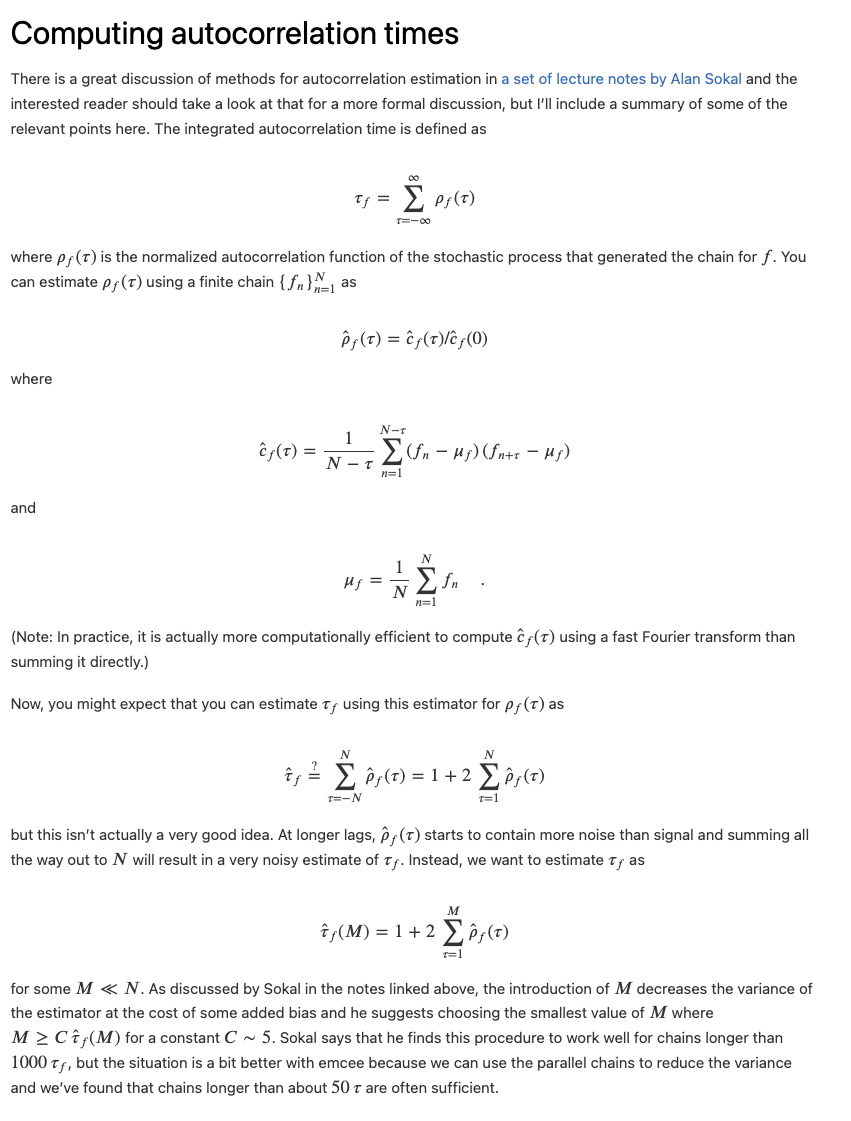

#### Example from my research:

Boschini, Gerosa et al. *"Astrophysical and relativistic modeling of the recoiling black-hole candidate in quasar 3C 186"* [arXiv:2402.08740](https://arxiv.org/abs/2402.08740). 

The goal of that paper was to interpret the physics of a quasar with some strage properties (it has both a spectroscopic and a photometric offset compared to its host galaxy). The MCMC sampling there was particularly challenging and our acceptance rate is indeed very low. But we (think we) understand why, namely that quasar 3C 186 is intrisically a rare object, at least under our uninformative priors. 

### Optimizing sampling

There are several ways of improving the way we propose new sample locations in Metropolis-Hastings. Here are a few.

#### (a) Adaptive Metropolis (AM)

In AM you use the **empirically-estimated parameter covariance matrix to tune the width of the Gaussian proposal  distribution**. Tuning is updated during the sampling in order to reach optimal mixing. In practice this  means  that  one  uses  the  entire  past  history  of  the  chain  up  until  the  current point to estimate the parameter covariance matrix, scaling this covariance matrix by $\alpha= 2.38^2/N_\mathrm{param}$ to reach the optimal $\sim25\%$ proposal acceptance rate. 

Practically speaking, the procedure is
- Estimate the $N_\mathrm{param}\times N_\mathrm{param}$ parameter covariance matrix, $C$, using all samples. Standard numpy or scipy algorithms can do this. 
- Factorize the matrix using a Cholesky algorithm, such that $C = L L^T$.
- Draw a new proposed point such that $y = x_i + \alpha Lu$, where $x_i$ is the current point, and $u$ is an $N_\mathrm{param}$-dimensional vector of random draws from a zero-mean unit-variance Gaussian.

*One subtlety here is that by using more than just the most recent point to tune the sampling, our chain is no longer Markovian. This is easily resolved by allowing the chain to pass through a proposal tuning stage using AM, after which the proposal covariance matrix is frozen so that the chain is Markovian then on.*

#### (b) Single Component Adaptive Metropolis (SCAM)

With high-dimensional model parameter spaces, or even target posterior distributions with significant covariances amongst some parameters, the AM method may suffer from low acceptance rates. One method that addresses this is a variant on AM called Single Component Adaptive Metropolis (SCAM).  **This  involves  jumping  along selected eigenvectors (or principal axes) of the parameter covariance matrix**, which is equivalent to jumping in only one uncorrelated parameter at a time. (We'll see more of principal axes later in the course)

- We take our parameter covariance matrix as in AM, but this time work out the eigenvalues and eigenvectors, $C = D\Lambda D^T$, where $D$ is a unitary matrix with eigenvectors as columns, and $\Lambda = \mathrm{diag}(\sigma^2_\Lambda$) is a diagonal matrix of eigenvalues. 
- A SCAM jump corresponds to a zero-mean unit-variance jump in a randomly chosen uncorrelated parameter, equivalent to jumping along one of the eigenvectors. 
- A proposal draw is given by $y = x_i+ 2.4 D_j u_j$, where $D_j$ is a randomly chosen column of D corresponding to the $j$th eigenvector of $C$, and $u_j \sim \mathcal{N}(0,\sigma^j_\Lambda)$.

#### (c) Differential Evolution (DE)

Another popular proposal scheme is DE, which is a simple *genetic algorithm* that treats the past history of the  chain up until the current point as a population. 

- In DE, you choose two random points from the chain’s history to construct a difference vector along which the chain can jump. 
- A DE proposal draw is given by $y = x_i + \beta(x_{r1} − x_{r2})$, where $x_{r1,2}$ are parameter vectors from two randomly chosen points in the past history of the chain, and $\beta$ is a scaling factor that is usually set to be the same as the AM scaling factor, $\alpha = 2.4^2 / N_\mathrm{param}$.

#### (d) Hamiltonian Monte Carlo (HMC)

These relies on treaing the jumps as physical particles, subject to the Hamilton equations, more [here](https://en.wikipedia.org/wiki/Hamiltonian_Monte_Carlo). Crucially, one needs to know the derivative of the likelihood, and not just the likelihood itself. Sometime this can be hard/expensive to compute


#### The Full Proposal Cocktail

Real world MCMC should use a cocktail of proposal schemes, aimed at ensuring convergence to the target posterior distribution with **minimal burn-in**, **optimal acceptance rate**, and as **short an autocorrelation length** as possible. 

At each MCMC iteration the proposed parameter location can be drawn according to a weighted list of schemes, involving **(i) AM, (ii) SCAM, (iii) DE, (iv) empirical proposal distributions (e.g. from previous analyses), and finally (iv) draws from the parameter prior distribution**. 

The final prior-draw scheme allows for occasional large departures from regions of high likelihood, ensuring that we are exploring the full parameter landscape well, and avoiding the possibility of getting stuck in local maxima. 

Really, you can use any reasonable distribution you like to propose points. Your only constraint is to ensure that detailed balance is maintained through the relevant transition weightings in  the  Metropolis-Hastings ratio, $p_\mathrm{acc}$.

##  MCMC Parameter Estimation In The Wild <a class="anchor" id="two"></a>

Let's look at some more involved examples. We will use two popular python modules: `emcee` and `PyMC`. Another  great but less used sampler is `PTMCMCSampler`. Quoting [Jake VanderPlas]((http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/)) for `emcee` and `PyMC`: 


### emcee

> The emcee package (*also known as MCMC Hammer, which is in the running for best Python package name in history*) is a Pure Python package written by Astronomer Dan Foreman-Mackey. It is a lightweight package which implements a fairly sophisticated Affine-invariant Hamiltonian MCMC. Because the package is pure Python (i.e. it contains no compiled extensions) it is extremely easy to install; with pip, simply type at the command-line "pip install emcee".

Emcee does not have much specific boilerplate code; it simply requires you to pass it a Python function which returns a value proportional to the log-posterior probability, and returns samples from that posterior.

### PyMC

> The PyMC package has many more features than emcee, including built-in support for efficient sampling of common prior distributions. PyMC by default uses the classic Metropolis-Hastings sampler, one of the earliest MCMC algorithms. For performance, it uses compiled fortran libraries, so it is less trivial to install using tools like pip. PyMC binaries for many systems can be quite easily installed with conda.*

More details about PyMC are available from [the pyMC User Guide](https://pymc-devs.github.io/pymc/), but note that we are going to be using [PyMC3](https://docs.pymc.io/).

### PTMCMCSampler

> This is a bare-bones sampler, requiring only that the user provide a log-likelihood function and a log-prior function. The user can change the relative amounts of AM, SCAM, and DE being used to propose new points to jump to. The great thing about this sampler is that one can add new custom proposal schemes according to the user's preference. 

> Also, this sampler implements **parallel tempering MCMC (PTMCMC)**. We won't go into detail about this, but suffice it to say that multiple copies of the MCMC are run in parallel, where the copies actually sample from different roots of the likelihood. The higher roots we take, the more the likelihood is flattened out, making it easier to sample. These "rooted" chains then communicate back to the main chain, improving exploration of the parameter space. All these chains can actually be post-processed to get the Bayesian evidence too, in a scheme called **thermodynamic integration**.

##  MCMC with emcee <a class="anchor" id="three"></a>

Import `emcee` and generate some homoescedastic Gaussian data. We'll assume the standard deviation is know, so we're only estimating $\mu$.

In [3]:
import emcee

np.random.seed(21)
Ndata = 100
mu = 1.0
sigma = 0.5 # assumed known 
data = stats.norm(mu, sigma).rvs(Ndata)

Define all the relevant functions.

In [5]:
def Likelihood(x, sigma, data):
    # Gaussian likelihood 
    return np.prod(np.exp(-(data-x)**2 /2 /sigma**2))

def Prior(x):
    return 1.0 / 10   # flat: it cancels out and has no effect 

def myPosterior(x, sigma, data):
    return Likelihood(x, sigma, data) * Prior(x)

# emcee wants ln of posterior pdf
def myLogPosterior(x, sigma, data):
    return np.log(myPosterior(x, sigma, data))

`emcee` combines multiple "walkers", each of which is its own MCMC chain. The number of trace results will be nwalkers $\times$ nsteps.

In [7]:
ndim = 1  # number of parameters in the model
nwalkers = 6  # number of MCMC walkers
burn = 10000  # "burn-in" period to let chains stabilize
nsteps = 100000  # number of MCMC steps to take **for each walker**

# initialize theta 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

# the function call where all the work happens: 
sampler = emcee.EnsembleSampler(nwalkers, ndim, myLogPosterior, args=[sigma, data])
sampler.run_mcmc(starting_guesses, nsteps)
 
# sampler.chain is of shape (nwalkers, nsteps, ndim)
# throw-out the burn-in points and reshape:
emcee_trace  = sampler.chain[:, burn:, :].reshape(-1, ndim)

print("done")

done


In [8]:
print(sampler.chain.shape) #original chain structure
print(emcee_trace.shape) #burned and flattened chain

(6, 100000, 1)
(540000, 1)


In [9]:
# Now take one point every autocorrelation lenght
tau = sampler.get_autocorr_time()
print(tau)
thin = int(tau+1)

[29.6318388]


In [13]:
# take the six chains, burn the initial points, thin them (1 point every autocorrelation length), and flatten
emcee_trace = sampler.get_chain(discard=burn, thin=thin, flat=True).flatten()

In [14]:
len(emcee_trace)

18000

Text(0.5, 1.0, 'Chain from emcee')

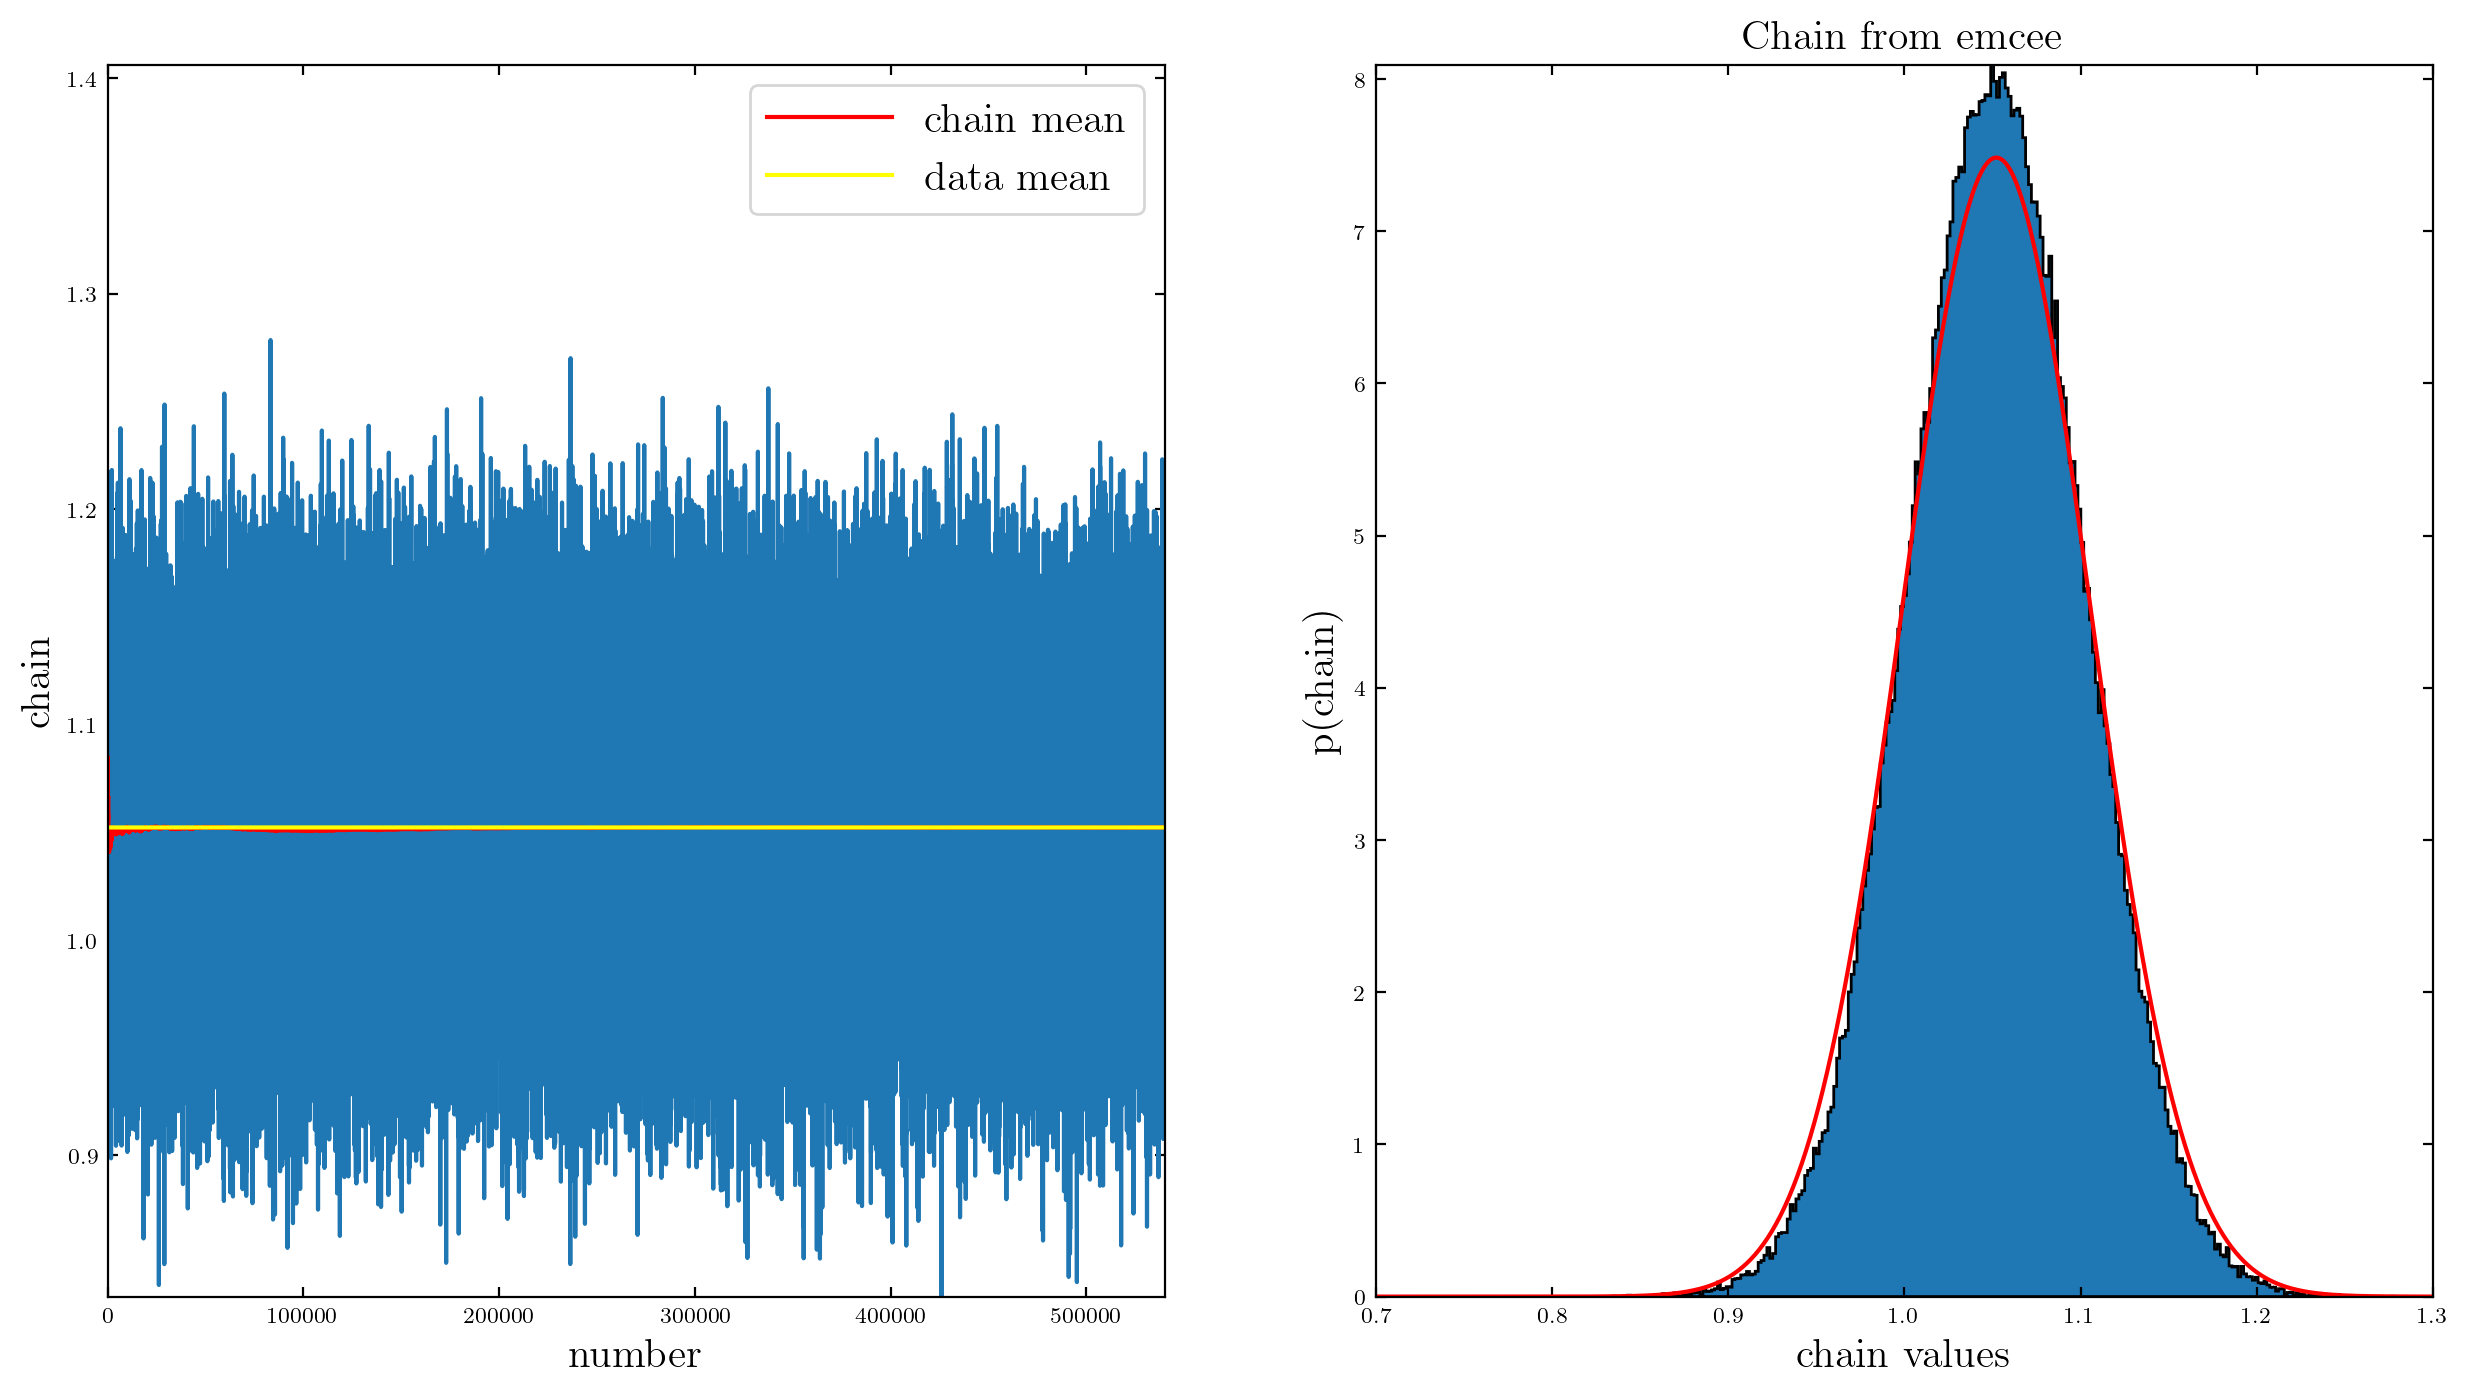

In [10]:
# plot 
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(15, 8))
#fig.subplots_adjust(left=0.11, right=0.95, 
                   # wspace=0.35, bottom=0.18)

chainE = emcee_trace #[0]
M = np.size(chainE)

ax1 = fig.add_subplot(121)
xgrid = np.linspace(1, M, M)
plt.plot(xgrid, chainE)
ax1.axis([0, M, np.min(chainE), 1.1*np.max(chainE)])
plt.xlabel('number',fontsize=15)
plt.ylabel('chain',fontsize=15)

# plot running mean: 
meanC = [np.mean(chainE[:int(N)]) for N in xgrid]
ax1.plot(xgrid, meanC, c='red', label='chain mean') 
ax1.plot(xgrid, 0*xgrid + np.mean(data),
         c='yellow',label='data mean')
ax1.legend(fontsize=15)

ax2 = fig.add_subplot(122)
# skip first burn samples
Nburn = 1000
#Nchain = np.size(chainE[xgrid>burn])
Nhist, bins, patches = plt.hist(chainE, 
                                bins='auto', histtype='stepfilled',density=True)

# plot expectations based on central limit theorem
binwidth = bins[1] - bins[0]
muCLT = np.mean(data)
sigCLT = np.std(data)/np.sqrt(Ndata)
muGrid = np.linspace(0.7, 1.3, 500)
gauss = stats.norm(muCLT, sigCLT).pdf(muGrid) 
ax2.plot(muGrid, gauss, c='red') 

ax2.set_ylabel('p(chain)',fontsize=15)
ax2.set_xlabel('chain values',fontsize=15)
#ax2.set_xlim(0.7, 1.3)
#ax2.set_ylim(0, 1.2*np.max(gauss))
ax2.set_title(r'Chain from emcee',fontsize=15)

##  MCMC with PyMC <a class="anchor" id="four"></a>

Now we will use pyMC to get a 2-dimensional posterior pdf for location and scale parameters using a sample drawn from a **Cauchy distribution**. Remember a Cauchy distribution formally has no mean or standard deviation because its tails fall off shallower than $1/x^2$.

The following is code adapted from Figure 5.22 of the textbook. Initially, we load in `PyMC` and define the Cauchy log likelihood. 

***NOTE:*** The code here for the Cauchy likelihood is actually only for when we look at the analytic estimate, since `PyMC` has ready-made modules for many standard functions!

In [11]:
from scipy.stats import cauchy
import pymc as pm

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

def cauchy_logL(xi, sigma, mu):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return ((n - 1) * np.log(sigma)
            - np.sum(np.log(sigma ** 2 + (xi - mu) ** 2), 0))
    

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Generate some data from the Cauchy distribution.

In [12]:
# ----------------------------------------------------------------------
# Draw the sample from a Cauchy distribution
np.random.seed(44)
mu_0 = 0
gamma_0 = 2
xi = cauchy(mu_0, gamma_0).rvs(10)

Set up the `PyMC` model.

In [13]:
# ----------------------------------------------------------------------
# Set up and run MCMC:
with pm.Model():
    mu = pm.Uniform('mu', -5, 5) #uniform in Cauchy mu
    log_gamma = pm.Uniform('log_gamma', -10, 10) #uniform in log of Cauchy gamma

    # set up our observed variable x
    # i.e. read this as 'x is distributed as a Cauchy variable'
    x = pm.Cauchy('x', mu, np.exp(log_gamma), observed=xi)

    trace = pm.sample(draws=12000, tune=1000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, log_gamma]


Output()

Output()

Sampling 2 chains for 1_000 tune and 12_000 draw iterations (2_000 + 24_000 draws total) took 6 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


You may have seen some output messages along the lines of "Auto-assigning NUTS sampler...". `PyMC` is very sophisticated, and will automatically decide for you the best tools for the job. 

In this case, it decided you needed **No-U-Turn Hamiltonian gradient-based sampling**, where gradient information about the Cauchy likelihood helped in the exploration of parameter space. 

In [14]:
mu = np.array(trace['posterior']['mu']).flatten()
loggamma = np.array(trace['posterior']['log_gamma']).flatten()


# compute histogram of results to plot below
L_MCMC, mu_bins, gamma_bins = np.histogram2d(mu,
                                             np.exp(loggamma),
                                             bins=(np.linspace(-5, 5, 41),
                                                   np.linspace(0, 5, 41)))
L_MCMC[L_MCMC == 0] = 1E-16  # prevents zero-division errors

# ----------------------------------------------------------------------
# Compute likelihood analytically for comparison
mu = np.linspace(-5, 5, 70)
gamma = np.linspace(0.1, 5, 70)
logL = cauchy_logL(xi, gamma[:, np.newaxis], mu)
logL -= logL.max()

p_mu = np.exp(logL).sum(0)
p_mu /= p_mu.sum() * (mu[1] - mu[0])

p_gamma = np.exp(logL).sum(1)
p_gamma /= p_gamma.sum() * (gamma[1] - gamma[0])

hist_mu, bins_mu = np.histogram(mu, bins=mu_bins, density=True)
hist_gamma, bins_gamma = np.histogram(np.exp(loggamma),
                                      bins=gamma_bins, density=True)

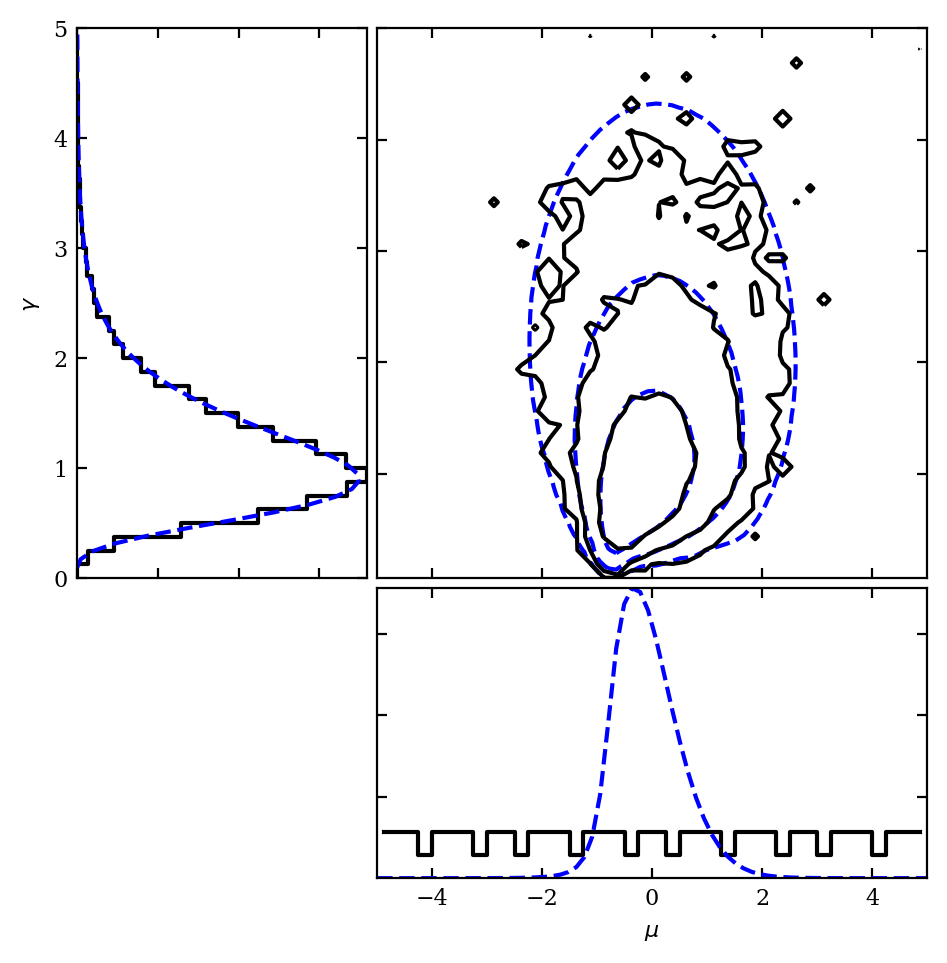

In [15]:
# ----------------------------------------------------------------------
# plot all the results
fig = plt.figure(figsize=(5, 5))

# first axis: likelihood contours
ax1 = fig.add_axes((0.4, 0.4, 0.55, 0.55))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_formatter(plt.NullFormatter())

ax1.contour(mu, gamma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='b', linestyles='dashed')

ax1.contour(0.5 * (mu_bins[:-1] + mu_bins[1:]),
            0.5 * (gamma_bins[:-1] + gamma_bins[1:]),
            convert_to_stdev(np.log(L_MCMC.T)),
            levels=(0.683, 0.955, 0.997),
            colors='k')

# second axis: marginalized over mu
ax2 = fig.add_axes((0.1, 0.4, 0.29, 0.55))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.plot(hist_gamma, 0.5 * (bins_gamma[1:] + bins_gamma[:-1]
                            - bins_gamma[1] + bins_gamma[0]),
         '-k', drawstyle='steps')
ax2.plot(p_gamma, gamma, '--b')
ax2.set_ylabel(r'$\gamma$')
ax2.set_ylim(0, 5)

# third axis: marginalized over gamma
ax3 = fig.add_axes((0.4, 0.1, 0.55, 0.29))
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.plot(0.5 * (bins_mu[1:] + bins_mu[:-1]), hist_mu,
         '-k', drawstyle='steps-mid')
ax3.plot(mu, p_mu, '--b')
ax3.set_xlabel(r'$\mu$')
plt.xlim(-5, 5)

plt.show()

The resulting $2$D joint posterior pdf corner plot shows analytic results as blue dashed lines, and MCMC sampling results as black contours.

## Gibbs Sampling <a class="anchor" id="one"></a>

**Gibbs sampling** is an MCMC method that avoids acceptance-rejection techniques. Instead, one sweeps through each parameter (or block of parameters) to draw from their ***conditional probability distributions***, with all other parameters fixed to their current values. 

After sampling for a sufficiently large number of Gibbs steps, the principles of MCMC guarantee that **this process of sequential conditional probability drawing will converge to the joint posterior distribution of the overall model parameter space**. A standard Gibbs algorithm is shown below.

---
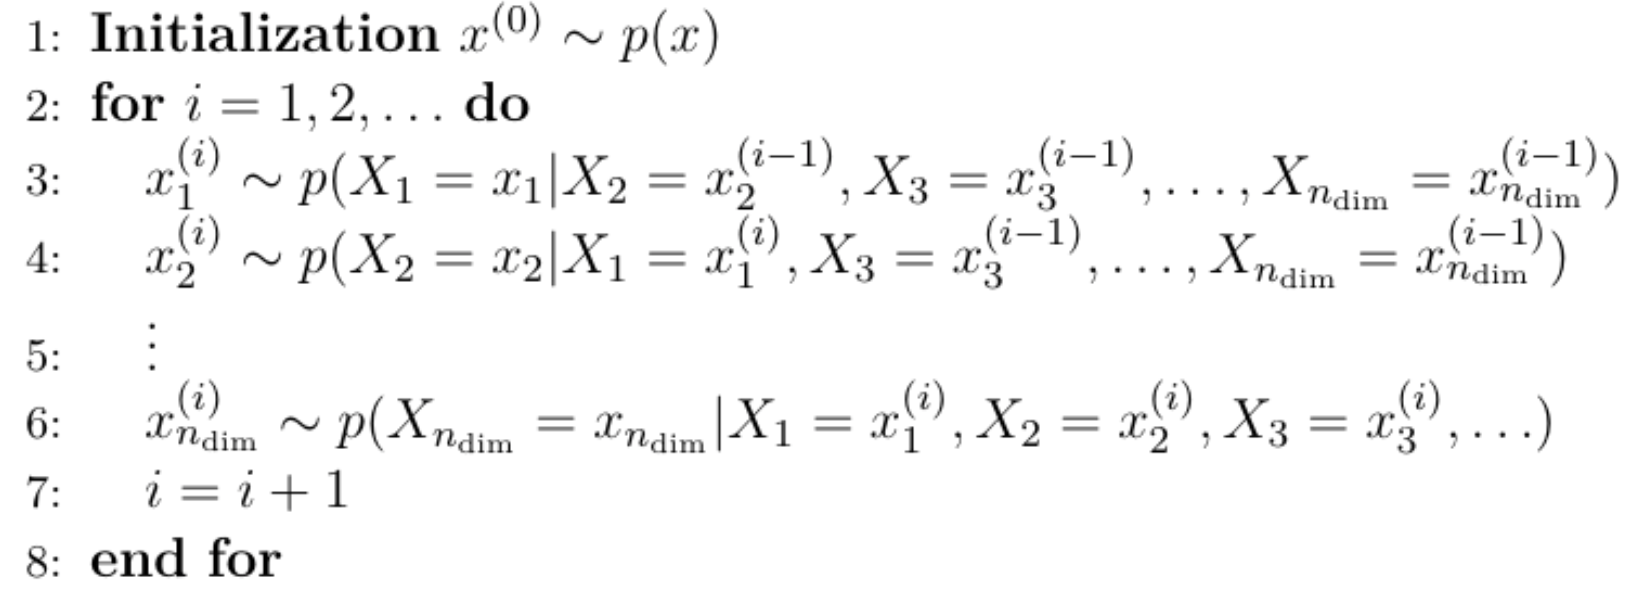

---

To break this algorithm up into words, we

- We initialize the sampler at some random point in parameter space.


- Fix all parameters except the first one. Draw a random value from the conditional posterior probability distribution of this first parameter **given** the fixed values of all other parameters.


- Fix all parameters except the second one. Draw a random value from the conditional posterior probability distribution of this second parameter **given** the fixed values of all other parameters **and the updated value of the first parameter**.


- *et cetera* for all parameters.


- Repeat for many Gibbs steps.



### Benefits of Gibbs Sampling <a class="anchor" id="onea"></a>

- By drawing directly from the posterior conditionals, the **auto-correlation length can be exceptionally small**, with **minimal burn-in**. 
- **It's also fast**; sequential draws directly from the parameter posterior conditionals means that we are not rejecting any points. 

### Drawbacks of Gibbs Sampling <a class="anchor" id="oneb"></a>

- You need to know the form of the conditional probability distributions for each parameter (or parameter blocks), and how to draw samples from it. 
- This can be a non-trivial problem, so typically a lot of effort is placed in manipulating the form of the posterior to find a conditional that is a standard probability distribution. This is where **conjugate priors** become really handy. 

### Conjugate Priors (Again) <a class="anchor" id="onec"></a>

> *These are parameter priors for which the the posterior lies in the same family of distributions as the prior.* 

***EXAMPLE***

- Imagine we have a Gaussian likelihood function with mean $\mu$ and variance $\sigma^2$ parameters. 
- The conjugate prior on $\mu$ when $\sigma^2$ is known (as is assumed in Gibbs when sweeping through each parameter) is a Gaussian distribution.
- Thus the conditional posterior distribution on $\mu$ is simply a Gaussian. 
- Similarly, the conjugate prior on $\sigma^2$ when $\mu$ is known an inverse gamma distribution.
- Thus the conditional posterior distribution on $\sigma^2$ is an inverse gamma distribution.


Let's look at a speciifc example. We're going to analyze a homoescedastic Gaussian dataset. This is something we've done analytically in previous lectures but, crucially, this time search over the mean and standard deviation with MCMCs. I'll repeat a MH sampling first, and then we see how Gibbs sampling performs. 

In [16]:
# Execute this cell
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from scipy import integrate
from scipy.stats import norm
from astroML.plotting import hist
from astroML.plotting.mcmc import convert_to_stdev
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
from astroML.plotting.mcmc import convert_to_stdev
import warnings; warnings.simplefilter('ignore')
import corner
import emcee
import time

In [17]:
np.random.seed(21)
Ndata = 200
mu = 1.0
sigma = 1.0
data = stats.norm(mu, sigma).rvs(Ndata)

#### Metropolis-Hastings Approach

Quick implementation with Metropolis-Hastings, using emcee here

In [18]:
def logLikelihood(x):
    # Gaussian likelihood 
    return np.sum(stats.norm(loc=x[0], scale=x[1]).logpdf(data))

def Prior(x):
    # create a uniform prior in mu and sigma
    prior_mu = stats.uniform.pdf(x[0], loc=0.5, scale=1.0)
    prior_sigma = stats.uniform.pdf(x[1], loc=0.5, scale=1.0)
    return  prior_mu * prior_sigma


def logPosterior(x):
    
    lp =  np.log(Prior(x))
    if not np.isfinite(lp):
        return -np.inf
    else:
        return logLikelihood(x) + lp

###############


ndim = 2  # number of parameters in the model
nwalkers = 5  # number of MCMC walkers
nsteps = 5000  # number of MCMC steps to take **for each walker**

# initialize theta 
np.random.seed(0)
starting_guesses = np.array([1,1])+1e-3*np.random.randn(nwalkers, ndim)

In [19]:
# the function call where all the work happens: 
sampler = emcee.EnsembleSampler(nwalkers, ndim, logPosterior)

elapsed=time.time()
sampler.run_mcmc(starting_guesses, nsteps)
print(time.time()-elapsed)

8.319140672683716


In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["mu","sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

In [22]:
flat_samples = sampler.get_chain(discard=100, thin=30, flat=True)
print(flat_samples.shape)

(815, 2)


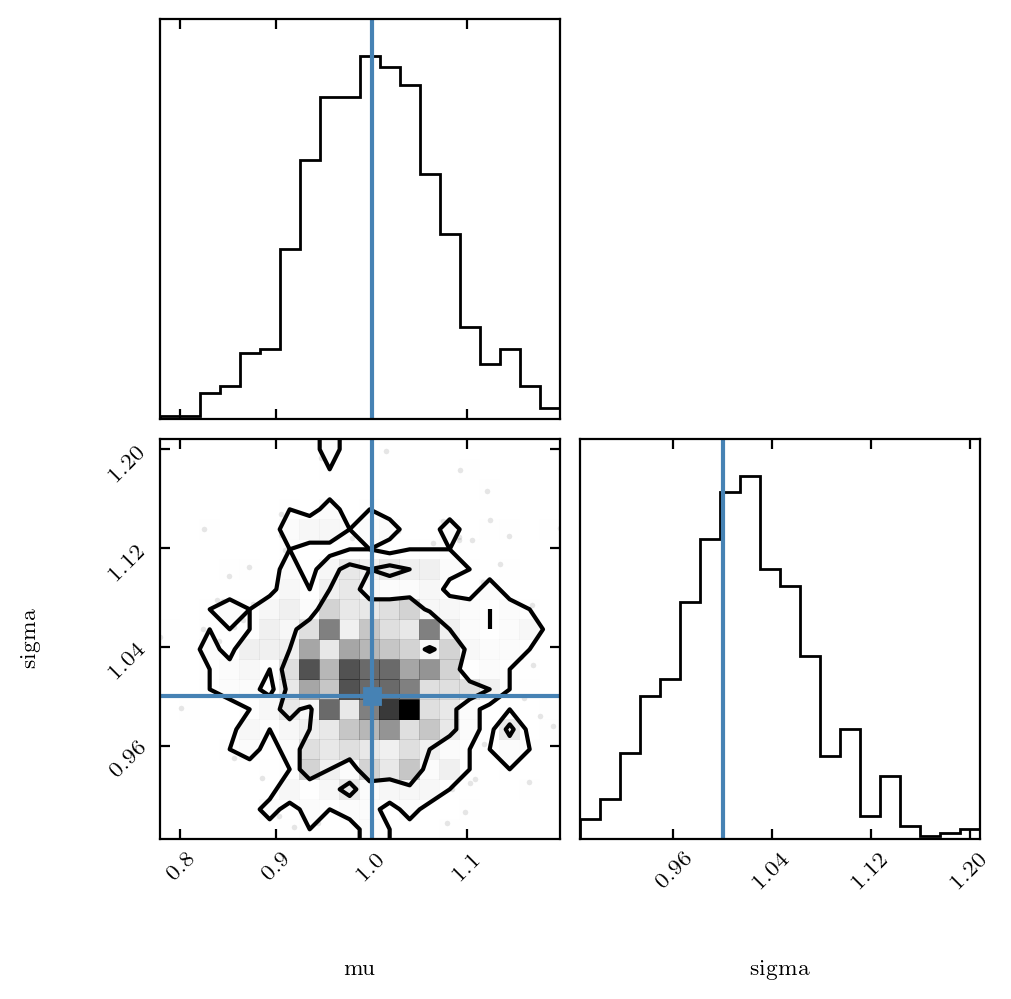

In [23]:
fig = corner.corner(
    flat_samples, labels=labels, levels=[0.68,0.95],truths=[1,1]
);

**On my machine it took about 25 seconds. After burning and thinning, I got $815$ samples**

#### Gibbs Approach

Code for this example is adapted from 
- https://wiseodd.github.io/techblog/2015/10/09/gibbs-sampling/
- https://bookdown.org/rdpeng/advstatcomp/gibbs-sampler.html
- https://www.wikiwand.com/en/Conjugate_prior. 

---

To make the Gibbs approach work, we need the conjugate priors for the mean and variance of a Gaussian likelihood. These are a Gaussian for the mean, and an inverse Gamma for the variance. We'll make these broad so that our posterior constraints are data-dominated.

$$ p(\mu) = \mathcal{N}(\mu_0,\sigma_0) = \frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(\frac{-\mu^2}{2\sigma_0^2} \right)$$

where $\mu_0,\sigma_0$ are the location and scale parameters of the Gaussian prior on $\mu$, and 

$$ p(\sigma^2) = \mathrm{IG}(\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} (1/\sigma^2)^{\alpha+1}\exp(-\beta/\sigma^2)$$

where $\alpha,\beta$ are parameters defining the shape of the inverse Gamma prior on $\sigma^2$.

It is algebraically tedious and relatively straightforward to multiply the Gaussian likelihood of the data with each of these priors in turn to work out the posterior conditional distributions on $\mu$ and $\sigma^2$. These turn out to be

$$ p(\mu|\{x_i\}) = \mathcal{N}(\mu_*,\sigma_*)$$

where 

$$\mu_* = \left( \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1} \left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum^n_{i=1}x_i}{\sigma^2} \right)$$

$$\sigma^2_* = \left( \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1} $$

and 

$$ p(\sigma^2|\{x_i\}) = \mathrm{IG}(\alpha_*,\beta_*)$$

where 

$$ \alpha_* = \alpha + n/2$$

$$ \beta_* = \beta + \frac{\sum^n_{i=1}(x_i-\mu)^2}{2}$$

In [24]:
# conditional of \mu
def p_mu_given_sigma2(sigma2, x, mu0, sigma0):
    sigma_star2 = 1.0 / ( (1.0 / sigma0**2.) + (x.shape[0] / sigma2) )
    mu_star = sigma_star2 * ((mu0/sigma0**2.) + (np.sum(x)/sigma2))
    return np.random.normal(loc=mu_star, scale=np.sqrt(sigma_star2))

# conditional of \sigma^2
def p_sigma2_given_mu(mu, x, alpha, beta):
    alpha_star = alpha + x.shape[0]/2.
    beta_star = beta + np.sum((x-mu)**2.)/2.
    return stats.invgamma.rvs(a=alpha_star, scale=beta_star)


def gibbs_sampling(data, mu_initial, sigma2_initial,
                   mu0, sigma0, alpha, beta, iter=2000):
    samples = np.zeros((iter, 2))
    samples[0,:] = [mu_initial, sigma2_initial]

    for ii in range(1,iter):
        # sequential sampling of posterior conditionals
        ### mu first
        mu_new = p_mu_given_sigma2(samples[ii-1,1], data, mu0, sigma0)
        samples[ii,0] = mu_new
        ### then sigma2
        sigma2_new = p_sigma2_given_mu(samples[ii,0], data, alpha, beta)
        samples[ii,1] = sigma2_new

    return samples

In [25]:
# starting point
mu_initial = 0.2
sigma2_initial = 0.6

# priors
mu0 = 1.0
sigma0 = 0.9
alpha = 1.0
beta = 1.0

## SAMPLE!
def run_gibbs():
    samples = gibbs_sampling(data, mu_initial, sigma2_initial, 
                             mu0, sigma0, alpha, beta)
    return samples

In [26]:
samples = run_gibbs()

Taking every n = 2 samples based on ac length.
Burning first n = 500 samples.


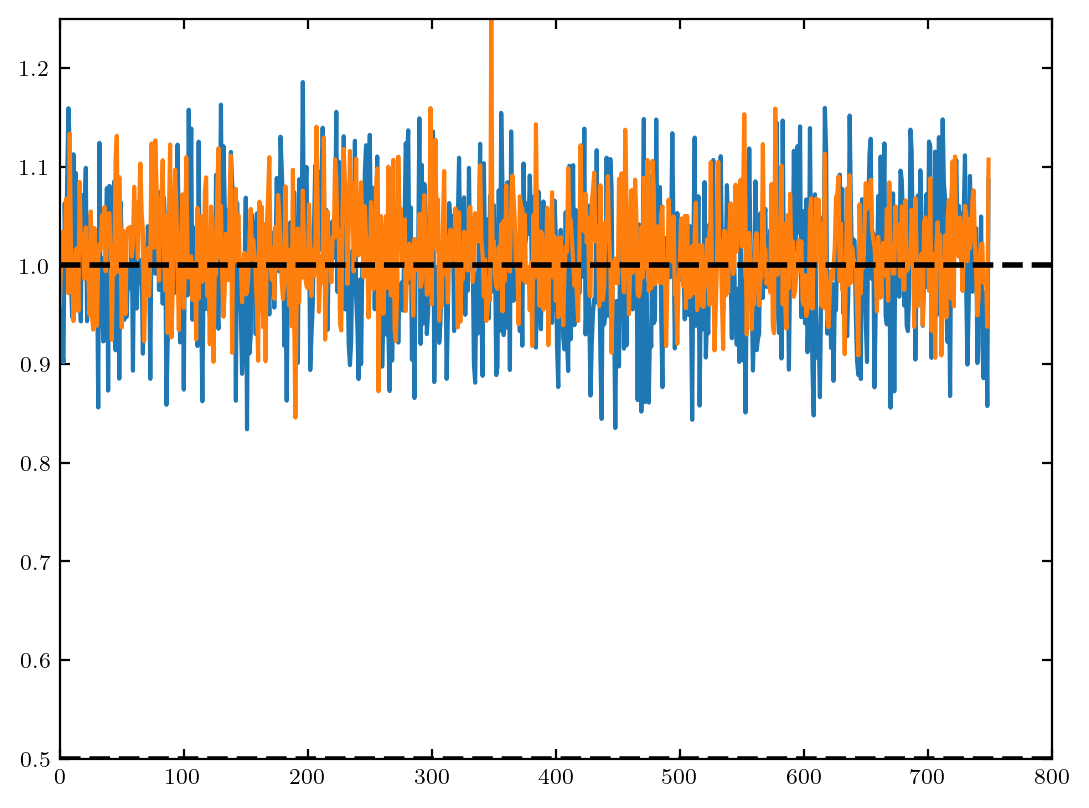

In [27]:
thin = int(emcee.autocorr.integrated_time(samples))+1
print('Taking every n = ' + str(thin) + ' samples based on ac length.')
print('Burning first n = ' + str(500) + ' samples.')

plt.plot(samples[500::thin,0]); # burned and thinned mean
plt.plot(samples[500::thin,1]**0.5); # burned and thinned sigma

# injected values
plt.hlines(1.0, 0.0, 800, color='k', lw=2, ls='dashed');
plt.hlines(0.5, 0.0, 800, color='k', lw=2, ls='dashed');

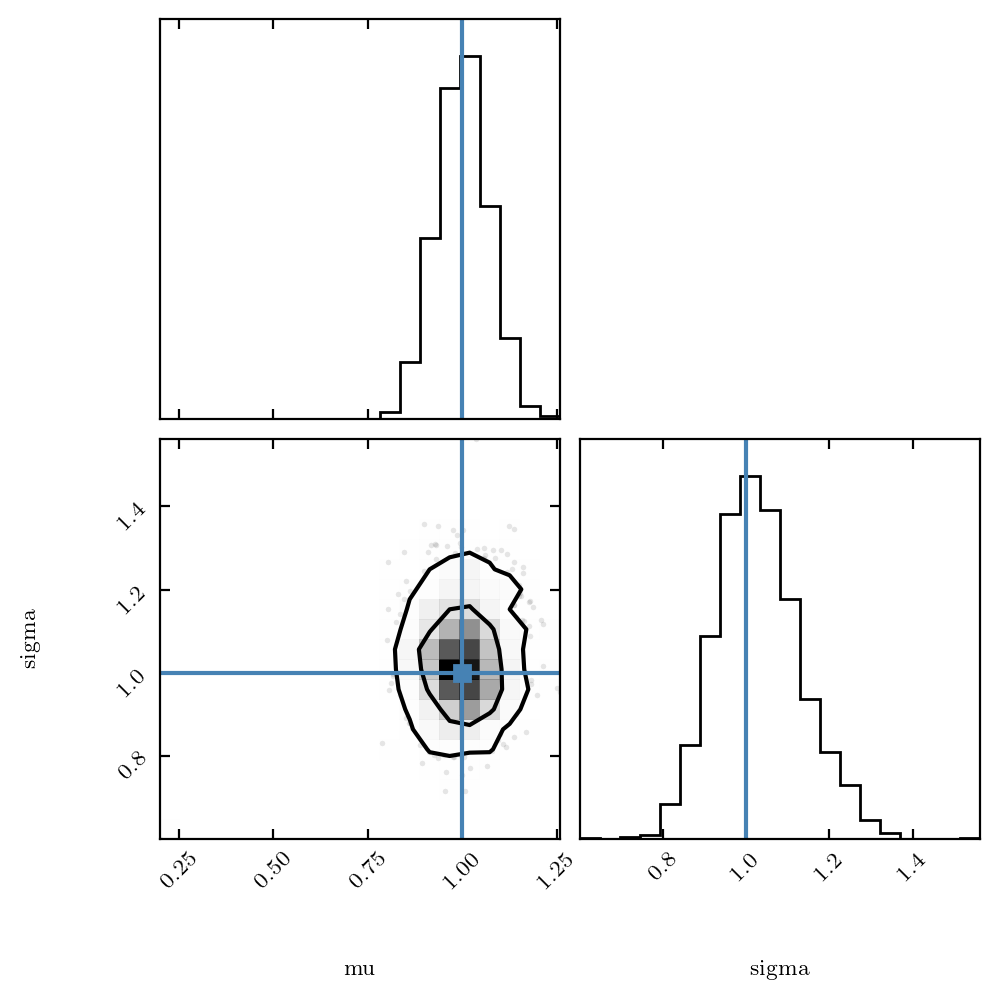

In [28]:
fig = corner.corner(
    samples, labels=labels, levels=[0.68,0.95],truths=[1,1]
);

Run the following code to time the Gibbs sampling of $2000$ posterior draws. No points are rejected. You'll see that this is about **two orders of magnitude faster than Metropolis-Hastings**, while also giving a greater number of sampled values.

In [29]:
%timeit -n1 run_gibbs()

50 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Gibbs sampling is awesome...provided that you can work out the analytic conditional posteriors as standard distribution forms.** 

But even if you can't, all is not lost. You can get inventive by embedding a short Metropolis-Hastings block within the Gibbs algorithm. For example, if there are parameters for which you can not directly draw from the conditional, then your Gibbs step for that parameter could be a short Metropolis-Hastings MCMC run. 

The goal is to run this sufficiently long enough that you have drawn a single quasi-independent random sample from the parameter posterior conditional distribution, with all other parameters fixed. You can then proceed through the remainder of your Gibbs steps as normal. 

## Time to get your hands dirty.  The transient Universe

Time-domain astronomy is one of the new frontiers. Example of transient phenomena include:

1. Tidal distruption events. [Stars shouldn't go near supermassive black holes, it's dangerous!]

Figure from Gezari (2021) ["Tidal Disruption Events", review](https://arxiv.org/abs/2104.14580)

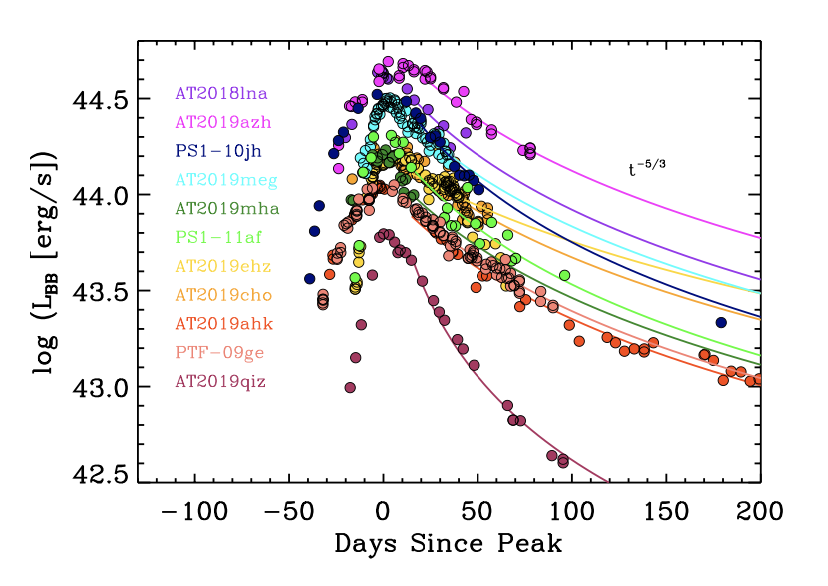

2. Sudden flares of active galactic nuclei

Figure from  Graham et al (2021) ["A Candidate Electromagnetic Counterpart to the Binary Black Hole Merger Gravitational Wave Event S190521ga"](https://arxiv.org/abs/2006.14122)

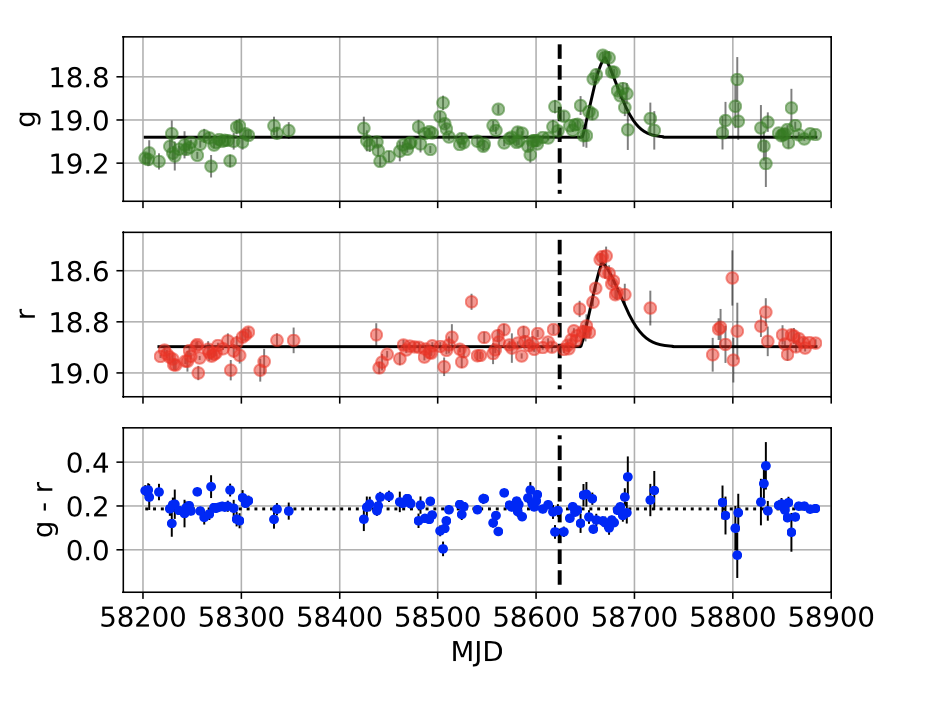

3. Supernovae.

Figure from  Jha et al (2019) ["Observational Properties of Thermonuclear Supernovae
"](https://arxiv.org/abs/1908.02303)

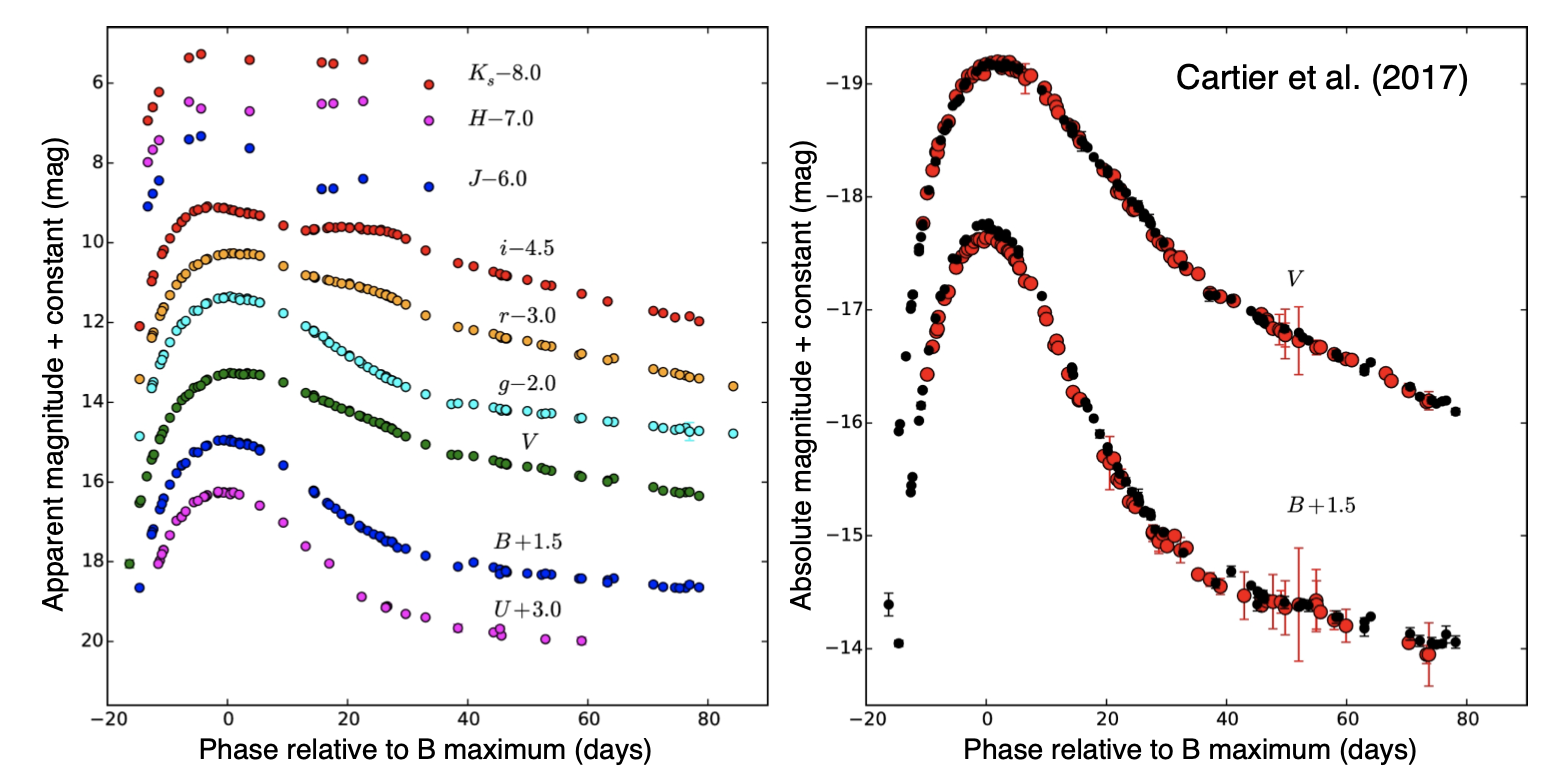


### Tasks

**Remember this is a real research example, not an exam! You're welcome (and encouraged actually!) to use all the tutorials/answers/hack you find online!**


1) Read in `solutions/transient.npy`. This is a (100 x 3) numpy array, containing some time-series measurements from a transient phenomenon. The first column is time (arbitrary units), the second column is the flux (arbitrary units), and the third column are homoescedastic measurement uncertainties on the flux. Plot this data with the uncertainties.

2) One possible model for this data is a sharp burst with an exponential tail rising above a nominal background level. This model can be described as:

$y = b$, for $t<t_0$

$y = b + A\exp[-\alpha(t-t_0)]$, for $t\geq t_0$

where $b$ is the background amplitude, $A$ is the burst amplitude, $t_0$ is the burst epoch, and $\alpha$ encodes how rapidly the burst dies off.

Code this burst model, and code a likelihood function for this data with the burst model. *Hint: This is similar in spirit to the likelihood when fitting polynomials to data, except now $x$ is time, and the polynomial model is now the burst model.* 

3) Using one of the MCMC sampler that we looked at in class (`emcee`, `pymc`), perform a Bayesian analysis that recovers an MCMC chain of posterior probability samples for the joint parameter space of $\{b,A,t_0,\alpha\}$. You must decide on how many samples are appropriate for running your MCMC. For your priors, make them $b\in \mathrm{Uniform}[0,50]$, $A\in \mathrm{Uniform}[0,50]$, $t_0\in \mathrm{Uniform}[0,100]$, and $\ln\alpha\in \mathrm{Uniform}[-5,5]$ (careful: uniform in $\ln\alpha$, not $\alpha$).

4) Perform an appropriate check to burn-in your chain, and thin the chain by selecting only points every auto-correlation length. If you are left with a small number of samples after thinning then you may need to run your MCMC for longer in (3).

5) Make a corner plot of the $4$-D parameter space, with labels, $[68,95]\%$ credible levels and quantiles, and titles.

6) Now choose $100$ samples randomly from your burned, thinned chain and plot the $100$ corresponding burst time-series on a figure along with the original data. You may want to choose a transparency for these $100$ burst curves that allows you to see everything nicely. These are showing the posterior spread of model solutions that are consistent with the data.

7) For each parameter, find the median and 90% credible region of the marginalized distribution and quote results as, for instance, $t_0=X^{+Y}_{-Z}$ 



[My solution](https://github.com/dgerosa/astrostatistics_bicocca_2024/blob/main/solutions/S10_transient1.ipynb) 

# Bayesian Statistical Inference: V

*Davide Gerosa (Milano-Bicocca)* 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 5.
- [Sampler, Samplers, Everywhere...](http://mattpitkin.github.io/samplers-demo/pages/samplers-samplers-everywhere/) by Matt Pitkin.

This course is based on previous work by many people. See [here]((https://github.com/dgerosa/astrostatistics_bicocca_2024/blob/main/README.md) for credits.

Make sure the python package `dynesty` is installed.

##  Practical Evidence Evaluation & Model Selection <a class="anchor" id="two"></a>

We've discussed Bayesian parameter estimation algorithms in detail. Crucially, all you get out of an MCMC are **samples** from the posteriors. You do not get the evidence (denominator in Bayes theorem).

But the evidence is crucial in model comparison... How about it? We already have the AIC and BIC as proxies. Grid-based methods for integrating the likelihood $\times$ prior are far too crude. 

There are some further numerical techniques that we'll briefly discuss, before looking at examples of **Nested Sampling** algorithms to compute the Bayesian evidence. 

### Savage-Dickey Density Ratio

This is great for when we want to compare models that have nested parameters, e.g. (1) a model with just noise, and (2) a model with a signal and noise. 

We need to be able to identify a parameter in the signal model that acts as an amplitude, $A$, that can effectively switch the signal off when it is zero. 

Thus $p_1(d|n) = p_2(d|A=0,n)$.


An example from my research field, gravitational-astronomy, is testing General Relativity. Suppose you want to test a theory which is more generic than GR (say the graviton has a non-zero mass, which implies a dispersion relation for the emitted waves), in that case GR is a special case ($m=0$) of the more generic theory.


With MCMC sampling we can map out the full parameter posterior distribution of model (2). We need to make sure we get good mixing and exploration of the parameter $A$ so that we can reconstruct its posterior density at $A=0$. 

The Bayes factor of Model $2$ (signal and noise) versus Model $1$ (noise alone) can be computed using the **[Savage-Dickey Density Ratio](https://www.jstor.org/stable/2958475?casa_token=Dc8wjaKRj5UAAAAA%3A4IhKgqNXc4jpan6hRxW7tBpXTI4i2236BulPTRxj4FcivD988vqJw-N75Dtw7z4Lh3YtPsDIceS8NDtIXAIRIO1T227h9VYZ2prQpwb46WLBB0GGz8w&seq=1#metadata_info_tab_contents)** approximation,

$$ \mathcal{B} = \frac{\mathcal{Z}_2}{\mathcal{Z}_1} = \frac{p(A=0)}{p(A=0|d,n)}$$

which is the prior density at $A=0$ divided by the conditional posterior density at $A=0$. We can easily compute the latter by making a histogram of posterior samples in $A$ and reading off the normalized pdf at $A=0$.

### A proof of the Savage-Dickey density ratio

The best derivation I could find comes from [The Book of Statistical Proofs](https://statproofbook.github.io/P/bf-sddr.html), which is an amazing resource BTW.

Our two hypoteses are:

- $M_1$. The narrow model, which is equivalent to $M_2$ with $A=0$. 
- $M_2$. The broad model, described by some parameters $\Theta$ and an additional parameter $A$.

Formmaly one has

$M_1: M_2 \cup \{ A=0 \}$

The Bayes factor we want is

$$B = \frac{p(d | M_2)}{p(d | M_1)} = \frac{p(d | M_2)}{p(d | A=0, M_2)}$$

Now let's remember Bayes rule (if I want to flip $d$ and $A=0$ then...)

$$ p(d | A=0, M_2) = p(A=0 | d, M_2) \frac{p(d | M_2)}{p(A=0 | M_2)} $$

And so we have

$$B = \frac{p(A=0 | M_2)}{p(A=0 | d, M_2)} $$

It's now easy to recognize the terms: the numerator is the marginalized prior under the broad model evaluated at the constraint given by the narrow model, and the denominator is the marginalized posterior under the broad model evaluated at the constraint given by the narrow model. 

The word *marginalized* is important here. These models can (and in generally will) depend on other common parameters, but all it matters are the marginalized distributions.

Also note how the final result only depends on the broad model $M_2$. One does not need to run twice! A single parameter-estimation run is enough! But then I need an additional density estimator. 

Of course, this only works if the models are nested one inside the other.

**Examples of how I used this in research:** [De Renzis et al. 2023](https://arxiv.org/abs/2304.13063). It's a paper about (guess what) black holes, but the appendix has a nice stats proof that generalizes the SD ratio to functions of parameters.


### Product-space Sampling (or "hypermodels")

The name sounds fancy, but is super easy. In this type of model comparison, we never explicitly try to compute the Bayesian evidence. 

- We run a big MCMC chain that includes all parameters of all models, in addition to a model indexing parameter, $n$. 
- We define distinct ranges for this parameter, such that in certain sampling ranges it will trigger one of the model likelihoods to be used, e.g. if $-0.5<n<0.5$ use the likelihood for model $1$. 
- After sampling sufficiently long, the MCMC chain will spend different amounts of time in differnt regions of $n$ in proportion to the Bayesian odds ratio. 
- Hence, the ratio of samples in model sub-ranges of $n$ gives the Bayesian odds ratio. Simple!
- This is heavily used in gravitational-wave searches for Pulsar Timing arrays, see [https://arxiv.org/abs/1801.02617](https://arxiv.org/abs/1801.02617), [https://arxiv.org/abs/2009.04496](https://arxiv.org/abs/2009.04496), and [https://arxiv.org/abs/2006.04810](https://arxiv.org/abs/2006.04810). A recent LIGO application: https://arxiv.org/abs/2310.03555
- Refs [here](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1995.tb02042.x) and [here](https://amstat.tandfonline.com/doi/abs/10.1198/10618600152627924?casa_token=Kgpt2ZvdMrcAAAAA%3Al5JB7EitQ7MjPmxBObu2XJXocZCE1tI2-ZAceCwBjJOi2TRajF7SaxFcQjo1Nn5AF9q6vKhkxpBd&#.YEZH4F1KiLo).

### Thermodynamic Integration

This technique is pretty fancy, and is derived from analogies with thermodynamics. It is used for exact calculation of the Bayesian evidence. 

- Many MCMC chains are launched in parallel. However, their likelihoods differ slightly in their "temperature", $T$. We actually use the inverse temperature $\beta=1/T$ when writing the math. The temperature of a chain is used to modify the likelihood as follows, where 

$$ p(d|\theta)_\beta = p(d|\theta)^\beta = p(d|\theta)^{1/T}.$$

- Thus only the $T=0$ chain corresponds to the actual model likelhiood. 
- But the other temperature chains have the effect of taking higher and higher roots of the likelihood, smoothing it out and making it more similar to the original prior. 
- These high temperature chains explore the parameter volume well, communicate back to the $T=0$ chain, and improve MCMC mixing. 
- Crucially, we can also use them in evidence computation:

$$ \ln\mathcal{Z} = \int_0^1 \langle \ln p(d|\theta)\rangle_\beta\, d\beta, $$

where we take the mean log-likelihood of each $\beta$ chain, then sum these over all temperatures to get the log-evidence. Refs [here](https://www.jstor.org/stable/2676756?casa_token=nGU-oa0w6lQAAAAA%3A8UNqj0_rBP7aZ4vocZ_NzbxKhre4WvzhbNOs_TTI_FfexQmppcxQSlxaO5PCHPZNAw9fZUmy4rPeXLe_CVJgAD2AYR6qS8D6xQDicpc1R45ZhjEtOV4&seq=1#metadata_info_tab_contents), and [here](https://link.springer.com/content/pdf/10.1007/BF01406511.pdf).




### Nested Sampling

Nested sampling is a very different MCMC method from Metropolis-Hastings or even Gibbs approaches. It's very recent and nonetheless very popular. The [first paper is from 2004 by Skilling](https://ui.adsabs.harvard.edu/abs/2004AIPC..735..395S).


- One starts with many points spread throughout the prior volume.
- The points are ranked in terms of their likelihood.
- The lowest ranked point is removed, and a higher likelihood point is randomly added.
- This is repeated, until the cluster of points climbs up the likelihood surface, accumulating Bayesian evidence information along the way. 

The prior volume is defined as $dX = p(\theta)d^n\theta$ such that $X(\lambda) = \int_{p(d|\theta)>\lambda}p(\theta)d^n\theta$, where the integral is over the model parameter region that exceeds the iso-likelihood contour $p(d|\theta)=L(\theta)=\lambda$.

This transforms the evidence integral into 

$$\mathcal{Z} = \int p(d|\theta)p(\theta)d^n\theta = \int_0^1 L(X)dX.$$


Here is how the algorithm works:


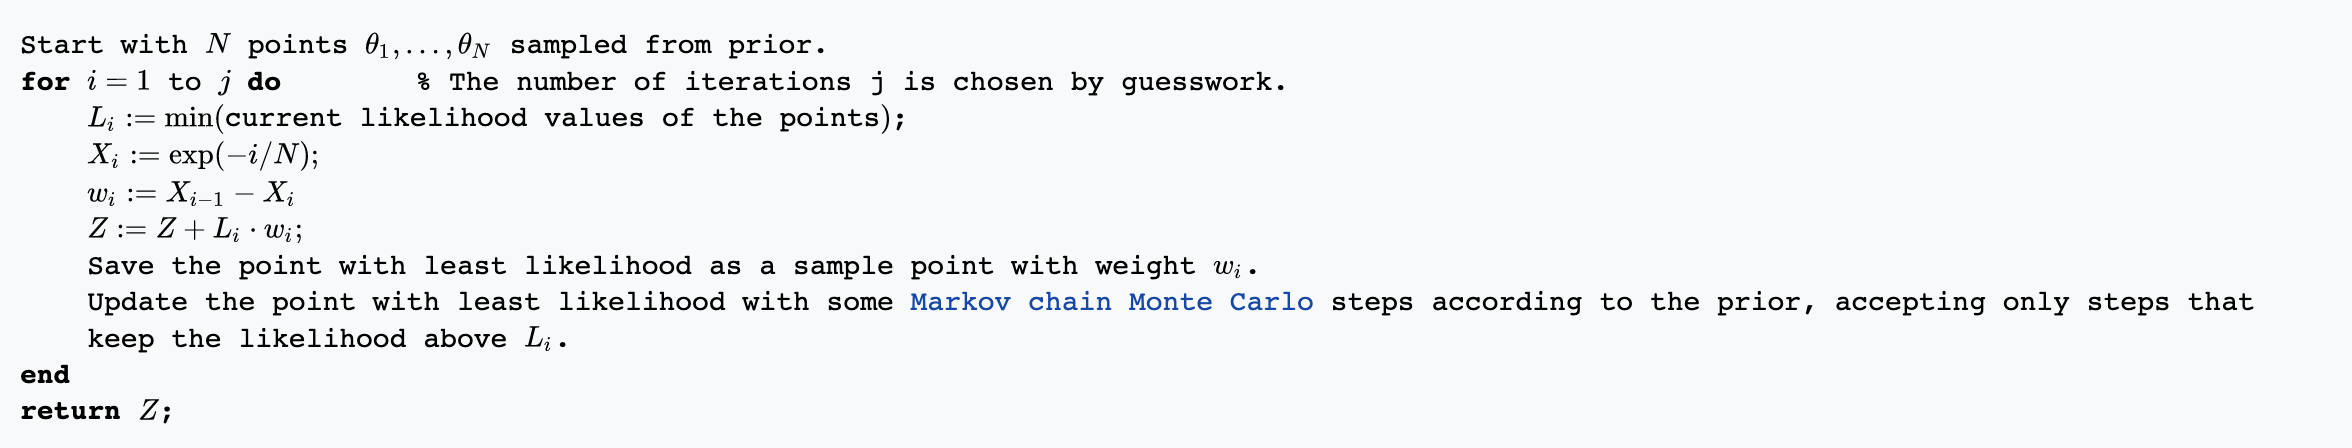

([credits](https://en.wikipedia.org/wiki/Nested_sampling_algorithm))


The form of the $X_{i}$ is not unique, but it needs to be an estimator of the amount of prior mass in the parameter space of all points with likelihood greater than $L_i$. See [Skilling 2006](https://projecteuclid.org/journals/bayesian-analysis/volume-1/issue-4/Nested-sampling-for-general-Bayesian-computation/10.1214/06-BA127.full) for more.

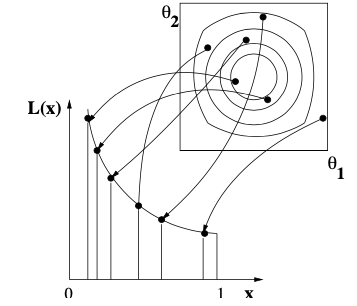


This paper is a nice example from the field of cosmology (https://arxiv.org/abs/astro-ph/0508461), this for solar oscillations (https://arxiv.org/abs/1408.2515), this fixes some issues (https://arxiv.org/pdf/2102.12478.pdf).




There are several popular packages that perform nested sampling, and not only do they all compute the Bayesian evidence but they also produce posterior samples as a by-product. 


By far the most historically well known is [`MultiNest`](https://github.com/rjw57/MultiNest) and its Python wrapper [`PyMultiNest`](https://johannesbuchner.github.io/PyMultiNest/). It used to be (and may still be) a bit of a pain to install though (there is C and Fortran involved). Refs [here](https://ui.adsabs.harvard.edu/abs/2004AIPC..735..395S/abstract), and [here](https://academic.oup.com/mnras/article/398/4/1601/981502?login=true).


So while this is the big one, there seem to be other more pythonic implementations now on the market. Let's look at one in particular, which is used in my research field.

---

### Dynesty <a class="anchor" id="twoa"></a>

It's as recent as 2019. https://arxiv.org/abs/1904.02180

![](https://github.com/joshspeagle/dynesty/blob/master/docs/images/title.gif?raw=true)

This example comes from the [dynesty](https://arxiv.org/abs/1904.02180) ["crash course"](https://dynesty.readthedocs.io/en/latest/crashcourse.html). We define our likelihood to be a $3$D correlated multivariate Gaussian distribution, and our prior to be uniform in each dimension from $-10$ to $10$.

In [3]:
import dynesty
import numpy as np

# Define the dimensionality of our problem.
ndim = 3

# Define our 3-D correlated multivariate normal likelihood.
C = np.identity(ndim)  # set covariance to identity matrix
C[C==0] = 0.95  # set off-diagonal terms
Cinv = np.linalg.inv(C)  # define the inverse (i.e. the precision matrix)
lnorm = -0.5 * (np.log(2 * np.pi) * ndim +
                np.log(np.linalg.det(C)))  # ln(normalization)


In [4]:
C

array([[1.  , 0.95, 0.95],
       [0.95, 1.  , 0.95],
       [0.95, 0.95, 1.  ]])

In [5]:
def loglike(x):
    """The log-likelihood function."""

    return -0.5 * np.dot(x, np.dot(Cinv, x)) + lnorm # Notice I need the correct normalization now! 
 
# Define our uniform prior.
def ptform(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""

    return 10. * (2. * u - 1.)

Run the sampler. 

In [8]:
# "Static" nested sampling.
sampler = dynesty.NestedSampler(loglike, ptform, ndim)
sampler.run_nested()
sresults = sampler.results

4819it [00:00, 5086.91it/s, +500 | bound: 8 | nc: 1 | ncall: 24435 | eff(%): 22.223 | loglstar:   -inf < -0.305 <    inf | logz: -9.153 +/-  0.129 | dlogz:  0.001 >  0.509]


You've just estimated the Bayesian evidence and posterior. Plot the results. These figures will have an $x$-axis that is $-\ln X$ which is a bit confusing to think about to begin with, but remember that we are moving up the likelihood contours when going from left to right on the graphs.

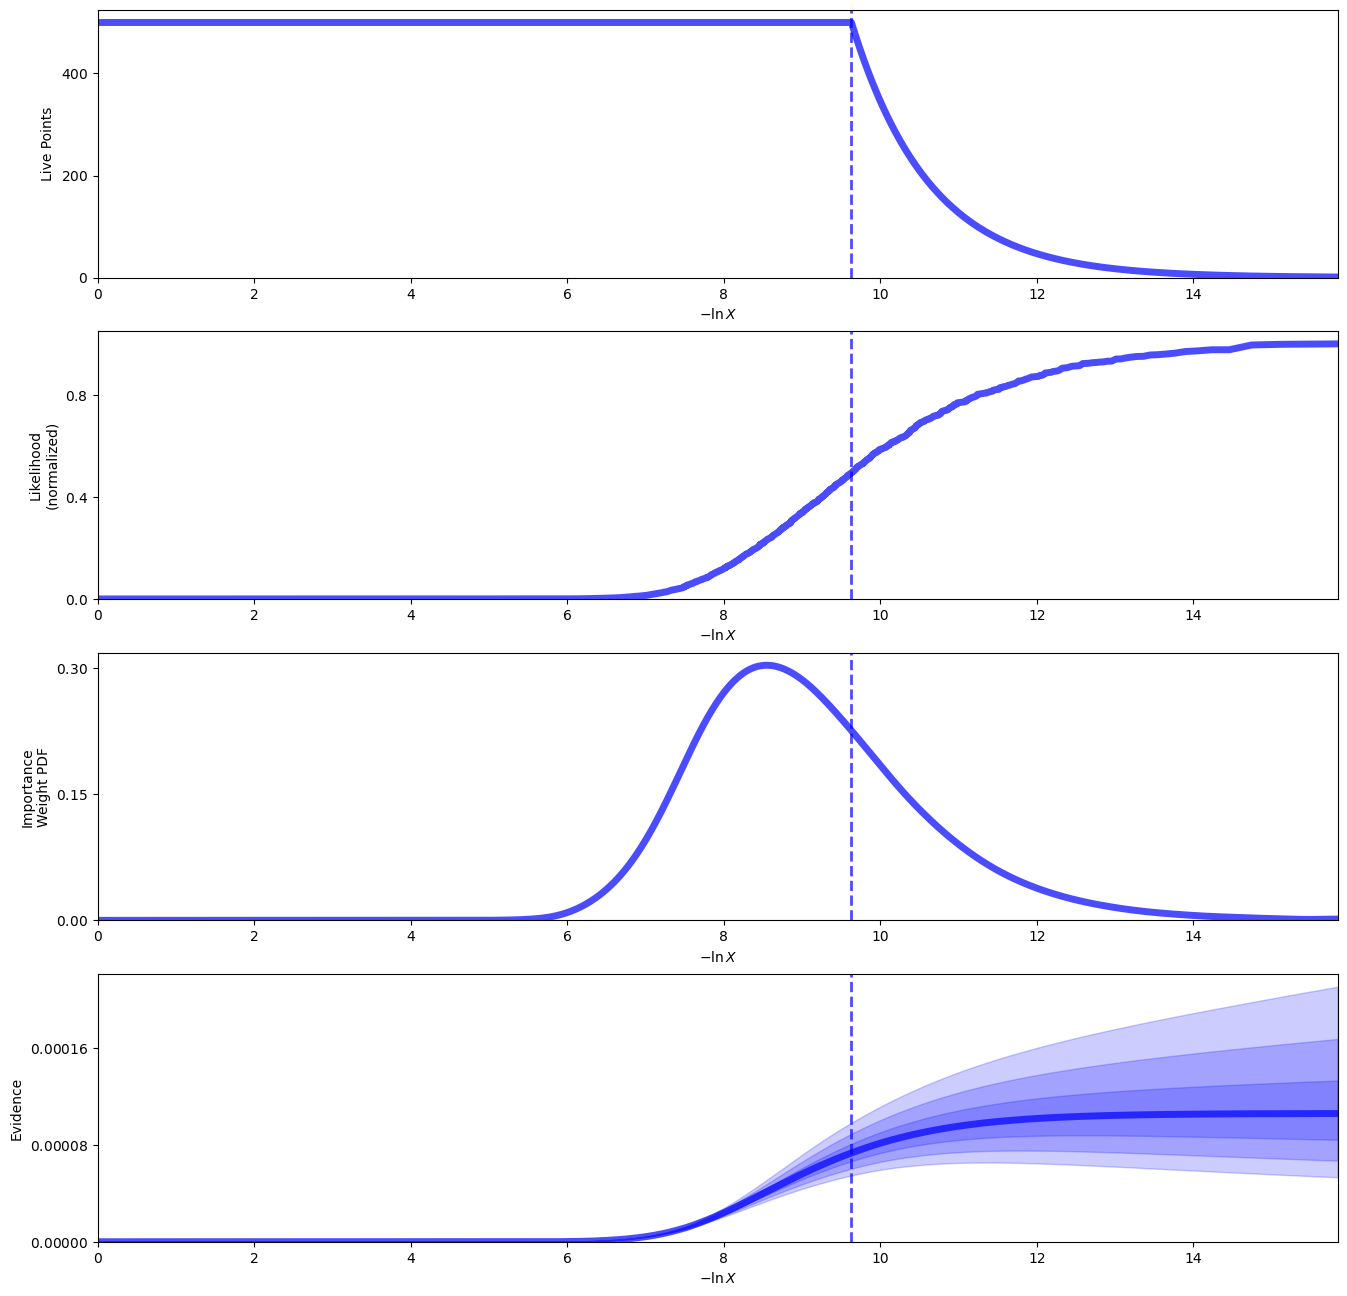

In [9]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(sresults)

How to interpret this... (Figure from https://arxiv.org/abs/1904.02180)

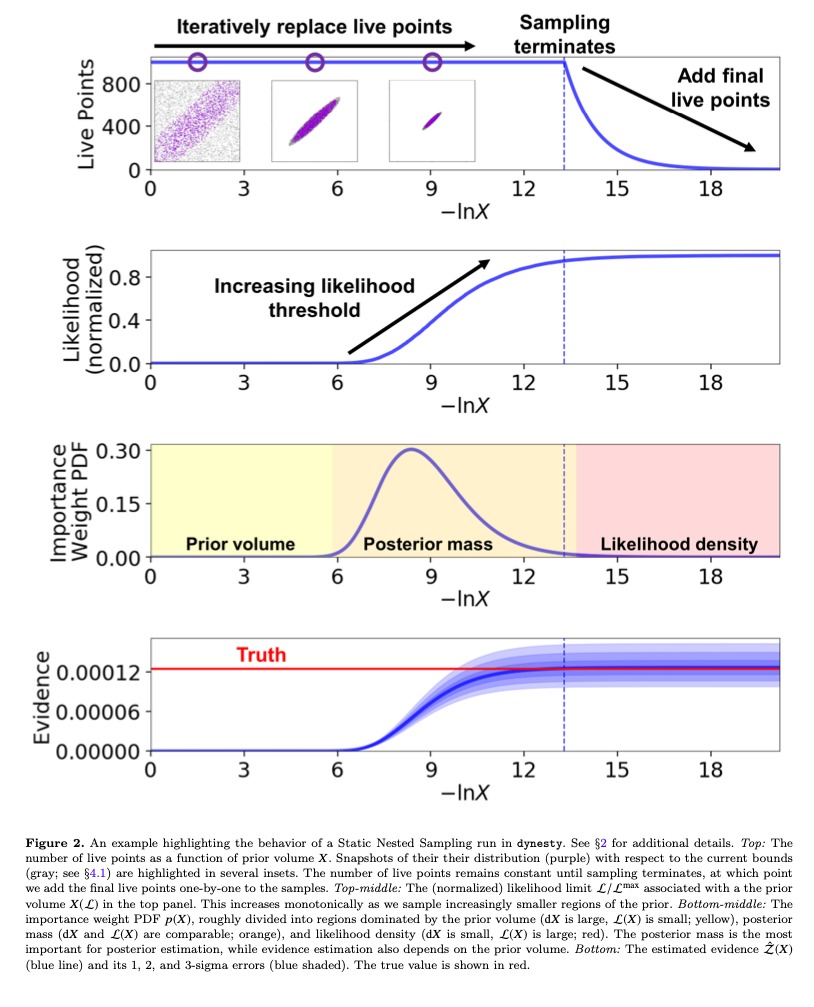

Plot parameter traces and 1-D marginalized posteriors. On the left panels, you'll see that the live points started out scattereed across the prior volume, then move inwards as the sampler climbs the likelihood.

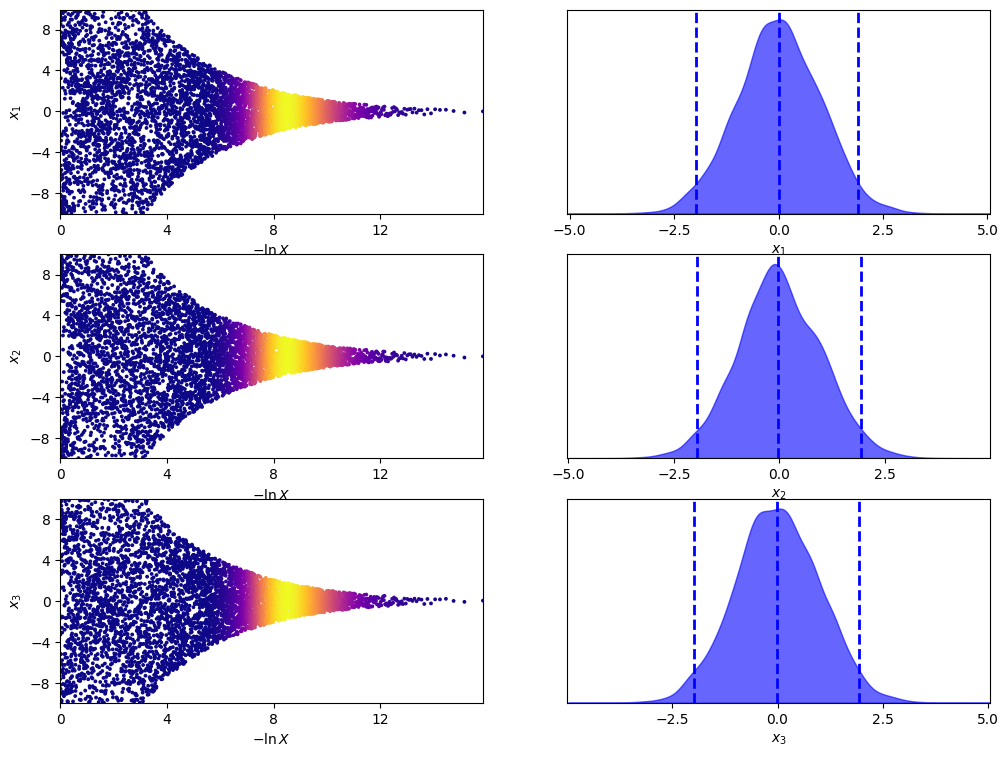

In [10]:
tfig, taxes = dyplot.traceplot(sresults)

Plot the 2-D marginalized posteriors using `dynesty` routines. (But you could also use `corner` if you wish).

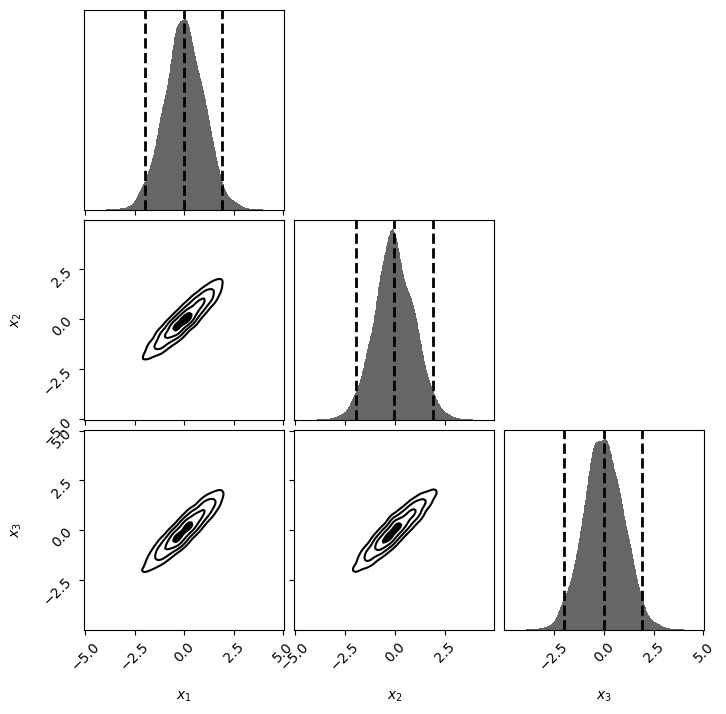

In [11]:
cfig, caxes = dyplot.cornerplot(sresults)

`dynesty` also lets you access many other utilities and analysis outputs. See below. 

In [12]:
from dynesty import utils as dyfunc


# Extract sampling results.
samples = sresults.samples  # samples
weights = np.exp(sresults.logwt - sresults.logz[-1])  # normalized weights


evidence = sresults.logz[-1] #evidence
print("Bayesian evidence", np.exp(evidence))

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.16, 0.84], weights=weights)
             for samps in samples.T]
print('68% parameter credible regions are:\n ' + str(quantiles) + '\n')

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)
print('Mean and covariance of parameters are: ' + str(mean) + '\n' + str(cov))

# Generate a new set of results with statistical+sampling uncertainties.
#results_sim = dyfunc.simulate_run(sresults)

Bayesian evidence 0.0001058952606783352
68% parameter credible regions are:
 [[-0.9997631506514346, 1.0124341626472761], [-0.9462979104733477, 1.0013087332525576], [-0.9910838173199352, 0.9908213805437411]]

Mean and covariance of parameters are: [ 0.00246399 -0.00487408  0.00024677]
[[0.9876692  0.93344734 0.93912601]
 [0.93344734 0.97767911 0.93461785]
 [0.93912601 0.93461785 0.99137828]]


**Very important** Samples that come out of a nested sampling runs are **weighted**. The results of nested sampling and the samples and their weights *together*. Do not use samples by themselves, it doesn't make sense.

*dynesty* can produce *equally weighted samples*. This is useful if you then want to used them in another package (for instance `corner`) that cannot deal with weights.

In [13]:
# Resample weighted samples.
samples_equal = dyfunc.resample_equal(samples, weights)


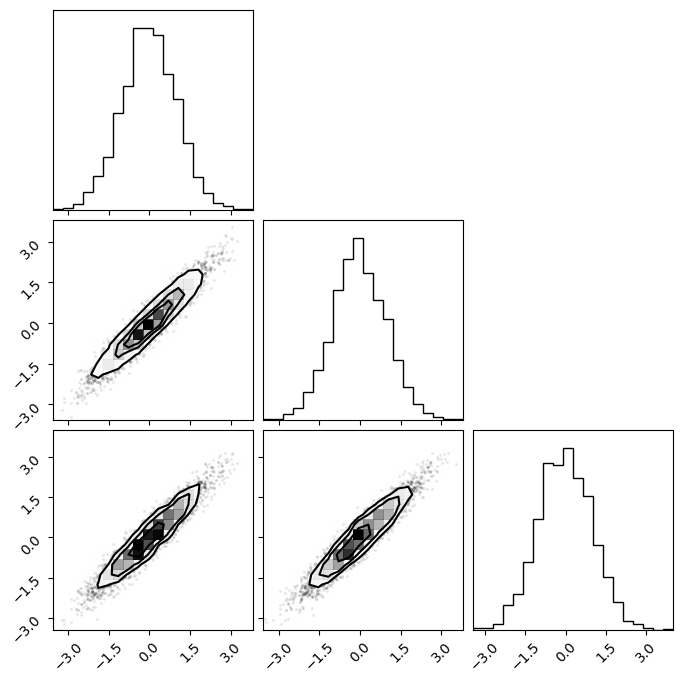

In [14]:
import corner
corner.corner(samples_equal);

The code even helpfully tells you what work you should be citing based on the run configurations that you used.

In [15]:
print(sampler.citations)

Code and Methods:
Speagle (2020): ui.adsabs.harvard.edu/abs/2020MNRAS.493.3132S
Koposov et al. (2023): doi.org/10.5281/zenodo.3348367

Nested Sampling:
Skilling (2004): ui.adsabs.harvard.edu/abs/2004AIPC..735..395S
Skilling (2006): projecteuclid.org/euclid.ba/1340370944


Bounding Method:
Feroz, Hobson & Bridges (2009): ui.adsabs.harvard.edu/abs/2009MNRAS.398.1601F

Sampling Method:




There is a lot to explore in the `dynesty` package. It is not a panacea, and there are some things you may have to tune, e.g. the **number of initialized live points**, and **the evidence tolerance**. Dig into these caveats in your own time for your own research problems.

Additionally, it implements **dynamic nested sampling** that dynamically allocates live points to explore higher posterior regions better at the expense of increasing the relative evidence uncertainty. See https://dynesty.readthedocs.io/en/latest/dynamic.html. 

(full discosure: this is an advanced tecnique I'm not sure I fully understand...)

In [16]:
## "Dynamic" nested sampling.

#dsampler = dynesty.DynamicNestedSampler(loglike, ptform, ndim)
#dsampler.run_nested()
#dresults = dsampler.results

### Some harder examples... 

Have a look at some of these runs!

https://dynesty.readthedocs.io/en/latest/examples.html

###  UltraNest <a class="anchor" id="twob"></a>

*Refs: MLFriends (Buchner, 2014; 2019) using UltraNest https://johannesbuchner.github.io/UltraNest/*

If you want to explore another sampler for your research, I highly reccommend looking into UltraNest. 

This is a nice example from the [UltraNest's documentation](https://johannesbuchner.github.io/UltraNest/using-ultranest.html), which involves fitting a **spectral line feature**. There are many other tutorials on the documentation to dig into in your own time.




### Back to the nice animation...

Remember last time we looked at [this nice animation of MCMC sampling](https://chi-feng.github.io/mcmc-demo/app.html)?

[This is the equivalent for nested sampling](https://johannesbuchner.github.io/UltraNest/method.html#visualisation), from the UltraNest documentation 


### Take home message


There is a ton more to explore in nested sampling, evidence evaluation, model comparison, and parameter estimation.

Alas, we must move on. However, these hands-on tutorials using real packages gives you an idea of the rich array of resources you can use for your own research.

Make sure you know what is going on under the hood, but remember we're (astro)physicists after all.

### Time to get your hands dirty.  The transient Universe


Let's go back to our previous example on the astrophysical transient.


8) Fit the same model from before with the same priors,  but this time use nested sampling.

$y = b$, for $t<t_0$

$y = b + A\exp[-\alpha(t-t_0)]$, for $t\geq t_0$

Be careful with how you transform your parameter space into a unit hypercube for the nested sampling priors (I used `ppf` from `scipy.stats.uniform`, but there are other ways to do it)

An appropriate check on whether you have done things correctly is that the posterior samples you get from the burst analysis here should give an equivalent corner plot to the MCMC you did earlier.

7) Another possible model that may explain the data is a Gaussian profile described by:

$y = b + A\exp[-(t-t_0)^2 / 2\sigma_W^2]$

Fit this model usign nested sampling and reasonable priors (this time is up to you to decide...)

9) Unlike MCMCs, nested sampling provides the Bayesian evidence. Compute the Bayesian evidence for this Gaussian model, and for the original burst model. Which model is the favored description of the data? Express this in terms of the Jeffrey's scale.

[My solution](https://github.com/dgerosa/astrostatistics_bicocca_2024/blob/main/solutions/S11_transient2.ipynb) 

# Bayesian Statistical Inference: II

*Davide Gerosa (Milano-Bicocca)* 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 5.
- [Jake VanderPlas's blog "Frequentism and Bayesianism: A Practical Introduction"](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)
- [Jake VanderPlas: "Frequentism and Bayesianism: A Python-driven Primer"](https://arxiv.org/abs/1411.5018)
- [Hogg, Bovy and Lang: "Data analysis recipes: Fitting a model to data"](https://arxiv.org/abs/1008.4686)


##### For those who want to dive deep:

- [Jake VanderPlas's workshop "Bayesian Astronomy"](https://github.com/jakevdp/BayesianAstronomy)
- [D. Sivia and J. Skilling: "Data Analysis: A Bayesian Tutorial"](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320)
- [E.T. Jaynes: "Probability Theory: The Logic of Science"](http://bayes.wustl.edu/etj/prob/book.pdf)
- [E.T. Jaynes: "Confidence Intervals vs. Bayesian intervals"](http://bayes.wustl.edu/etj/articles/confidence.pdf)
- [This great explanation of confidence levels versus credible regions on Stackexchange](https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval/2287#2287)



This course is based on previous work by many people. See [here]((https://github.com/dgerosa/astrostatistics_bicocca_2024/blob/main/README.md) for credits.


##### More:

- [MCMC Sampling](https://twiecki.io/blog/2015/11/10/mcmc-sampling) by Thomas Wiecki.
- [The Metropolis-Hastings algorithm](https://arxiv.org/abs/1504.01896) by Christian P. Robert.
- [Sampler, Samplers, Everywhere...](http://mattpitkin.github.io/samplers-demo/pages/samplers-samplers-everywhere/) by Matt Pitkin.
- [MCMC Interactive Demo](https://chi-feng.github.io/mcmc-demo/app.html) by Chi Feng.